# Google Drive Link
https://drive.google.com/drive/folders/13CGPRNjchx6LN9RUiuXiOq7NBPjDNb9s?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

In [2]:
# Load the datasets
housing_df = pd.read_csv('LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')
health_df = pd.read_csv('Restaurant_and_Market_Health_Inspections.csv')

# EDA for Health DF

In [3]:
# Find number of unique values in each columns of health dataset
health_df.nunique() # Refernce (1)

serial_number          67573
activity_date            860
facility_name          12071
score                     36
grade                      4
service_code               2
service_description        2
employee_id              143
facility_address       11782
facility_city              1
facility_id            13545
facility_state             1
facility_zip            1053
owner_id               11786
owner_name             11566
pe_description            30
program_element_pe        18
program_name           12928
program_status             2
record_id              14558
dtype: int64

In [4]:
# NaN values in health dataset
health_df.isnull().sum()

serial_number           0
activity_date           0
facility_name           0
score                   0
grade                   3
service_code            0
service_description     0
employee_id             0
facility_address        0
facility_city           0
facility_id             0
facility_state          0
facility_zip            0
owner_id                0
owner_name              0
pe_description          0
program_element_pe      0
program_name           29
program_status          0
record_id               0
dtype: int64

In [5]:
# Display rows with NaN values in health dataset
health_df[health_df.isnull().any(axis=1)]

serial_number           activity_date                 facility_name  \
28707     DAUJTVCBM  01/12/2016 12:00:00 AM                YAKINIKU GRILL   
29010     DAXKKNV5S  01/07/2016 12:00:00 AM                JUICE CRAFTERS   
29382     DAC620KZG  12/30/2015 12:00:00 AM                       PHORAGE   
29383     DAD00OX8E  12/30/2015 12:00:00 AM                 C JANG MARKET   
29398     DAVHQETCM  12/30/2015 12:00:00 AM              7-ELEVEN #39646A   
29425     DAQYKTQF7  12/29/2015 12:00:00 AM                     THE JUICE   
30343     DAPDOPWJN  12/10/2015 12:00:00 AM       TAQUERIA LOS 3 CARNALES   
30400     DAT1RRMV7  12/09/2015 12:00:00 AM        SPROUTS FARMERS MARKET   
30634     DATYBZXLM  12/04/2015 12:00:00 AM                           538   
31270     DAPGIUWDE  11/23/2015 12:00:00 AM                       33 TAPS   
31503     DAPIOSLKL  11/18/2015 12:00:00 AM              GOODGIRL THE DOG   
31672     DAJIUOWTF  11/16/2015 12:00:00 AM       CARNICERIA LA OAXAQUENA   
31683     DAFSIK75U  11/16/2015 12:00:00 AM          JAMMIN JIMMY'S PIZZA   
31983     DAQHDLGCR  11/09/2015 12:00:00 AM                    GRAND STAR   
32167     DAQMAJ5PJ  11/04/2015 12:00:00 AM       CARNICERIA LA OAXAQUENA   
32351     DADOJ8XFD  11/02/2015 12:00:00 AM             KONY PIZZERIA PUB   
33442     DA0APPI0G  10/14/2015 12:00:00 AM   PENALOZA MEXICAN RESTAURANT   
33809     DAN7EMGL0  10/06/2015 12:00:00 AM                LE GARACE CAFE   
34260     DAF9EDFXF  09/28/2015 12:00:00 AM                YAKINIKU GRILL   
34360     DAIEN5EW6  09/25/2015 12:00:00 AM               LOS GUERITOS #2   
34535     DAT3DRGLC  09/23/2015 12:00:00 AM       TAQUERIA LOS 3 CARNALES   
35110     DABSCQM5B  09/15/2015 12:00:00 AM                       PHORAGE   
35606     DA9JRXC90  09/03/2015 12:00:00 AM                 PINCHES TACOS   
36128     DAQ6JBTVF  08/26/2015 12:00:00 AM                 EXPRESS LOTTO   
37021     DAEJJCFEH  08/11/2015 12:00:00 AM          LEMONADE ON SAWTELLE   
37801     DA1ZNDE9E  07/24/2015 12:00:00 AM        SPROUTS FARMERS MARKET   
37910     DAFWNQUB2  07/22/2015 12:00:00 AM                    DONUT KING   
39661     DAHIDHS9E  10/22/2015 12:00:00 AM         THE LEXINGTON THEATER   
40976     DAY65WFDB  10/02/2015 12:00:00 AM      CRIMINAL COURTS BUILDING   
60044     DABUOL2HM  05/30/2018 12:00:00 AM  TAQUERIA RESTAURANT LA NARAN   
62923     DAISRUL3C  05/16/2018 12:00:00 AM      EL HUARACHITO RESTAURANT   
64627     DAP9BDGKD  05/02/2018 12:00:00 AM             HAPPY LUNCH TO GO   

       score grade  service_code               service_description  \
28707     94     A             1                ROUTINE INSPECTION   
29010     95     A             1                ROUTINE INSPECTION   
29382     93     A             1                ROUTINE INSPECTION   
29383     96     A             1                ROUTINE INSPECTION   
29398     96     A             1                ROUTINE INSPECTION   
29425     94     A             1                ROUTINE INSPECTION   
30343     90     A             1                ROUTINE INSPECTION   
30400     94     A             1                ROUTINE INSPECTION   
30634    100     A             1                ROUTINE INSPECTION   
31270     90     A             1                ROUTINE INSPECTION   
31503     92     A             1                ROUTINE INSPECTION   
31672     90     A           401  OWNER INITIATED ROUTINE INSPECT.   
31683     92     A             1                ROUTINE INSPECTION   
31983     90     A             1                ROUTINE INSPECTION   
32167     76     C             1                ROUTINE INSPECTION   
32351     90     A             1                ROUTINE INSPECTION   
33442     91     A             1                ROUTINE INSPECTION   
33809     91     A             1                ROUTINE INSPECTION   
34260     93     A             1                ROUTINE INSPECTION   
34360     85     B             1                ROUTINE INSPECTI

In [6]:
health_new_df = health_df # Creating a copy of the health_df to be used in the analysis

In [7]:
# Check datatype of the columns
health_new_df.dtypes

serial_number          object
activity_date          object
facility_name          object
score                   int64
grade                  object
service_code            int64
service_description    object
employee_id            object
facility_address       object
facility_city          object
facility_id            object
facility_state         object
facility_zip           object
owner_id               object
owner_name             object
pe_description         object
program_element_pe      int64
program_name           object
program_status         object
record_id              object
dtype: object

In [8]:
# Remove prefix EE from employee_id column, FA from facility_id column, OW from owner_id column, PR from record_id column after converting them to string and then finally convert them to integer
health_new_df['employee_id'] = health_new_df['employee_id'].str.replace('EE', '').astype('int') # Reference (2)
health_new_df['facility_id'] = health_new_df['facility_id'].str.replace('FA', '').astype('int')
health_new_df['owner_id'] = health_new_df['owner_id'].str.replace('OW', '').astype('int')
health_new_df['record_id'] = health_new_df['record_id'].str.replace('PR', '').astype('int')
health_new_df

serial_number           activity_date          facility_name  score  \
0         DAJ00E07B  12/29/2017 12:00:00 AM    HABITAT COFFEE SHOP     95   
1         DAQOKRFZB  12/29/2017 12:00:00 AM               REILLY'S     92   
2         DASJI4LUR  12/29/2017 12:00:00 AM         STREET CHURROS     93   
3         DA40LU5AT  12/29/2017 12:00:00 AM      TRINITI ECHO PARK     94   
4         DAXV2RMYC  12/29/2017 12:00:00 AM                 POLLEN     94   
...             ...                     ...                    ...    ...   
67568     DAZZ4BFUD  06/15/2018 12:00:00 AM           RAMEN MARUYA     94   
67569     DAZZ4TRBY  05/16/2018 12:00:00 AM            KANG WON DO     96   
67570     DAZZ9YUS4  04/20/2018 12:00:00 AM           OASIS MARKET     91   
67571     DAZZJBQUO  04/17/2018 12:00:00 AM       TEN TEN YU RAMEN     95   
67572     DAZZL6GP3  06/07/2018 12:00:00 AM  SUPERIOR GROCERS #113     97   

      grade  service_code service_description  employee_id  \
0         A             1  ROUTINE INSPECTION          923   
1         A             1  ROUTINE INSPECTION          633   
2         A             1  ROUTINE INSPECTION          835   
3         A             1  ROUTINE INSPECTION          923   
4         A             1  ROUTINE INSPECTION          923   
...     ...           ...                 ...          ...   
67568     A             1  ROUTINE INSPECTION          360   
67569     A             1  ROUTINE INSPECTION          723   
67570     A             1  ROUTINE INSPECTION          594   
67571     A             1  ROUTINE INSPECTION          375   
67572     A             1  ROUTINE INSPECTION          557   

                    facility_address facility_city  facility_id  \
0             3708 N EAGLE ROCK BLVD   LOS ANGELES       170465   
1                100 WORLD WAY # 120   LOS ANGELES       244690   
2          6801 HOLLYWOOD BLVD # 253   LOS ANGELES       224109   
3                 1814 W SUNSET BLVD   LOS ANGELES       252528   
4                 2100 ECHO PARK AVE   LOS ANGELES       252789   
...                              ...           ...          ...   
67568  104 JAPANESE VILLAGE PLZ MALL   LOS ANGELES       159703   
67569         4050 W WASHINGTON BLVD   LOS ANGELES       137540   
67570                   4312 WALL ST   LOS ANGELES       170167   
67571             2012 SAWTELLE BLVD   LOS ANGELES       225467   
67572      3600 E CESAR E CHAVEZ AVE   LOS ANGELES        49848   

      facility_state facility_zip  owner_id                  owner_name  \
0                 CA        90065    178123    GLASSELL COFFEE SHOP LLC   
1                 CA        90045    208441   AREAS SKYVIEW LAX JV, LLC   
2                 CA        90028    228670          STREETCHURROS, INC   
3                 CA   90026-3227    246287        AMERICAN HOSPITALITY   
4                 CA        90026    246479     POLLEN AND PASTRY , LLC   
...              ...          ...       ...                         ...   
67568             CA        90012    124708            RAMEN MARUYA INC   
67569             CA        90018    100601     KANG WON DO CORPORATION   
67570             CA        90011    178002   MCLELLAN INVESTMENTS, LLC   
67571             CA        90025    229730                   WAO, INC.   
67572             CA        90063     34460  SUPER CENTER CONCEPTS, INC   

                              pe_description  program_element_pe  \
0      RESTAURANT (0-30) SEATS MODERATE RISK                1631   
1      RESTAURANT (0-30) SEATS MODERATE RISK                1631   
2           RESTAURANT (0-30) SEATS LOW RISK                1630   
3      RESTAURANT (0-30) SEATS MODERATE RISK                1631   
4      RESTAURANT (0-30) SEATS MODERATE RISK                1631   
...                                      ...                 ...   
67568     RESTAURANT (31-60) SEATS HIGH RISK                1635   
67569   FOOD MKT RETAIL (2,000+ SF) LOW RISK                1613   
67570  FOOD MKT RE

In [9]:
# Check for unique values in each column
health_new_df.nunique()

serial_number          67573
activity_date            860
facility_name          12071
score                     36
grade                      4
service_code               2
service_description        2
employee_id              143
facility_address       11782
facility_city              1
facility_id            13545
facility_state             1
facility_zip            1053
owner_id               11786
owner_name             11566
pe_description            30
program_element_pe        18
program_name           12928
program_status             2
record_id              14558
dtype: int64

## The columns mentioned below have been removed, details reasons mentioned below
**Facility City**: Corresponds to the city of the facility which is same for all, **Los Angeles** 

**Facility State**: Corresponds to the state of the facility which is same for all, **CA = California**

**Serial Number**: Serial Number of the inspection, shouldn't affect the score. Each datapoint has a unique serial number


In [10]:
health_new_df = health_new_df.drop(columns = ['facility_city', 'facility_state', 'serial_number'], errors = 'ignore') # Drop columns that have no relevance to the analysis
health_new_df

activity_date          facility_name  score grade  \
0      12/29/2017 12:00:00 AM    HABITAT COFFEE SHOP     95     A   
1      12/29/2017 12:00:00 AM               REILLY'S     92     A   
2      12/29/2017 12:00:00 AM         STREET CHURROS     93     A   
3      12/29/2017 12:00:00 AM      TRINITI ECHO PARK     94     A   
4      12/29/2017 12:00:00 AM                 POLLEN     94     A   
...                       ...                    ...    ...   ...   
67568  06/15/2018 12:00:00 AM           RAMEN MARUYA     94     A   
67569  05/16/2018 12:00:00 AM            KANG WON DO     96     A   
67570  04/20/2018 12:00:00 AM           OASIS MARKET     91     A   
67571  04/17/2018 12:00:00 AM       TEN TEN YU RAMEN     95     A   
67572  06/07/2018 12:00:00 AM  SUPERIOR GROCERS #113     97     A   

       service_code service_description  employee_id  \
0                 1  ROUTINE INSPECTION          923   
1                 1  ROUTINE INSPECTION          633   
2                 1  ROUTINE INSPECTION          835   
3                 1  ROUTINE INSPECTION          923   
4                 1  ROUTINE INSPECTION          923   
...             ...                 ...          ...   
67568             1  ROUTINE INSPECTION          360   
67569             1  ROUTINE INSPECTION          723   
67570             1  ROUTINE INSPECTION          594   
67571             1  ROUTINE INSPECTION          375   
67572             1  ROUTINE INSPECTION          557   

                    facility_address  facility_id facility_zip  owner_id  \
0             3708 N EAGLE ROCK BLVD       170465        90065    178123   
1                100 WORLD WAY # 120       244690        90045    208441   
2          6801 HOLLYWOOD BLVD # 253       224109        90028    228670   
3                 1814 W SUNSET BLVD       252528   90026-3227    246287   
4                 2100 ECHO PARK AVE       252789        90026    246479   
...                              ...          ...          ...       ...   
67568  104 JAPANESE VILLAGE PLZ MALL       159703        90012    124708   
67569         4050 W WASHINGTON BLVD       137540        90018    100601   
67570                   4312 WALL ST       170167        90011    178002   
67571             2012 SAWTELLE BLVD       225467        90025    229730   
67572      3600 E CESAR E CHAVEZ AVE        49848        90063     34460   

                       owner_name                         pe_description  \
0        GLASSELL COFFEE SHOP LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
1       AREAS SKYVIEW LAX JV, LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
2              STREETCHURROS, INC       RESTAURANT (0-30) SEATS LOW RISK   
3            AMERICAN HOSPITALITY  RESTAURANT (0-30) SEATS MODERATE RISK   
4         POLLEN AND PASTRY , LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
...                           ...                                    ...   
67568            RAMEN MARUYA INC     RESTAURANT (31-60) SEATS HIGH RISK   
67569     KANG WON DO CORPORATION   FOOD MKT RETAIL (2,000+ SF) LOW RISK   
67570   MCLELLAN INVESTMENTS, LLC  FOOD MKT RETAIL (2,000+ SF) HIGH RISK   
67571                   WAO, INC.     RESTAURANT (31-60) SEATS HIGH RISK   
67572  SUPER CENTER CONCEPTS, INC  RESTAURANT (0-30) SEATS MODERATE RISK   

       program_element_pe                  program_name program_status  \
0                    1631           HABITAT COFFEE SHOP         ACTIVE   
1                    1631                      REILLY'S         ACTIVE   
2                    1630                STREET CHURROS         ACTIVE   
3                    1631             TRINITI ECHO PARK         ACTIVE   
4                    1631                        POLLEN         ACTIVE   
...                   ...                           ...            ...   
67568                1635                  RAMEN MARUYA         ACTIVE   
67569                1613                   KANG WON DO         ACTIVE   
67570                1

In [11]:
# Extract year from activity_date column and create a new column called year
health_new_df['year'] = pd.to_datetime(health_new_df['activity_date']).dt.year # Reference (3)
health_new_df

C:\Users\hp\AppData\Local\Temp\ipykernel_17676\454790520.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  health_new_df['year'] = pd.to_datetime(health_new_df['activity_date']).dt.year # Reference (3)


activity_date          facility_name  score grade  \
0      12/29/2017 12:00:00 AM    HABITAT COFFEE SHOP     95     A   
1      12/29/2017 12:00:00 AM               REILLY'S     92     A   
2      12/29/2017 12:00:00 AM         STREET CHURROS     93     A   
3      12/29/2017 12:00:00 AM      TRINITI ECHO PARK     94     A   
4      12/29/2017 12:00:00 AM                 POLLEN     94     A   
...                       ...                    ...    ...   ...   
67568  06/15/2018 12:00:00 AM           RAMEN MARUYA     94     A   
67569  05/16/2018 12:00:00 AM            KANG WON DO     96     A   
67570  04/20/2018 12:00:00 AM           OASIS MARKET     91     A   
67571  04/17/2018 12:00:00 AM       TEN TEN YU RAMEN     95     A   
67572  06/07/2018 12:00:00 AM  SUPERIOR GROCERS #113     97     A   

       service_code service_description  employee_id  \
0                 1  ROUTINE INSPECTION          923   
1                 1  ROUTINE INSPECTION          633   
2                 1  ROUTINE INSPECTION          835   
3                 1  ROUTINE INSPECTION          923   
4                 1  ROUTINE INSPECTION          923   
...             ...                 ...          ...   
67568             1  ROUTINE INSPECTION          360   
67569             1  ROUTINE INSPECTION          723   
67570             1  ROUTINE INSPECTION          594   
67571             1  ROUTINE INSPECTION          375   
67572             1  ROUTINE INSPECTION          557   

                    facility_address  facility_id facility_zip  owner_id  \
0             3708 N EAGLE ROCK BLVD       170465        90065    178123   
1                100 WORLD WAY # 120       244690        90045    208441   
2          6801 HOLLYWOOD BLVD # 253       224109        90028    228670   
3                 1814 W SUNSET BLVD       252528   90026-3227    246287   
4                 2100 ECHO PARK AVE       252789        90026    246479   
...                              ...          ...          ...       ...   
67568  104 JAPANESE VILLAGE PLZ MALL       159703        90012    124708   
67569         4050 W WASHINGTON BLVD       137540        90018    100601   
67570                   4312 WALL ST       170167        90011    178002   
67571             2012 SAWTELLE BLVD       225467        90025    229730   
67572      3600 E CESAR E CHAVEZ AVE        49848        90063     34460   

                       owner_name                         pe_description  \
0        GLASSELL COFFEE SHOP LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
1       AREAS SKYVIEW LAX JV, LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
2              STREETCHURROS, INC       RESTAURANT (0-30) SEATS LOW RISK   
3            AMERICAN HOSPITALITY  RESTAURANT (0-30) SEATS MODERATE RISK   
4         POLLEN AND PASTRY , LLC  RESTAURANT (0-30) SEATS MODERATE RISK   
...                           ...                                    ...   
67568            RAMEN MARUYA INC     RESTAURANT (31-60) SEATS HIGH RISK   
67569     KANG WON DO CORPORATION   FOOD MKT RETAIL (2,000+ SF) LOW RISK   
67570   MCLELLAN INVESTMENTS, LLC  FOOD MKT RETAIL (2,000+ SF) HIGH RISK   
67571                   WAO, INC.     RESTAURANT (31-60) SEATS HIGH RISK   
67572  SUPER CENTER CONCEPTS, INC  RESTAURANT (0-30) SEATS MODERATE RISK   

       program_element_pe                  program_name program_status  \
0                    1631           HABITAT COFFEE SHOP         ACTIVE   
1                    1631                      REILLY'S         ACTIVE   
2                    1630                STREET CHURROS         ACTIVE   
3                    1631             TRINITI ECHO PARK         ACTIVE   
4                    1631                        POLLEN         ACTIVE   
...                   ...                           ...            ...   
67568                1635                  RAMEN MARUYA         ACTIVE   
67569                1613                   KANG WON DO         ACTIVE   
67570                1

In [12]:
# Encode str columns with integers for plotting
# All the columns below are categorical columns and need to be encoded to integers for plotting
from sklearn.preprocessing import LabelEncoder # Reference (4)
le = LabelEncoder()
health_new_df['facility_name'] = le.fit_transform(health_new_df['facility_name'])
health_new_df['service_description'] = le.fit_transform(health_new_df['service_description'])
health_new_df['grade'] = le.fit_transform(health_new_df['grade'])
health_new_df['owner_name'] = le.fit_transform(health_new_df['owner_name'])
health_new_df['pe_description'] = le.fit_transform(health_new_df['pe_description'])
health_new_df['program_name'] = le.fit_transform(health_new_df['program_name'])
health_new_df['program_element_pe'] = le.fit_transform(health_new_df['program_element_pe'])
health_new_df['program_status'] = le.fit_transform(health_new_df['program_status'])
health_new_df

activity_date  facility_name  score  grade  service_code  \
0      12/29/2017 12:00:00 AM           4363     95      1             1   
1      12/29/2017 12:00:00 AM           8831     92      1             1   
2      12/29/2017 12:00:00 AM           9970     93      1             1   
3      12/29/2017 12:00:00 AM          11220     94      1             1   
4      12/29/2017 12:00:00 AM           8503     94      1             1   
...                       ...            ...    ...    ...           ...   
67568  06/15/2018 12:00:00 AM           8741     94      1             1   
67569  05/16/2018 12:00:00 AM           5366     96      1             1   
67570  04/20/2018 12:00:00 AM           7764     91      1             1   
67571  04/17/2018 12:00:00 AM          10556     95      1             1   
67572  06/07/2018 12:00:00 AM          10203     97      1             1   

       service_description  employee_id               facility_address  \
0                        1          923         3708 N EAGLE ROCK BLVD   
1                        1          633            100 WORLD WAY # 120   
2                        1          835      6801 HOLLYWOOD BLVD # 253   
3                        1          923             1814 W SUNSET BLVD   
4                        1          923             2100 ECHO PARK AVE   
...                    ...          ...                            ...   
67568                    1          360  104 JAPANESE VILLAGE PLZ MALL   
67569                    1          723         4050 W WASHINGTON BLVD   
67570                    1          594                   4312 WALL ST   
67571                    1          375             2012 SAWTELLE BLVD   
67572                    1          557      3600 E CESAR E CHAVEZ AVE   

       facility_id facility_zip  owner_id  owner_name  pe_description  \
0           170465        90065    178123        3685              18   
1           244690        90045    208441         701              18   
2           224109        90028    228670        9914              17   
3           252528   90026-3227    246287         544              18   
4           252789        90026    246479        8420              18   
...            ...          ...       ...         ...             ...   
67568       159703        90012    124708        8616              22   
67569       137540        90018    100601        5312               6   
67570       170167        90011    178002        7007               5   
67571       225467        90025    229730       11028              22   
67572        49848        90063     34460       10012              18   

       program_element_pe  program_name  program_status  record_id  year  
0                       7          4696               0     160774  2017  
1                       7          9505               0     193026  2017  
2                       6         10706               0     179282  2017  
3                       7         12015               0     201836  2017  
4                       7          9095               0     202148  2017  
...                   ...           ...             ...        ...   ...  
67568                  11          9415               0     147764  2018  
67569                   3          5751               0     121641  2018  
67570                   5          8333               0     160629  2018  
67571                  11         11330               0     180788  2018  
67572                   7         10948               0      19416  2018  

[67573 rows x 18 columns]

In [13]:
# Some zip codes are not 5 digits long, so we need to extract just the first 5 digits from then and then convert them to integers
health_new_df['facility_zip'] = health_new_df['facility_zip'].str.extract(r'(\d{5})').astype('str') # Reference (5)
health_new_df['facility_zip'] = health_new_df['facility_zip'].astype('int')
health_new_df

activity_date  facility_name  score  grade  service_code  \
0      12/29/2017 12:00:00 AM           4363     95      1             1   
1      12/29/2017 12:00:00 AM           8831     92      1             1   
2      12/29/2017 12:00:00 AM           9970     93      1             1   
3      12/29/2017 12:00:00 AM          11220     94      1             1   
4      12/29/2017 12:00:00 AM           8503     94      1             1   
...                       ...            ...    ...    ...           ...   
67568  06/15/2018 12:00:00 AM           8741     94      1             1   
67569  05/16/2018 12:00:00 AM           5366     96      1             1   
67570  04/20/2018 12:00:00 AM           7764     91      1             1   
67571  04/17/2018 12:00:00 AM          10556     95      1             1   
67572  06/07/2018 12:00:00 AM          10203     97      1             1   

       service_description  employee_id               facility_address  \
0                        1          923         3708 N EAGLE ROCK BLVD   
1                        1          633            100 WORLD WAY # 120   
2                        1          835      6801 HOLLYWOOD BLVD # 253   
3                        1          923             1814 W SUNSET BLVD   
4                        1          923             2100 ECHO PARK AVE   
...                    ...          ...                            ...   
67568                    1          360  104 JAPANESE VILLAGE PLZ MALL   
67569                    1          723         4050 W WASHINGTON BLVD   
67570                    1          594                   4312 WALL ST   
67571                    1          375             2012 SAWTELLE BLVD   
67572                    1          557      3600 E CESAR E CHAVEZ AVE   

       facility_id  facility_zip  owner_id  owner_name  pe_description  \
0           170465         90065    178123        3685              18   
1           244690         90045    208441         701              18   
2           224109         90028    228670        9914              17   
3           252528         90026    246287         544              18   
4           252789         90026    246479        8420              18   
...            ...           ...       ...         ...             ...   
67568       159703         90012    124708        8616              22   
67569       137540         90018    100601        5312               6   
67570       170167         90011    178002        7007               5   
67571       225467         90025    229730       11028              22   
67572        49848         90063     34460       10012              18   

       program_element_pe  program_name  program_status  record_id  year  
0                       7          4696               0     160774  2017  
1                       7          9505               0     193026  2017  
2                       6         10706               0     179282  2017  
3                       7         12015               0     201836  2017  
4                       7          9095               0     202148  2017  
...                   ...           ...             ...        ...   ...  
67568                  11          9415               0     147764  2018  
67569                   3          5751               0     121641  2018  
67570                   5          8333               0     160629  2018  
67571                  11         11330               0     180788  2018  
67572                   7         10948               0      19416  2018  

[67573 rows x 18 columns]

In [14]:
# Remove activity_date column and facility_address column as they can provide no useful information
health_new_df = health_new_df.drop(columns = ['activity_date', 'facility_address'], errors = 'ignore')
health_new_df

facility_name  score  grade  service_code  service_description  \
0               4363     95      1             1                    1   
1               8831     92      1             1                    1   
2               9970     93      1             1                    1   
3              11220     94      1             1                    1   
4               8503     94      1             1                    1   
...              ...    ...    ...           ...                  ...   
67568           8741     94      1             1                    1   
67569           5366     96      1             1                    1   
67570           7764     91      1             1                    1   
67571          10556     95      1             1                    1   
67572          10203     97      1             1                    1   

       employee_id  facility_id  facility_zip  owner_id  owner_name  \
0              923       170465         90065    178123        3685   
1              633       244690         90045    208441         701   
2              835       224109         90028    228670        9914   
3              923       252528         90026    246287         544   
4              923       252789         90026    246479        8420   
...            ...          ...           ...       ...         ...   
67568          360       159703         90012    124708        8616   
67569          723       137540         90018    100601        5312   
67570          594       170167         90011    178002        7007   
67571          375       225467         90025    229730       11028   
67572          557        49848         90063     34460       10012   

       pe_description  program_element_pe  program_name  program_status  \
0                  18                   7          4696               0   
1                  18                   7          9505               0   
2                  17                   6         10706               0   
3                  18                   7         12015               0   
4                  18                   7          9095               0   
...               ...                 ...           ...             ...   
67568              22                  11          9415               0   
67569               6                   3          5751               0   
67570               5                   5          8333               0   
67571              22                  11         11330               0   
67572              18                   7         10948               0   

       record_id  year  
0         160774  2017  
1         193026  2017  
2         179282  2017  
3         201836  2017  
4         202148  2017  
...          ...   ...  
67568     147764  2018  
67569     121641  2018  
67570     160629  2018  
67571     180788  2018  
67572      19416  2018  

[67573 rows x 16 columns]

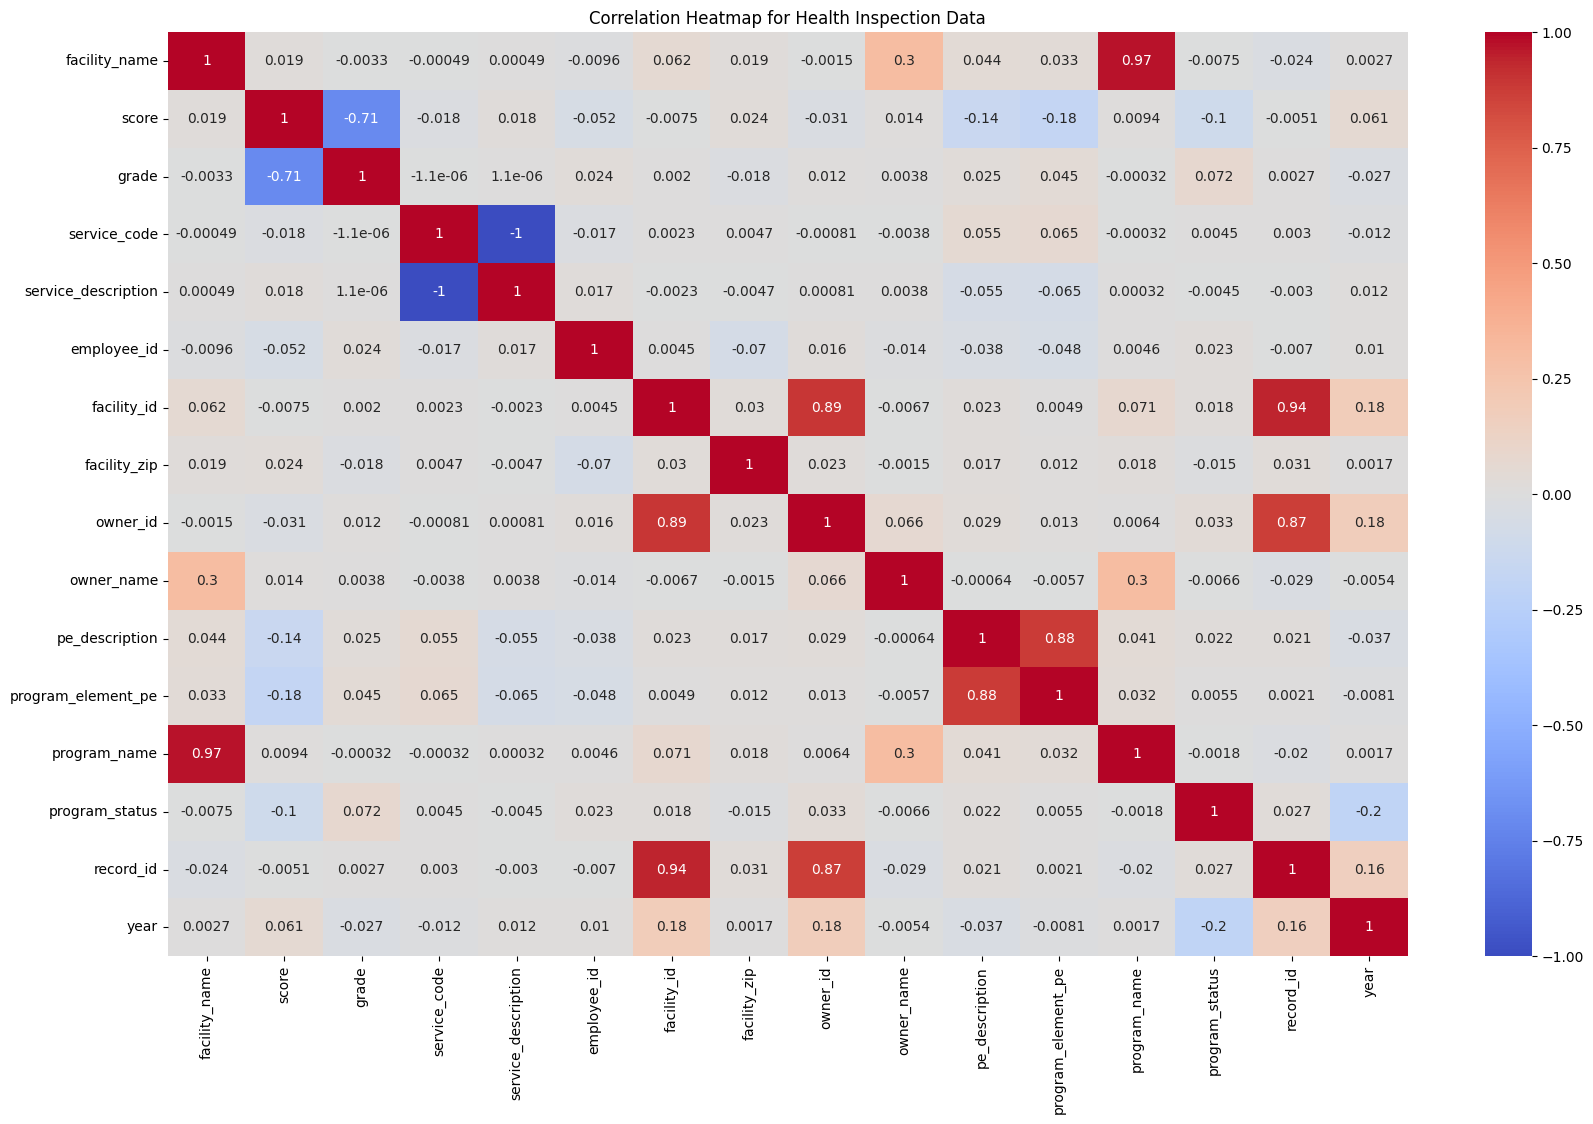

In [15]:
# Correlation heatmap for columns in health_new_df for better visualization of the relationship between the columns
corr = health_new_df.corr() # Reference (6)
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Health Inspection Data')
plt.show()

1. **Facility ID** and **Record ID** have a high correlation which could be due to the reason that they point to very similar info and we can drop one of them
2. **Facility ID** and **Owner ID** have a high correlation which is logical as facilities and owners should have a unique mapping
3. **Record ID** and **Owner ID** similarly have a high correlation
4. **Service Description** and **Service Code** have a perfect -1 correlation meaning they encode the exact same info
5. **Grade** and **Score** have a -0.71 correlation and visually we can see that the grade is determined by thresholding the score
6. **Program Element PE** and **PE Description** have a high correlation which could be due to similar info encoded
7. **Facility Name**, **Owner Name**, **Program Name** are encoded using IDs also so they can be eliminated



In [16]:
# As we can see from the heatmap, there is a very high correlation between some columns showing that they are highly dependent on each other. We can drop some of these columns to reduce the dimensionality of the dataset
health_new_df = health_new_df.drop(columns = ['facility_name', 'owner_name', 'pe_description', 'program_name', 'service_description', 'owner_id', 'record_id'], errors = 'ignore')
health_new_df

score  grade  service_code  employee_id  facility_id  facility_zip  \
0         95      1             1          923       170465         90065   
1         92      1             1          633       244690         90045   
2         93      1             1          835       224109         90028   
3         94      1             1          923       252528         90026   
4         94      1             1          923       252789         90026   
...      ...    ...           ...          ...          ...           ...   
67568     94      1             1          360       159703         90012   
67569     96      1             1          723       137540         90018   
67570     91      1             1          594       170167         90011   
67571     95      1             1          375       225467         90025   
67572     97      1             1          557        49848         90063   

       program_element_pe  program_status  year  
0                       7               0  2017  
1                       7               0  2017  
2                       6               0  2017  
3                       7               0  2017  
4                       7               0  2017  
...                   ...             ...   ...  
67568                  11               0  2018  
67569                   3               0  2018  
67570                   5               0  2018  
67571                  11               0  2018  
67572                   7               0  2018  

[67573 rows x 9 columns]

In [17]:
# As we can see grade is obtained by just thresholding the score, so we can drop the grade column
health_new_df = health_new_df.drop(columns = ['grade'], errors = 'ignore')
health_new_df

score  service_code  employee_id  facility_id  facility_zip  \
0         95             1          923       170465         90065   
1         92             1          633       244690         90045   
2         93             1          835       224109         90028   
3         94             1          923       252528         90026   
4         94             1          923       252789         90026   
...      ...           ...          ...          ...           ...   
67568     94             1          360       159703         90012   
67569     96             1          723       137540         90018   
67570     91             1          594       170167         90011   
67571     95             1          375       225467         90025   
67572     97             1          557        49848         90063   

       program_element_pe  program_status  year  
0                       7               0  2017  
1                       7               0  2017  
2                       6               0  2017  
3                       7               0  2017  
4                       7               0  2017  
...                   ...             ...   ...  
67568                  11               0  2018  
67569                   3               0  2018  
67570                   5               0  2018  
67571                  11               0  2018  
67572                   7               0  2018  

[67573 rows x 8 columns]

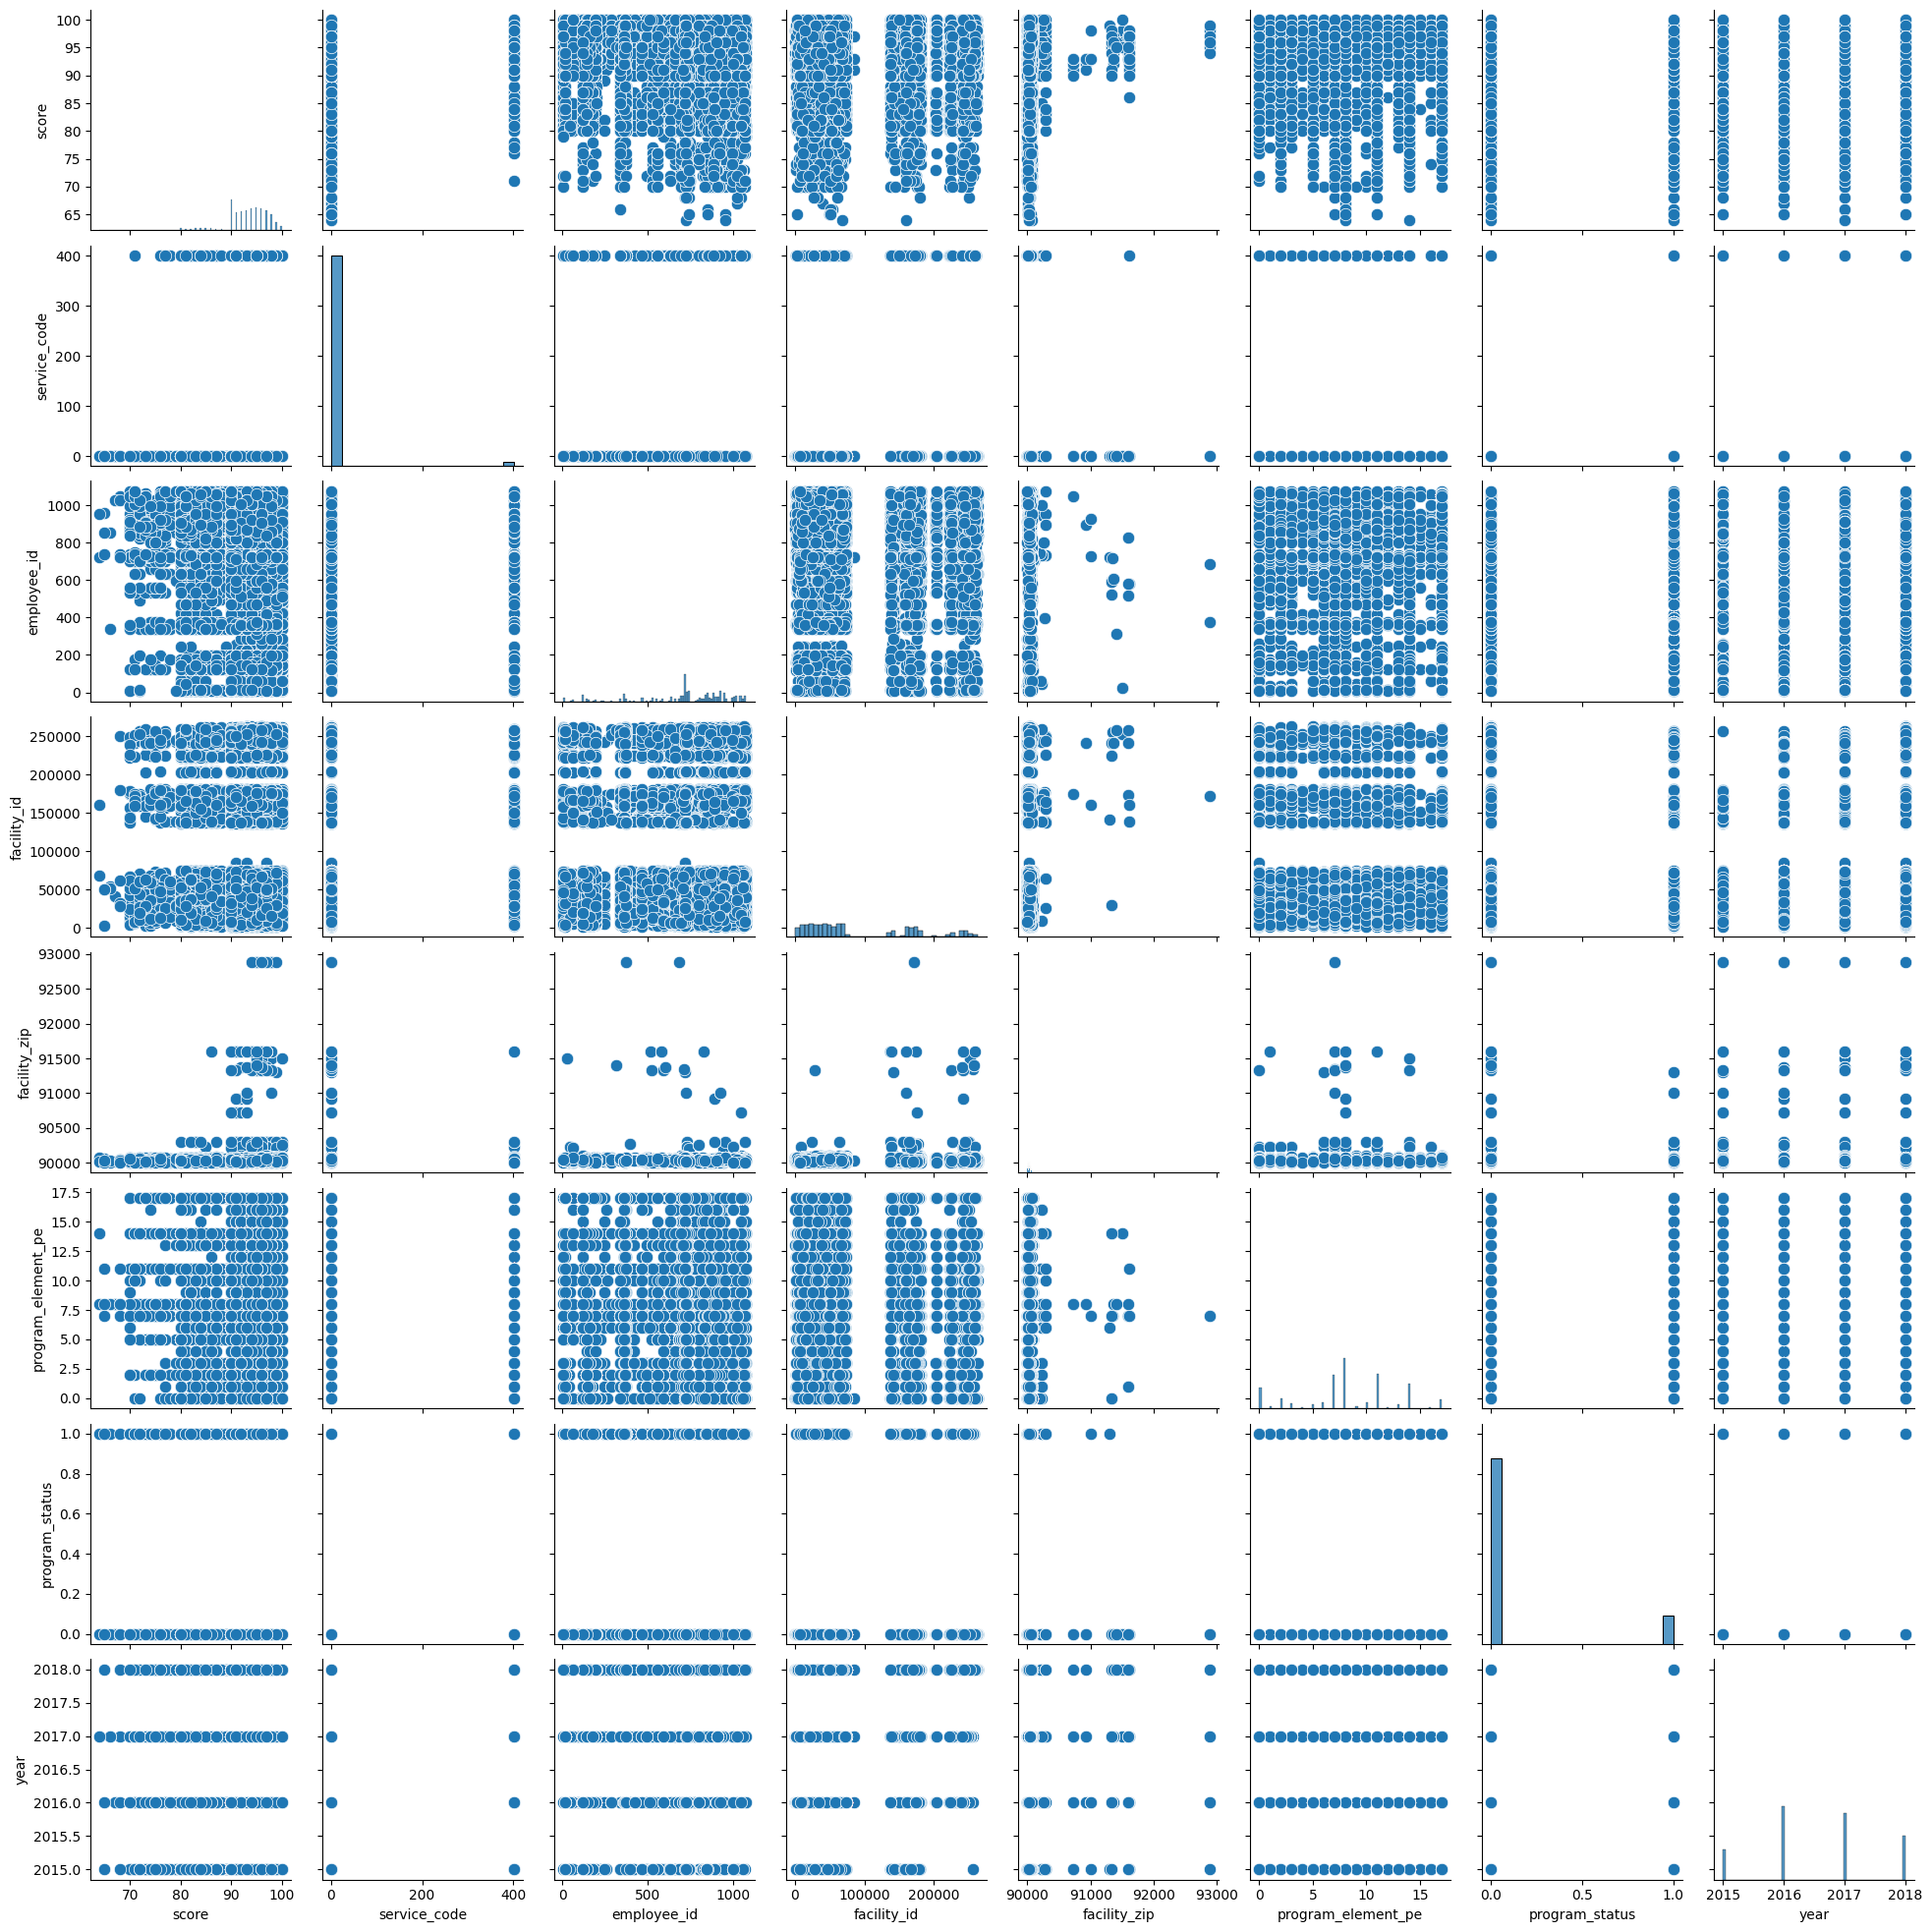

In [18]:
# Plot jointplot for the columns in health_new_df
sns.pairplot(health_new_df, plot_kws=dict(s=80, edgecolor="white", linewidth=0.5)) # Reference (7)
plt.show()

In [19]:
# Count number of inactive projects that is program_status = 1 per zipcode in the health dataset 
health_new_df.groupby('facility_zip')['program_status'].value_counts() # Reference (8)
# Display the number of inactive projects per zipcode
health_new_df[health_new_df['program_status'] == 1].groupby('facility_zip')['program_status'].count()

facility_zip
90001    159
90002     42
90003    202
90004    246
90005    291
        ... 
90222      2
90272      6
90291     13
91006      4
91307      1
Name: program_status, Length: 71, dtype: int64

<Axes: xlabel='facility_zip'>

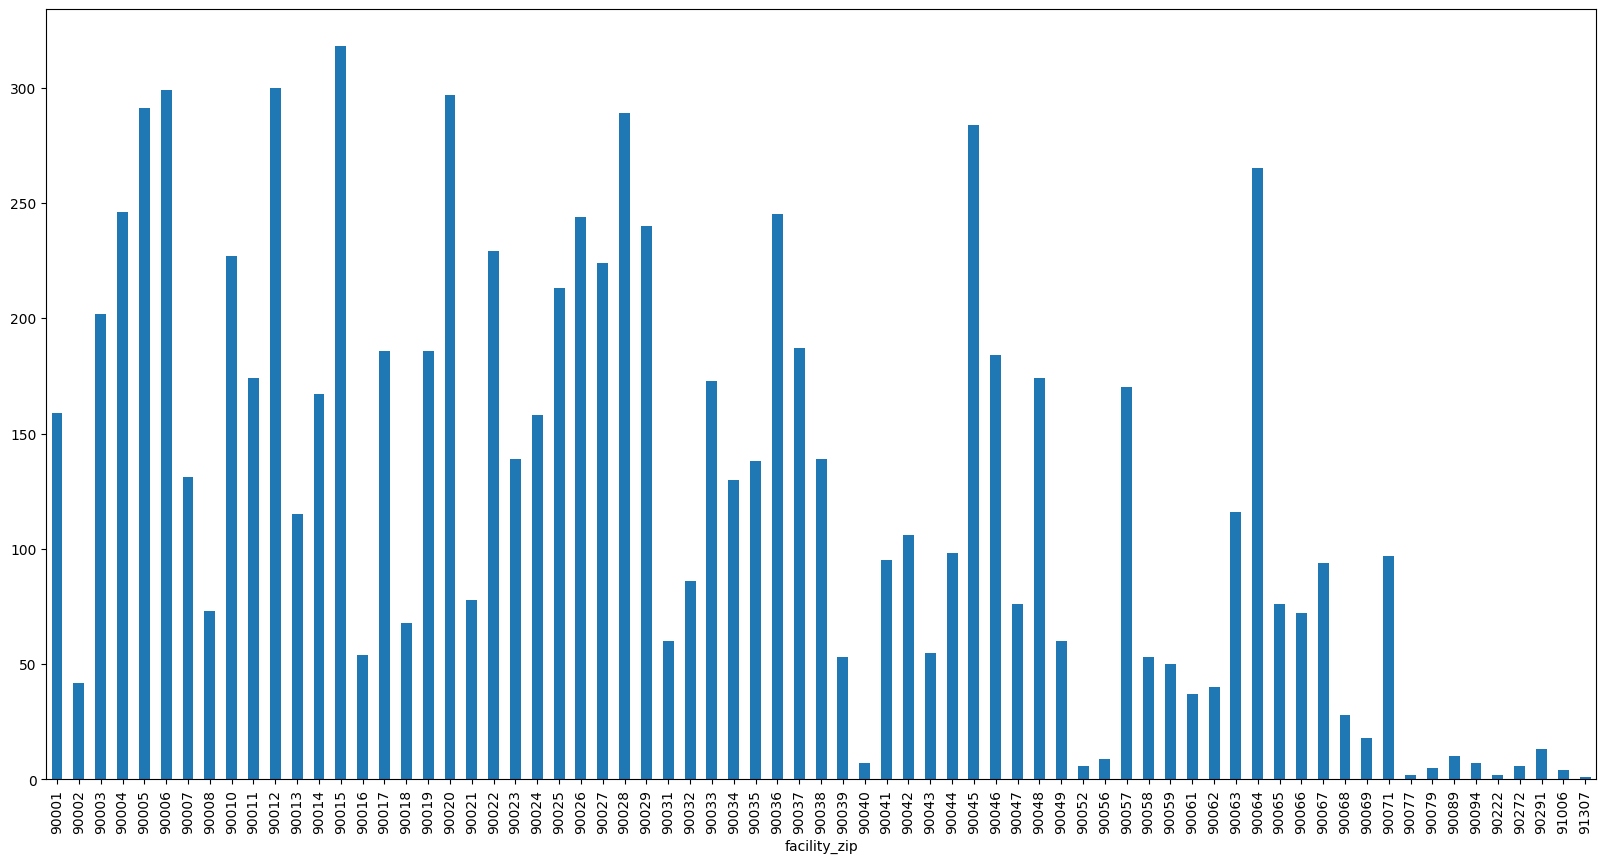

In [20]:
# Only count unique occurences of inactive projects per zipcode
health_new_df[health_new_df['program_status'] == 1].groupby('facility_zip')['program_status'].count().plot(kind='bar', figsize=(20, 10))

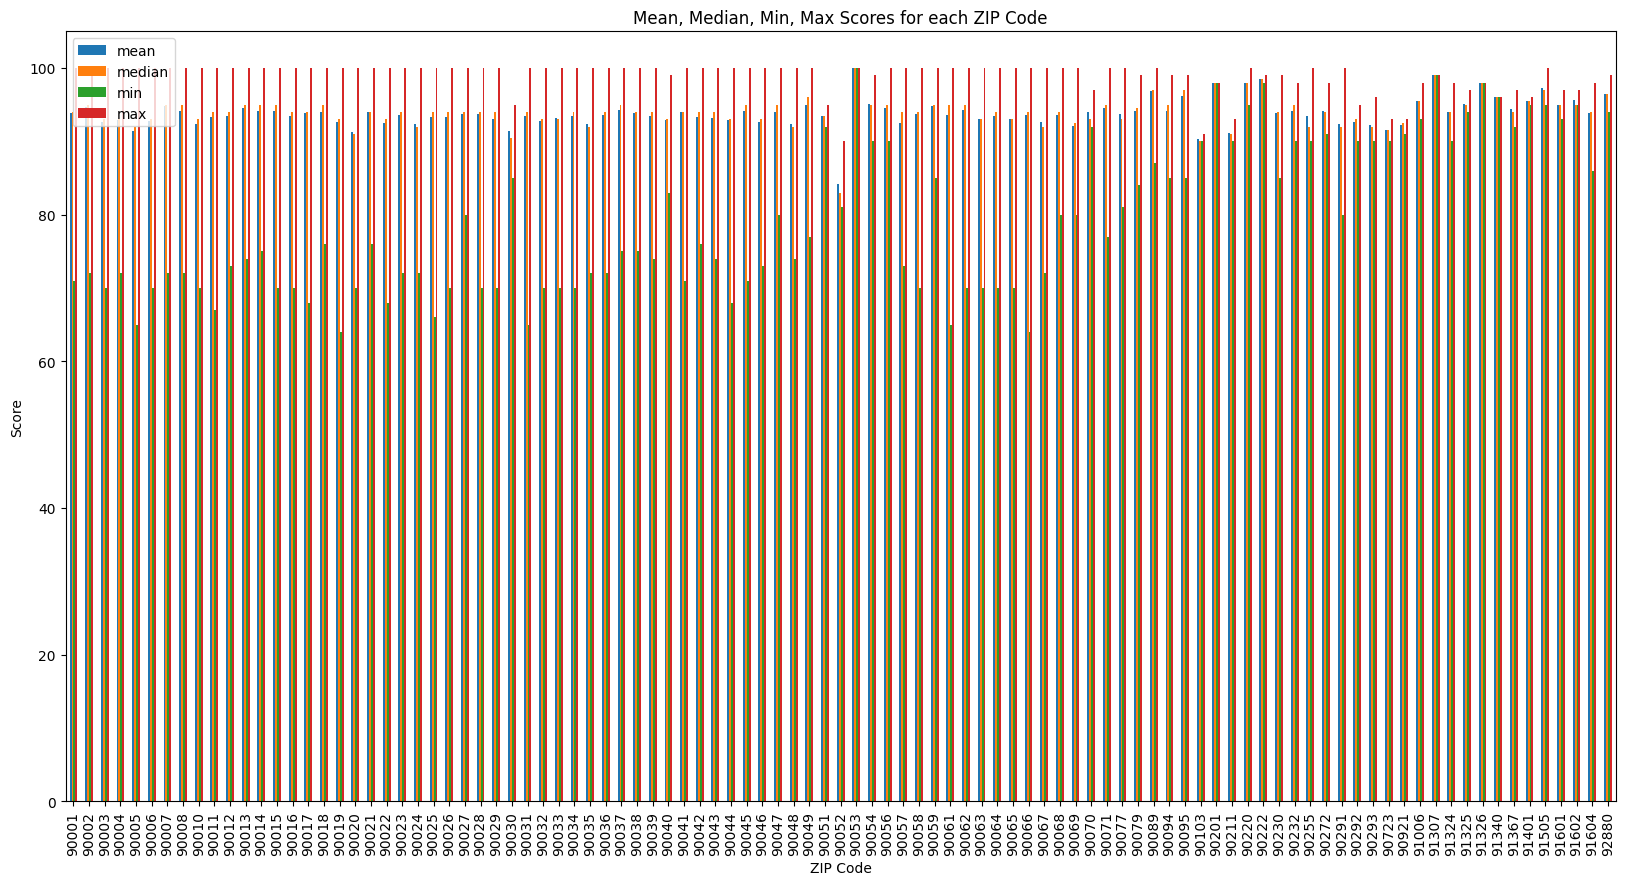

In [21]:
# Plot mean, median, low, high for score column for each zip code
health_new_df.groupby('facility_zip')['score'].agg(['mean', 'median', 'min', 'max']).plot(kind='bar', figsize=(20, 10))
plt.title('Mean, Median, Min, Max Scores for each ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Score')
plt.show()

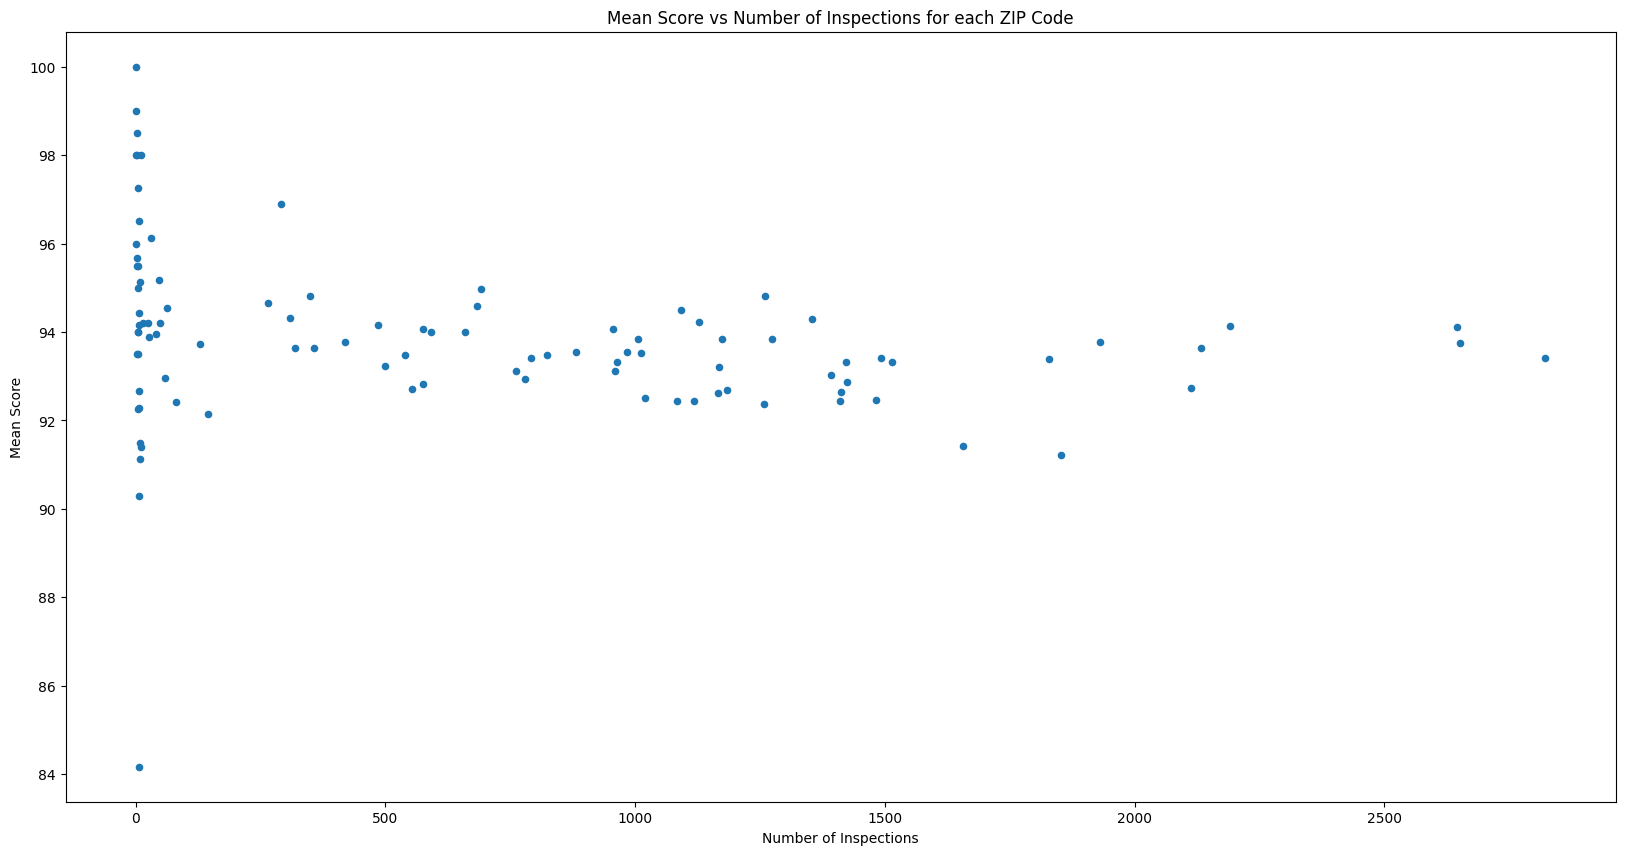

In [22]:
# Plot Mean score versus number of inspections for each zip code
# X axis will have values of Number of inspections and Y axis will have values of Mean score
health_new_df.groupby('facility_zip')['score'].agg(['mean', 'count']).plot(kind='scatter', x='count', y='mean', figsize=(20, 10))
plt.title('Mean Score vs Number of Inspections for each ZIP Code')
plt.xlabel('Number of Inspections')
plt.ylabel('Mean Score')
plt.show()

In [23]:
# Create Final DF with Mean Max High Low for score, Number of inspections, number of different facilities for each zip code
# Also add the number of unique inactive projects per zipcode using facility_id
conn = sql.connect(':memory:') # Reference (9)
health_new_df.to_sql('health', conn, index=False)
final_health_df = pd.read_sql_query('''
SELECT facility_zip, mean_score, min_score, max_score, num_inspections, num_facilities, IFNULL(num_inactive_projects, 0) as num_inactive_projects -- IFNULL is used to replace NULL values with 0
FROM
(SELECT facility_zip, AVG(score) as mean_score, MIN(score) as min_score, MAX(score) as max_score, COUNT(score) as num_inspections
FROM health GROUP BY facility_zip) as a
JOIN
(SELECT facility_zip as facility_zip_b, COUNT(DISTINCT facility_id) as num_facilities
FROM health GROUP BY facility_zip_b) as b
ON a.facility_zip = b.facility_zip_b
LEFT JOIN
(SELECT facility_zip as facility_zip_c, COUNT(program_status) as num_inactive_projects
FROM health WHERE program_status = 1 GROUP BY facility_zip_c) as c
ON a.facility_zip = c.facility_zip_c
''', conn) # Reference (10)
final_health_df

facility_zip  mean_score  min_score  max_score  num_inspections  \
0          90001   93.844974         71        100             1174   
1          90002   94.649057         72        100              265   
2          90003   92.693412         70        100             1184   
3          90004   92.866573         72        100             1424   
4          90005   91.426932         65        100             1656   
..           ...         ...        ...        ...              ...   
94         91505   97.250000         95        100                4   
95         91601   95.000000         93         97                4   
96         91602   95.666667         95         97                3   
97         91604   93.888889         86         98               27   
98         92880   96.500000         94         99                6   

    num_facilities  num_inactive_projects  
0              293                    159  
1               71                     42  
2              291                    202  
3              291                    246  
4              310                    291  
..             ...                    ...  
94               1                      0  
95               1                      0  
96               2                      0  
97               3                      0  
98               1                      0  

[99 rows x 7 columns]

# EDA for Housing Data

In [24]:
# Plot header for housing_df
housing_df.head()

APN PROJECT NUMBER                       NAME DEVELOPMENT STAGE  \
0  5143020023      02-118256       SAN LUCAS APARTMENTS        In-Service   
1  5050011005      05-117193     LEEWARD APTS. (SITE 7)        In-Service   
2  5114014020      14-121652    FLORENCE MILLS (SITE 5)        In-Service   
3  4012018025          60013  MORGAN PLACE SENIOR APTS.        In-Service   
4  5153030026          50036             WITMER HEIGHTS        In-Service   

  CONSTRUCTION TYPE                                       SITE ADDRESS  \
0  NEW CONSTRUCTION               1221 W 7TH ST  Los Angeles, CA 90017   
1             REHAB            2809 S WEST BLVD  Los Angeles, CA 90016   
2  NEW CONSTRUCTION  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3  NEW CONSTRUCTION        7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               NaN             116 S WITMER ST  Los Angeles, CA 90026   

   SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                       1       1           WESTLAKE         196  ...   
1                      10       7  CRENSHAW DISTRICT           0  ...   
2                       9       5            CENTRAL           0  ...   
3                       8       1          HYDE PARK          55  ...   
4                      13       1     TEMPLE-BEAUDRY          49  ...   

                MANAGEMENT COMPANY   CONTACT PHONE  \
0         GSL PROPERRTY MANAGEMENT             NaN   
1  ALPHA PROPERTY MANAGEMENT, INC.  (323) 231-4174   
2   BARKER MANAGEMENT INCORPORATED  (714) 533-3450   
3                ABODE COMMUNITIES  (213) 225-2772   
4         THE JOHN STEWART COMPANY  (213) 482-9122   

                                               PHOTO   JOBS  \
0  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4  click here (http://hcidapp.lacity.org/mpphotos...   95.0   

                                 PROJECT SUMMARY URL  CONTRACT NUMBERS  \
0  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
1  click here (http://hcidapp.lacity.org/ahtfRepo...               NaN   
2  click here (http://hcidapp.lacity.org/ahtfRepo...          C-129358   
3  click here (http://hcidapp.lacity.org/ahtfRepo...          C-111486   
4  click here (http://hcidapp.lacity.org/ahtfRepo...          C-109452   

                DATE STAMP  SITE LONGITUDE  SITE LATITUDE  \
0  2024-08-05T00:00:00.000      -118.26584       34.05235   
1  2024-08-05T00:00:00.000      -118.34182       34.03071   
2  2024-08-05T00:00:00.000      -118.25740       34.01115   
3  2024-08-05T00:00:00.000      -118.33139       33.97355   
4  2024-08-05T00:00:00.000      -118.26086       34.06173   

             GPS_COORDS ON MAP  
0  POINT (-118.26584 34.05235)  
1  POINT (-118.34182 34.03071)  
2   POINT (-118.2574 34.01115)  
3  POINT (-118.33139 33.97355)  
4  POINT (-118.26086 34.06173)  

[5 rows x 31 columns]

In [25]:
# Zip Code is stored as a the last 5 characters of the SITE ADDRESS column, so we need to extract it and convert it to integer
housing_df['ZIP Code'] = housing_df['SITE ADDRESS'].str.extract(r'(9\d{4})').astype('str') 
# Extract the last 5 characters of the SITE ADDRESS column, Initially tried using \d{5} but that did not work as some addresses had other 5 digit numbers which resulted in wrong zip codes
housing_df['ZIP Code'] = housing_df['ZIP Code'].astype('int')
housing_df

APN PROJECT NUMBER                         NAME DEVELOPMENT STAGE  \
0    5143020023      02-118256         SAN LUCAS APARTMENTS        In-Service   
1    5050011005      05-117193       LEEWARD APTS. (SITE 7)        In-Service   
2    5114014020      14-121652      FLORENCE MILLS (SITE 5)        In-Service   
3    4012018025          60013    MORGAN PLACE SENIOR APTS.        In-Service   
4    5153030026          50036               WITMER HEIGHTS        In-Service   
..          ...            ...                          ...               ...   
590  5101030030      18-125517       MAIN STREET APARTMENTS        In-Service   
591  5149010949      18-124964  GRAND AVENUE PARCEL Q APTS.        In-Service   
592  5114014004      14-121652      FLORENCE MILLS (SITE 4)        In-Service   
593  5183005010      09-117211      LAS MARGARITAS (SITE 2)        In-Service   
594  5153006024          50035                  UNION POINT        In-Service   

                   CONSTRUCTION TYPE  \
0                   NEW CONSTRUCTION   
1                              REHAB   
2                   NEW CONSTRUCTION   
3                   NEW CONSTRUCTION   
4                                NaN   
..                               ...   
590                 NEW CONSTRUCTION   
591            DEMO/NEW CONSTRUCTION   
592                 NEW CONSTRUCTION   
593  BOTH REHAB AND NEW CONSTRUCTION   
594                 NEW CONSTRUCTION   

                                          SITE ADDRESS  \
0                 1221 W 7TH ST  Los Angeles, CA 90017   
1              2809 S WEST BLVD  Los Angeles, CA 90016   
2    1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3          7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               116 S WITMER ST  Los Angeles, CA 90026   
..                                                 ...   
590              5501 S MAIN ST  Los Angeles, CA 90037   
591             100 S GRAND AVE  Los Angeles, CA 90012   
592          3509 S CENTRAL AVE  LOS ANGELES, CA 90011   
593               115 N SOTO ST  Los Angeles, CA 90033   
594         420 S UNION DR 1-21  Los Angeles, CA 90017   

     SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                         1       1           WESTLAKE         196  ...   
1                        10       7  CRENSHAW DISTRICT           0  ...   
2                         9       5            CENTRAL           0  ...   
3                         8       1          HYDE PARK          55  ...   
4                        13       1     TEMPLE-BEAUDRY          49  ...   
..                      ...     ...                ...         ...  ...   
590                       9       1         SOUTH PARK          57  ...   
591                      14       1           DOWNTOWN         323  ...   
592                       9       4            CENTRAL           0  ...   
593                      14       2      BOYLE HEIGHTS           0  ...   
594                       1       1           WESTLAKE          21  ...   

      CONTACT PHONE                                              PHOTO   JOBS  \
0               NaN  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1    (323) 231-4174  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2    (714) 533-3450  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3    (213) 225-2772  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4    (213) 482-9122  click here (http://hcidapp.lacity.org/mpphotos...   95.0   
..              ...                                                ...    ...   
590  (323) 433-3676  click here (http://hcidapp.lacity.org/mpphotos...  315.0   
591             NaN  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
592  (714) 533-3450  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
593  (213) 878-2716  click here (http://hcidapp.lacity.org/mpphotos...  121.0   
594  (714) 282-2520  click here (http://hcidapp.lacity.org/mpphotos..

In [26]:
# Print unique values in each column
housing_df.nunique()

APN                        584
PROJECT NUMBER             447
NAME                       595
DEVELOPMENT STAGE            2
CONSTRUCTION TYPE            7
SITE ADDRESS               591
SITE  COUNCIL DISTRICT      15
SITE #                      20
SITE COMMUNITY              87
SITE UNITS                 144
PROJECT TOTAL UNITS        132
HOUSING TYPE                 6
SUPPORTIVE HOUSING           2
SH UNITS PER SITE           91
DATE FUNDED                382
LAHD FUNDED                350
LEVERAGE                   396
TAX EXEMPT CONDUIT BOND    126
TDC                        440
IN-SERVICE DATE             26
DEVELOPER                  226
MANAGEMENT COMPANY         146
CONTACT PHONE              182
PHOTO                      312
JOBS                       242
PROJECT SUMMARY URL        595
CONTRACT NUMBERS           378
DATE STAMP                   1
SITE LONGITUDE             549
SITE LATITUDE              565
GPS_COORDS ON MAP          582
ZIP Code                    78
dtype: i

In [27]:
# Check for unique values of zipcode in housing_df and check if the values are fine or not
housing_df['ZIP Code'].unique()

array([90017, 90016, 90011, 90043, 90026, 90015, 90037, 90291, 90041,
       90013, 90057, 90003, 90028, 90019, 90744, 91042, 90006, 91405,
       90018, 90020, 90061, 91331, 90027, 90035, 91352, 90004, 91343,
       90007, 90008, 91342, 90029, 90038, 90045, 90021, 90014, 90062,
       90059, 90044, 90033, 90731, 91324, 91402, 91335, 90031, 90247,
       91403, 91601, 90002, 90065, 91605, 90023, 90230, 90068, 91306,
       90039, 90032, 90047, 91364, 90064, 90005, 91406, 90292, 91303,
       90732, 90042, 90248, 91606, 90025, 90073, 90710, 90012, 91040,
       90063, 91411, 91311, 90046, 90066, 91401])

In [28]:
# Check for NaN values in the dataset and display the rows with NaN values
housing_df.isnull().sum()

APN                          0
PROJECT NUMBER               0
NAME                         0
DEVELOPMENT STAGE            1
CONSTRUCTION TYPE           34
SITE ADDRESS                 0
SITE  COUNCIL DISTRICT       0
SITE #                       0
SITE COMMUNITY               7
SITE UNITS                   0
PROJECT TOTAL UNITS          0
HOUSING TYPE                22
SUPPORTIVE HOUSING           0
SH UNITS PER SITE            0
DATE FUNDED                  1
LAHD FUNDED                  0
LEVERAGE                     0
TAX EXEMPT CONDUIT BOND      0
TDC                          0
IN-SERVICE DATE              0
DEVELOPER                   26
MANAGEMENT COMPANY          55
CONTACT PHONE               84
PHOTO                        0
JOBS                       180
PROJECT SUMMARY URL          0
CONTRACT NUMBERS           148
DATE STAMP                   0
SITE LONGITUDE               0
SITE LATITUDE                0
GPS_COORDS ON MAP            0
ZIP Code                     0
dtype: i

In [29]:
housing_df.head()

APN PROJECT NUMBER                       NAME DEVELOPMENT STAGE  \
0  5143020023      02-118256       SAN LUCAS APARTMENTS        In-Service   
1  5050011005      05-117193     LEEWARD APTS. (SITE 7)        In-Service   
2  5114014020      14-121652    FLORENCE MILLS (SITE 5)        In-Service   
3  4012018025          60013  MORGAN PLACE SENIOR APTS.        In-Service   
4  5153030026          50036             WITMER HEIGHTS        In-Service   

  CONSTRUCTION TYPE                                       SITE ADDRESS  \
0  NEW CONSTRUCTION               1221 W 7TH ST  Los Angeles, CA 90017   
1             REHAB            2809 S WEST BLVD  Los Angeles, CA 90016   
2  NEW CONSTRUCTION  1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3  NEW CONSTRUCTION        7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               NaN             116 S WITMER ST  Los Angeles, CA 90026   

   SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  ...  \
0                       1       1           WESTLAKE         196  ...   
1                      10       7  CRENSHAW DISTRICT           0  ...   
2                       9       5            CENTRAL           0  ...   
3                       8       1          HYDE PARK          55  ...   
4                      13       1     TEMPLE-BEAUDRY          49  ...   

    CONTACT PHONE                                              PHOTO   JOBS  \
0             NaN  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
1  (323) 231-4174  click here (http://hcidapp.lacity.org/mpphotos...    NaN   
2  (714) 533-3450  click here (http://hcidapp.lacity.org/mpphotos...  226.0   
3  (213) 225-2772  click here (http://hcidapp.lacity.org/mpphotos...  110.0   
4  (213) 482-9122  click here (http://hcidapp.lacity.org/mpphotos...   95.0   

                                 PROJECT SUMMARY URL CONTRACT NUMBERS  \
0  click here (http://hcidapp.lacity.org/ahtfRepo...              NaN   
1  click here (http://hcidapp.lacity.org/ahtfRepo...              NaN   
2  click here (http://hcidapp.lacity.org/ahtfRepo...         C-129358   
3  click here (http://hcidapp.lacity.org/ahtfRepo...         C-111486   
4  click here (http://hcidapp.lacity.org/ahtfRepo...         C-109452   

                DATE STAMP  SITE LONGITUDE  SITE LATITUDE  \
0  2024-08-05T00:00:00.000      -118.26584       34.05235   
1  2024-08-05T00:00:00.000      -118.34182       34.03071   
2  2024-08-05T00:00:00.000      -118.25740       34.01115   
3  2024-08-05T00:00:00.000      -118.33139       33.97355   
4  2024-08-05T00:00:00.000      -118.26086       34.06173   

             GPS_COORDS ON MAP ZIP Code  
0  POINT (-118.26584 34.05235)    90017  
1  POINT (-118.34182 34.03071)    90016  
2   POINT (-118.2574 34.01115)    90011  
3  POINT (-118.33139 33.97355)    90043  
4  POINT (-118.26086 34.06173)    90026  

[5 rows x 32 columns]

In [30]:
# APN, Project Number, Name are all of no use to us and hence we drop those colummns

housing_df = housing_df.drop(columns = ['APN', 'PROJECT NUMBER', 'NAME'], errors = 'ignore')
housing_df

DEVELOPMENT STAGE                CONSTRUCTION TYPE  \
0          In-Service                 NEW CONSTRUCTION   
1          In-Service                            REHAB   
2          In-Service                 NEW CONSTRUCTION   
3          In-Service                 NEW CONSTRUCTION   
4          In-Service                              NaN   
..                ...                              ...   
590        In-Service                 NEW CONSTRUCTION   
591        In-Service            DEMO/NEW CONSTRUCTION   
592        In-Service                 NEW CONSTRUCTION   
593        In-Service  BOTH REHAB AND NEW CONSTRUCTION   
594        In-Service                 NEW CONSTRUCTION   

                                          SITE ADDRESS  \
0                 1221 W 7TH ST  Los Angeles, CA 90017   
1              2809 S WEST BLVD  Los Angeles, CA 90016   
2    1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3          7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               116 S WITMER ST  Los Angeles, CA 90026   
..                                                 ...   
590              5501 S MAIN ST  Los Angeles, CA 90037   
591             100 S GRAND AVE  Los Angeles, CA 90012   
592          3509 S CENTRAL AVE  LOS ANGELES, CA 90011   
593               115 N SOTO ST  Los Angeles, CA 90033   
594         420 S UNION DR 1-21  Los Angeles, CA 90017   

     SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  \
0                         1       1           WESTLAKE         196   
1                        10       7  CRENSHAW DISTRICT           0   
2                         9       5            CENTRAL           0   
3                         8       1          HYDE PARK          55   
4                        13       1     TEMPLE-BEAUDRY          49   
..                      ...     ...                ...         ...   
590                       9       1         SOUTH PARK          57   
591                      14       1           DOWNTOWN         323   
592                       9       4            CENTRAL           0   
593                      14       2      BOYLE HEIGHTS           0   
594                       1       1           WESTLAKE          21   

     PROJECT TOTAL UNITS                    HOUSING TYPE SUPPORTIVE HOUSING  \
0                    196                         SENIORS                 No   
1                    257                          FAMILY                 No   
2                     74                   SPECIAL NEEDS                Yes   
3                     55                         SENIORS                 No   
4                     49                          FAMILY                 No   
..                   ...                             ...                ...   
590                   57                   SPECIAL NEEDS                Yes   
591                  323                          FAMILY                 No   
592                   74                   SPECIAL NEEDS                Yes   
593                   42                          FAMILY                 No   
594                   21  LARGE FAMILY / WAIVER REQUIRED                 No   

     ...   CONTACT PHONE                                              PHOTO  \
0    ...             NaN  click here (http://hcidapp.lacity.org/mpphotos...   
1    ...  (323) 231-4174  click here (http://hcidapp.lacity.org/mpphotos...   
2    ...  (714) 533-3450  click here (http://hcidapp.lacity.org/mpphotos...   
3    ...  (213) 225-2772  click here (http://hcidapp.lacity.org/mpphotos...   
4    ...  (213) 482-9122  click here (http://hcidapp.lacity.org/mpphotos...   
..   ...             ...                                                ...   
590  ...  (323) 433-3676  click here (http://hcidapp.lacity.org/mpphotos...   
591  ...             NaN  click here (http://hcidapp.lacity.org/mpphotos...   
592  ...  (714) 533-3450  click here (http://hcidapp.lacity.org/mpphotos...   
593  ...  (213) 878-2716  clic

In [31]:
# Columns like Photo, Project Summary URL, Contact Phone, Site Latitude, Site Longitude, GPS Coordinates are clearly of no use to us and hence we drop those columns

housing_df = housing_df.drop(columns = ['PHOTO', 'PROJECT SUMMARY URL', 'CONTACT PHONE', 'SITE LATITUDE', 'SITE LONGITUDE', 'GPS_COORDS ON MAP'], errors = 'ignore')
housing_df

DEVELOPMENT STAGE                CONSTRUCTION TYPE  \
0          In-Service                 NEW CONSTRUCTION   
1          In-Service                            REHAB   
2          In-Service                 NEW CONSTRUCTION   
3          In-Service                 NEW CONSTRUCTION   
4          In-Service                              NaN   
..                ...                              ...   
590        In-Service                 NEW CONSTRUCTION   
591        In-Service            DEMO/NEW CONSTRUCTION   
592        In-Service                 NEW CONSTRUCTION   
593        In-Service  BOTH REHAB AND NEW CONSTRUCTION   
594        In-Service                 NEW CONSTRUCTION   

                                          SITE ADDRESS  \
0                 1221 W 7TH ST  Los Angeles, CA 90017   
1              2809 S WEST BLVD  Los Angeles, CA 90016   
2    1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3          7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               116 S WITMER ST  Los Angeles, CA 90026   
..                                                 ...   
590              5501 S MAIN ST  Los Angeles, CA 90037   
591             100 S GRAND AVE  Los Angeles, CA 90012   
592          3509 S CENTRAL AVE  LOS ANGELES, CA 90011   
593               115 N SOTO ST  Los Angeles, CA 90033   
594         420 S UNION DR 1-21  Los Angeles, CA 90017   

     SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  \
0                         1       1           WESTLAKE         196   
1                        10       7  CRENSHAW DISTRICT           0   
2                         9       5            CENTRAL           0   
3                         8       1          HYDE PARK          55   
4                        13       1     TEMPLE-BEAUDRY          49   
..                      ...     ...                ...         ...   
590                       9       1         SOUTH PARK          57   
591                      14       1           DOWNTOWN         323   
592                       9       4            CENTRAL           0   
593                      14       2      BOYLE HEIGHTS           0   
594                       1       1           WESTLAKE          21   

     PROJECT TOTAL UNITS                    HOUSING TYPE SUPPORTIVE HOUSING  \
0                    196                         SENIORS                 No   
1                    257                          FAMILY                 No   
2                     74                   SPECIAL NEEDS                Yes   
3                     55                         SENIORS                 No   
4                     49                          FAMILY                 No   
..                   ...                             ...                ...   
590                   57                   SPECIAL NEEDS                Yes   
591                  323                          FAMILY                 No   
592                   74                   SPECIAL NEEDS                Yes   
593                   42                          FAMILY                 No   
594                   21  LARGE FAMILY / WAIVER REQUIRED                 No   

     ...    LEVERAGE TAX EXEMPT CONDUIT BOND           TDC  IN-SERVICE DATE  \
0    ...         0.0                       0  0.000000e+00             2003   
1    ...   7103994.0                10208936  1.731293e+07             2006   
2    ...  36081992.0                       0  4.547111e+07             2021   
3    ...   8428737.0                       0  1.370988e+07             2009   
4    ...  10865989.0                       0  1.371199e+07             2008   
..   ...         ...                     ...           ...              ...   
590  ...         0.0                       0  8.512000e+06             2024   
591  ...  38757673.0               184260433  2.230181e+08             2022   
592  ...  36081992.0                       0  4.547111e+07             2021   
593  ...  14135658.0          

In [32]:
# JOBS and CONTRACT NUMBER columns have >25% NaN values and hence we drop those columns
housing_df = housing_df.drop(columns = ['JOBS', 'CONTRACT NUMBERS'], errors = 'ignore')
housing_df

DEVELOPMENT STAGE                CONSTRUCTION TYPE  \
0          In-Service                 NEW CONSTRUCTION   
1          In-Service                            REHAB   
2          In-Service                 NEW CONSTRUCTION   
3          In-Service                 NEW CONSTRUCTION   
4          In-Service                              NaN   
..                ...                              ...   
590        In-Service                 NEW CONSTRUCTION   
591        In-Service            DEMO/NEW CONSTRUCTION   
592        In-Service                 NEW CONSTRUCTION   
593        In-Service  BOTH REHAB AND NEW CONSTRUCTION   
594        In-Service                 NEW CONSTRUCTION   

                                          SITE ADDRESS  \
0                 1221 W 7TH ST  Los Angeles, CA 90017   
1              2809 S WEST BLVD  Los Angeles, CA 90016   
2    1037 E MARTIN LUTHER KING BLVD  LOS ANGELES, C...   
3          7305 S CRENSHAW BLVD  Los Angeles, CA 90043   
4               116 S WITMER ST  Los Angeles, CA 90026   
..                                                 ...   
590              5501 S MAIN ST  Los Angeles, CA 90037   
591             100 S GRAND AVE  Los Angeles, CA 90012   
592          3509 S CENTRAL AVE  LOS ANGELES, CA 90011   
593               115 N SOTO ST  Los Angeles, CA 90033   
594         420 S UNION DR 1-21  Los Angeles, CA 90017   

     SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  \
0                         1       1           WESTLAKE         196   
1                        10       7  CRENSHAW DISTRICT           0   
2                         9       5            CENTRAL           0   
3                         8       1          HYDE PARK          55   
4                        13       1     TEMPLE-BEAUDRY          49   
..                      ...     ...                ...         ...   
590                       9       1         SOUTH PARK          57   
591                      14       1           DOWNTOWN         323   
592                       9       4            CENTRAL           0   
593                      14       2      BOYLE HEIGHTS           0   
594                       1       1           WESTLAKE          21   

     PROJECT TOTAL UNITS                    HOUSING TYPE SUPPORTIVE HOUSING  \
0                    196                         SENIORS                 No   
1                    257                          FAMILY                 No   
2                     74                   SPECIAL NEEDS                Yes   
3                     55                         SENIORS                 No   
4                     49                          FAMILY                 No   
..                   ...                             ...                ...   
590                   57                   SPECIAL NEEDS                Yes   
591                  323                          FAMILY                 No   
592                   74                   SPECIAL NEEDS                Yes   
593                   42                          FAMILY                 No   
594                   21  LARGE FAMILY / WAIVER REQUIRED                 No   

     ...  DATE FUNDED LAHD FUNDED    LEVERAGE  TAX EXEMPT CONDUIT BOND  \
0    ...   11/29/2001        0.00         0.0                        0   
1    ...   05/02/2005        0.00   7103994.0                 10208936   
2    ...   12/17/2018  9389115.63  36081992.0                        0   
3    ...   04/02/2007  5281147.00   8428737.0                        0   
4    ...   01/19/2006  2846000.00  10865989.0                        0   
..   ...          ...         ...         ...                      ...   
590  ...   06/17/2021  8512000.00         0.0                        0   
591  ...   11/02/2018        0.00  38757673.0                184260433   
592  ...   12/17/2018  9389115.63  36081992.0                        0   
593  ...   05/13/2010   559761.00  14135658.0                        0   
594  .

In [33]:
# We have already extracted the zipcodes from the address and hence that column is of no use to us
housing_df = housing_df.drop(columns = ['SITE ADDRESS'], errors = 'ignore')
housing_df

DEVELOPMENT STAGE                CONSTRUCTION TYPE  \
0          In-Service                 NEW CONSTRUCTION   
1          In-Service                            REHAB   
2          In-Service                 NEW CONSTRUCTION   
3          In-Service                 NEW CONSTRUCTION   
4          In-Service                              NaN   
..                ...                              ...   
590        In-Service                 NEW CONSTRUCTION   
591        In-Service            DEMO/NEW CONSTRUCTION   
592        In-Service                 NEW CONSTRUCTION   
593        In-Service  BOTH REHAB AND NEW CONSTRUCTION   
594        In-Service                 NEW CONSTRUCTION   

     SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  \
0                         1       1           WESTLAKE         196   
1                        10       7  CRENSHAW DISTRICT           0   
2                         9       5            CENTRAL           0   
3                         8       1          HYDE PARK          55   
4                        13       1     TEMPLE-BEAUDRY          49   
..                      ...     ...                ...         ...   
590                       9       1         SOUTH PARK          57   
591                      14       1           DOWNTOWN         323   
592                       9       4            CENTRAL           0   
593                      14       2      BOYLE HEIGHTS           0   
594                       1       1           WESTLAKE          21   

     PROJECT TOTAL UNITS                    HOUSING TYPE SUPPORTIVE HOUSING  \
0                    196                         SENIORS                 No   
1                    257                          FAMILY                 No   
2                     74                   SPECIAL NEEDS                Yes   
3                     55                         SENIORS                 No   
4                     49                          FAMILY                 No   
..                   ...                             ...                ...   
590                   57                   SPECIAL NEEDS                Yes   
591                  323                          FAMILY                 No   
592                   74                   SPECIAL NEEDS                Yes   
593                   42                          FAMILY                 No   
594                   21  LARGE FAMILY / WAIVER REQUIRED                 No   

     SH UNITS PER SITE DATE FUNDED  LAHD FUNDED    LEVERAGE  \
0                    0  11/29/2001         0.00         0.0   
1                    0  05/02/2005         0.00   7103994.0   
2                    0  12/17/2018   9389115.63  36081992.0   
3                    0  04/02/2007   5281147.00   8428737.0   
4                    0  01/19/2006   2846000.00  10865989.0   
..                 ...         ...          ...         ...   
590                 56  06/17/2021   8512000.00         0.0   
591                  0  11/02/2018         0.00  38757673.0   
592                  0  12/17/2018   9389115.63  36081992.0   
593                  0  05/13/2010    559761.00  14135658.0   
594                  0  02/17/2006   2334000.00   5910494.0   

     TAX EXEMPT CONDUIT BOND           TDC IN-SERVICE DATE  \
0                          0  0.000000e+00            2003   
1                   10208936  1.731293e+07            2006   
2                          0  4.547111e+07            2021   
3                          0  1.370988e+07            2009   
4                          0  1.371199e+07            2008   
..                       ...           ...             ...   
590                        0  8.512000e+06            2024   
591                184260433  2.230181e+08            2022   
592                        0  4.547111e+07            2021   
593                        0  1.469542e+07            2012   
594                        0  8.244494e+06            2008   

               

In [34]:
# DATE STAMP, IN-SERVICE DATE provide no additional relevant info to the analysis and hence are excluded
housing_df = housing_df.drop(columns = ['DATE STAMP', 'IN-SERVICE DATE'], errors = 'ignore')
housing_df

DEVELOPMENT STAGE                CONSTRUCTION TYPE  \
0          In-Service                 NEW CONSTRUCTION   
1          In-Service                            REHAB   
2          In-Service                 NEW CONSTRUCTION   
3          In-Service                 NEW CONSTRUCTION   
4          In-Service                              NaN   
..                ...                              ...   
590        In-Service                 NEW CONSTRUCTION   
591        In-Service            DEMO/NEW CONSTRUCTION   
592        In-Service                 NEW CONSTRUCTION   
593        In-Service  BOTH REHAB AND NEW CONSTRUCTION   
594        In-Service                 NEW CONSTRUCTION   

     SITE  COUNCIL DISTRICT  SITE #     SITE COMMUNITY  SITE UNITS  \
0                         1       1           WESTLAKE         196   
1                        10       7  CRENSHAW DISTRICT           0   
2                         9       5            CENTRAL           0   
3                         8       1          HYDE PARK          55   
4                        13       1     TEMPLE-BEAUDRY          49   
..                      ...     ...                ...         ...   
590                       9       1         SOUTH PARK          57   
591                      14       1           DOWNTOWN         323   
592                       9       4            CENTRAL           0   
593                      14       2      BOYLE HEIGHTS           0   
594                       1       1           WESTLAKE          21   

     PROJECT TOTAL UNITS                    HOUSING TYPE SUPPORTIVE HOUSING  \
0                    196                         SENIORS                 No   
1                    257                          FAMILY                 No   
2                     74                   SPECIAL NEEDS                Yes   
3                     55                         SENIORS                 No   
4                     49                          FAMILY                 No   
..                   ...                             ...                ...   
590                   57                   SPECIAL NEEDS                Yes   
591                  323                          FAMILY                 No   
592                   74                   SPECIAL NEEDS                Yes   
593                   42                          FAMILY                 No   
594                   21  LARGE FAMILY / WAIVER REQUIRED                 No   

     SH UNITS PER SITE DATE FUNDED  LAHD FUNDED    LEVERAGE  \
0                    0  11/29/2001         0.00         0.0   
1                    0  05/02/2005         0.00   7103994.0   
2                    0  12/17/2018   9389115.63  36081992.0   
3                    0  04/02/2007   5281147.00   8428737.0   
4                    0  01/19/2006   2846000.00  10865989.0   
..                 ...         ...          ...         ...   
590                 56  06/17/2021   8512000.00         0.0   
591                  0  11/02/2018         0.00  38757673.0   
592                  0  12/17/2018   9389115.63  36081992.0   
593                  0  05/13/2010    559761.00  14135658.0   
594                  0  02/17/2006   2334000.00   5910494.0   

     TAX EXEMPT CONDUIT BOND           TDC  \
0                          0  0.000000e+00   
1                   10208936  1.731293e+07   
2                          0  4.547111e+07   
3                          0  1.370988e+07   
4                          0  1.371199e+07   
..                       ...           ...   
590                        0  8.512000e+06   
591                184260433  2.230181e+08   
592                        0  4.547111e+07   
593                        0  1.469542e+07   
594                        0  8.244494e+06   

                                             DEVELOPER  \
0                                                  NaN   
1                             HAMPSTEAD PARTNERS, INC.   
2              Hollywood Communit

In [35]:
# Check for number of unique values in each column
housing_df.nunique()

DEVELOPMENT STAGE            2
CONSTRUCTION TYPE            7
SITE  COUNCIL DISTRICT      15
SITE #                      20
SITE COMMUNITY              87
SITE UNITS                 144
PROJECT TOTAL UNITS        132
HOUSING TYPE                 6
SUPPORTIVE HOUSING           2
SH UNITS PER SITE           91
DATE FUNDED                382
LAHD FUNDED                350
LEVERAGE                   396
TAX EXEMPT CONDUIT BOND    126
TDC                        440
DEVELOPER                  226
MANAGEMENT COMPANY         146
ZIP Code                    78
dtype: int64

In [36]:
# Check for NaN values in the dataset
housing_df.isnull().sum()

DEVELOPMENT STAGE           1
CONSTRUCTION TYPE          34
SITE  COUNCIL DISTRICT      0
SITE #                      0
SITE COMMUNITY              7
SITE UNITS                  0
PROJECT TOTAL UNITS         0
HOUSING TYPE               22
SUPPORTIVE HOUSING          0
SH UNITS PER SITE           0
DATE FUNDED                 1
LAHD FUNDED                 0
LEVERAGE                    0
TAX EXEMPT CONDUIT BOND     0
TDC                         0
DEVELOPER                  26
MANAGEMENT COMPANY         55
ZIP Code                    0
dtype: int64

In [37]:
# Data types of the columns
housing_df.dtypes

DEVELOPMENT STAGE           object
CONSTRUCTION TYPE           object
SITE  COUNCIL DISTRICT       int64
SITE #                       int64
SITE COMMUNITY              object
SITE UNITS                   int64
PROJECT TOTAL UNITS          int64
HOUSING TYPE                object
SUPPORTIVE HOUSING          object
SH UNITS PER SITE            int64
DATE FUNDED                 object
LAHD FUNDED                float64
LEVERAGE                   float64
TAX EXEMPT CONDUIT BOND      int64
TDC                        float64
DEVELOPER                   object
MANAGEMENT COMPANY          object
ZIP Code                     int64
dtype: object

In [38]:
# Copy the housing_df to a new dataframe to be used in the analysis
housing_new_df = housing_df

In [39]:
# Will need to convert the columns to integer as they are stored as strings by encoding them
housing_new_df['DEVELOPMENT STAGE'] = le.fit_transform(housing_new_df['DEVELOPMENT STAGE'])
housing_new_df['CONSTRUCTION TYPE'] = le.fit_transform(housing_new_df['CONSTRUCTION TYPE'])
housing_new_df['SITE COMMUNITY'] = le.fit_transform(housing_new_df['SITE COMMUNITY'])
housing_new_df['HOUSING TYPE'] = le.fit_transform(housing_new_df['HOUSING TYPE'])
housing_new_df['SUPPORTIVE HOUSING'] = le.fit_transform(housing_new_df['SUPPORTIVE HOUSING'])
housing_new_df['DEVELOPER'] = le.fit_transform(housing_new_df['DEVELOPER'])
housing_new_df['MANAGEMENT COMPANY'] = le.fit_transform(housing_new_df['MANAGEMENT COMPANY'])

# Convert Date Funded to datetime and extract year from it

housing_new_df['DATE FUNDED'] = pd.to_datetime(housing_new_df['DATE FUNDED'])
housing_new_df['YEAR FUNDED'] = pd.to_datetime(housing_new_df['DATE FUNDED']).dt.year

# Drop the DATE FUNDED column as we have extracted the year from it
housing_new_df = housing_new_df.drop(columns = ['DATE FUNDED'], errors = 'ignore')
housing_new_df

DEVELOPMENT STAGE  CONSTRUCTION TYPE  SITE  COUNCIL DISTRICT  SITE #  \
0                    1                  5                       1       1   
1                    1                  6                      10       7   
2                    1                  5                       9       5   
3                    1                  5                       8       1   
4                    1                  7                      13       1   
..                 ...                ...                     ...     ...   
590                  1                  5                       9       1   
591                  1                  4                      14       1   
592                  1                  5                       9       4   
593                  1                  3                      14       2   
594                  1                  5                       1       1   

     SITE COMMUNITY  SITE UNITS  PROJECT TOTAL UNITS  HOUSING TYPE  \
0                81         196                  196             3   
1                12           0                  257             1   
2                 7           0                   74             4   
3                37          55                   55             3   
4                63          49                   49             1   
..              ...         ...                  ...           ...   
590              58          57                   57             4   
591              15         323                  323             1   
592               7           0                   74             4   
593               5           0                   42             1   
594              81          21                   21             2   

     SUPPORTIVE HOUSING  SH UNITS PER SITE  LAHD FUNDED    LEVERAGE  \
0                     0                  0         0.00         0.0   
1                     0                  0         0.00   7103994.0   
2                     1                  0   9389115.63  36081992.0   
3                     0                  0   5281147.00   8428737.0   
4                     0                  0   2846000.00  10865989.0   
..                  ...                ...          ...         ...   
590                   1                 56   8512000.00         0.0   
591                   0                  0         0.00  38757673.0   
592                   1                  0   9389115.63  36081992.0   
593                   0                  0    559761.00  14135658.0   
594                   0                  0   2334000.00   5910494.0   

     TAX EXEMPT CONDUIT BOND           TDC  DEVELOPER  MANAGEMENT COMPANY  \
0                          0  0.000000e+00        226                  59   
1                   10208936  1.731293e+07         98                  13   
2                          0  4.547111e+07        103                  19   
3                          0  1.370988e+07         25                   5   
4                          0  1.371199e+07         19                 128   
..                       ...           ...        ...                 ...   
590                        0  8.512000e+06        102                 145   
591                184260433  2.230181e+08         95                 146   
592                        0  4.547111e+07        103                  19   
593                        0  1.469542e+07         88                 128   
594                        0  8.244494e+06        140                 117   

     ZIP Code  YEAR FUNDED  
0       90017       2001.0  
1       90016       2005.0  
2       90011       2018.0  
3       90043       2007.0  
4       90026       2006.0  
..        ...          ...  
590     90037       2021.0  
591     90012       2018.0  
592     90011       2018.0  
593     90033       2010.0  
594     90017       2006.0  

[595 rows x 18 columns]

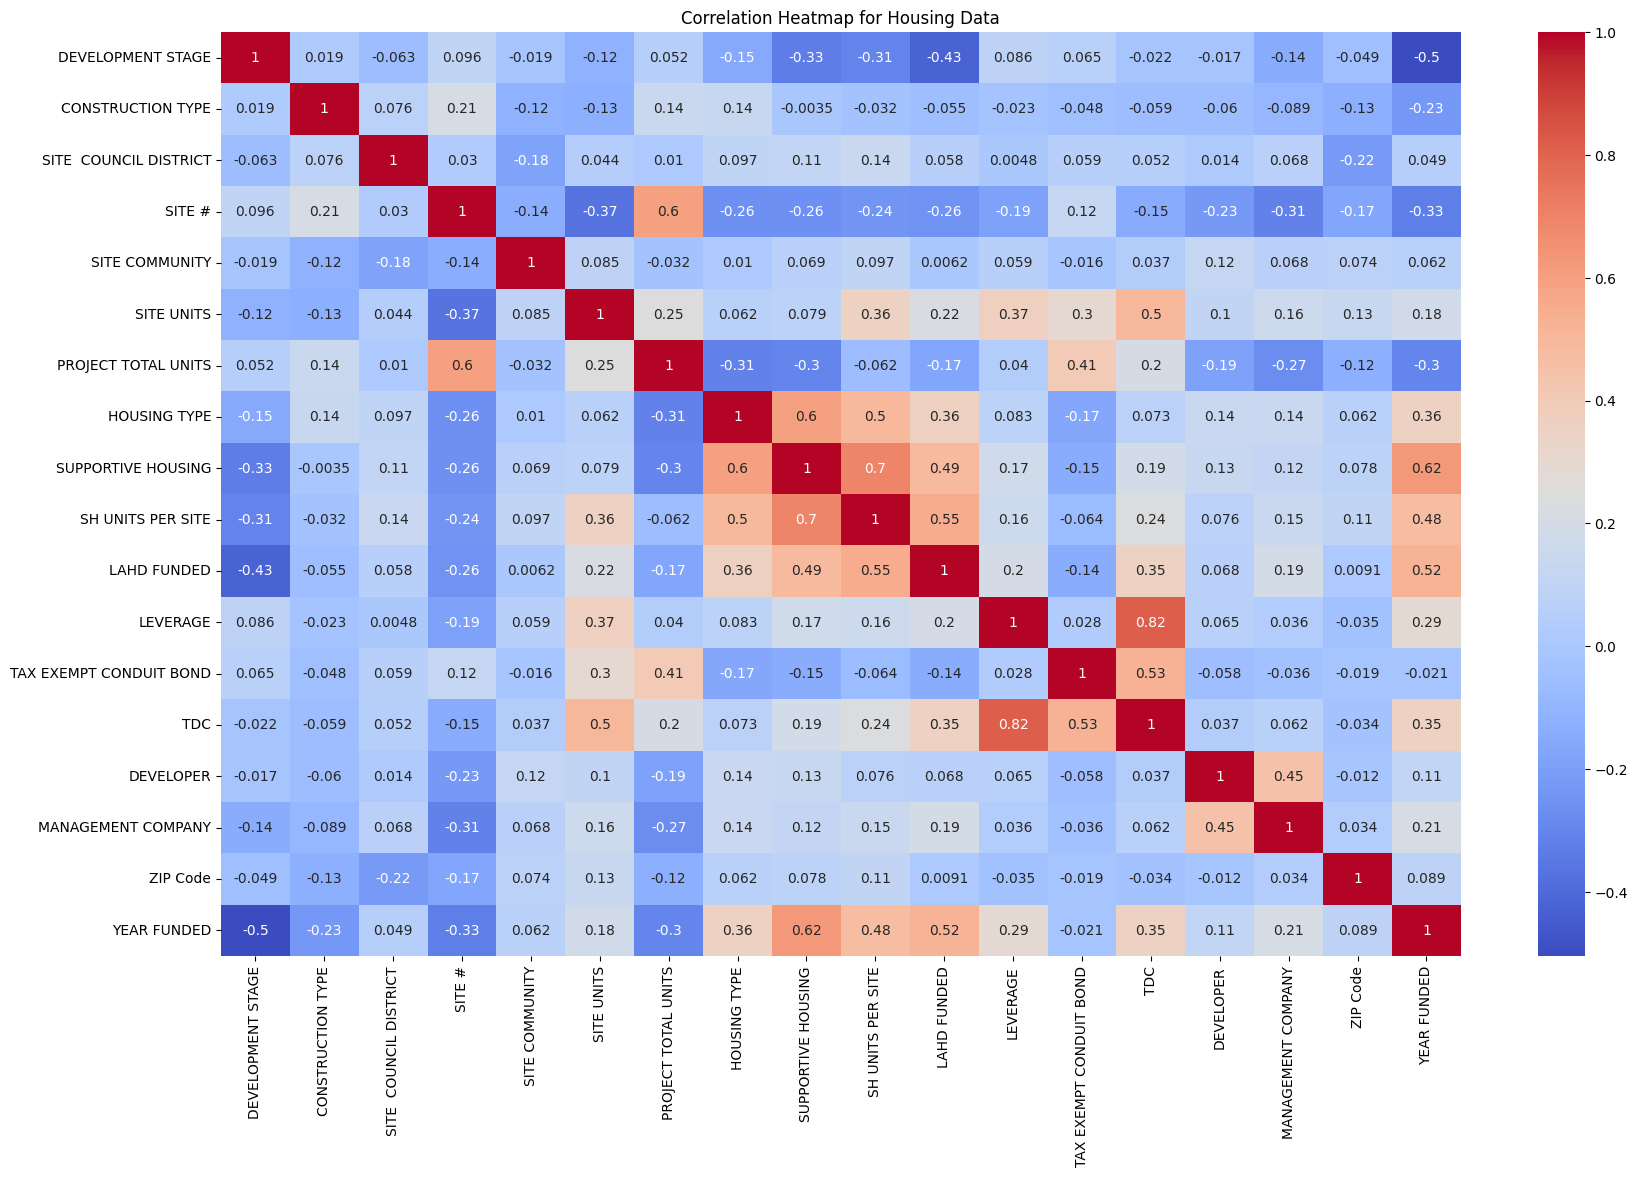

In [40]:
# Plot correlation heatmap for the columns in housing_new_df
corr = housing_new_df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Housing Data')
plt.show()

**Development Stage** and **Year Funded** have a negative correlation which makes perfect sense as a site which was funded later will be more likely to be in-active since it can be under construction compared to a site funded earlier

**Site Units** and **TDC** (Total Development Cost) has a high positive correlation which can be denoted by the fact that sites requiring a higher development cost would generally have higher number of units

**Site #** has a high correlation with many different values which could be a false positive, needs to be verified through plots though

**Supportive Housing** and **SH units per site** have a high positive correlation as a site which has supportive housing (supportive housing = 1) will have non-zero SH units leading to a positive correlation

**Supportive Housing** has a high correlation with **LAHD Funded** meaning sites funded by LAHD tend to have a supportive housing system. This claim is boosted by the high correlation between **LAHD Funded** and **SH Units per Site** 

**TDC** and **Leverage** have a very high correlation which is understandable since a site having a high TDC is expected to have a higher leverage

**TDC** and **Tax Exempt Conduit Bond** have a high correlation which could point to the fact that a site having a higher TDC will also attract more tax exempt bonds.

**TDC** and **Year Funded** have a high positive correlation which could be the case if the cost of constructions rise as years pass due to inflation or improvements in living conditions

In fact **Year Funded** has a high correlation with many quantities like 
1. **Supportive Housing** :- Could be due to rise of number of sites providing SH units
2. **SH Units per site** :- Again similar to previous point, could be due to rise in number of SH units per site
3. **LAHD Funded** :-  Could be due to increase in funding for development of Affordable housing as years pass



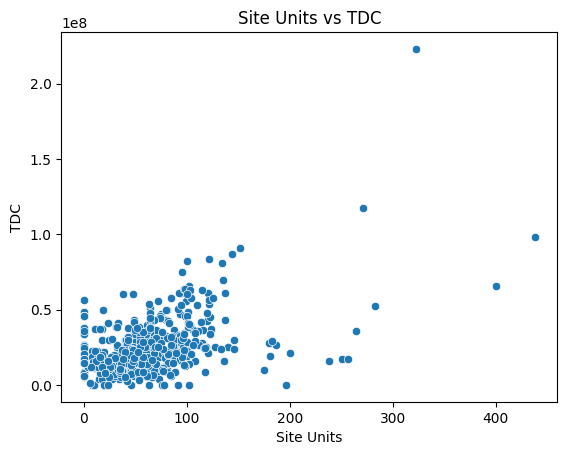

In [41]:
# Plot site units vs TDC from the dataset
sns.scatterplot(data=housing_new_df, x='SITE UNITS', y='TDC')
plt.title('Site Units vs TDC')
plt.xlabel('Site Units')
plt.ylabel('TDC')
plt.show()

As we can see our claim of Site units vs TDC shows a clear increasing pattern

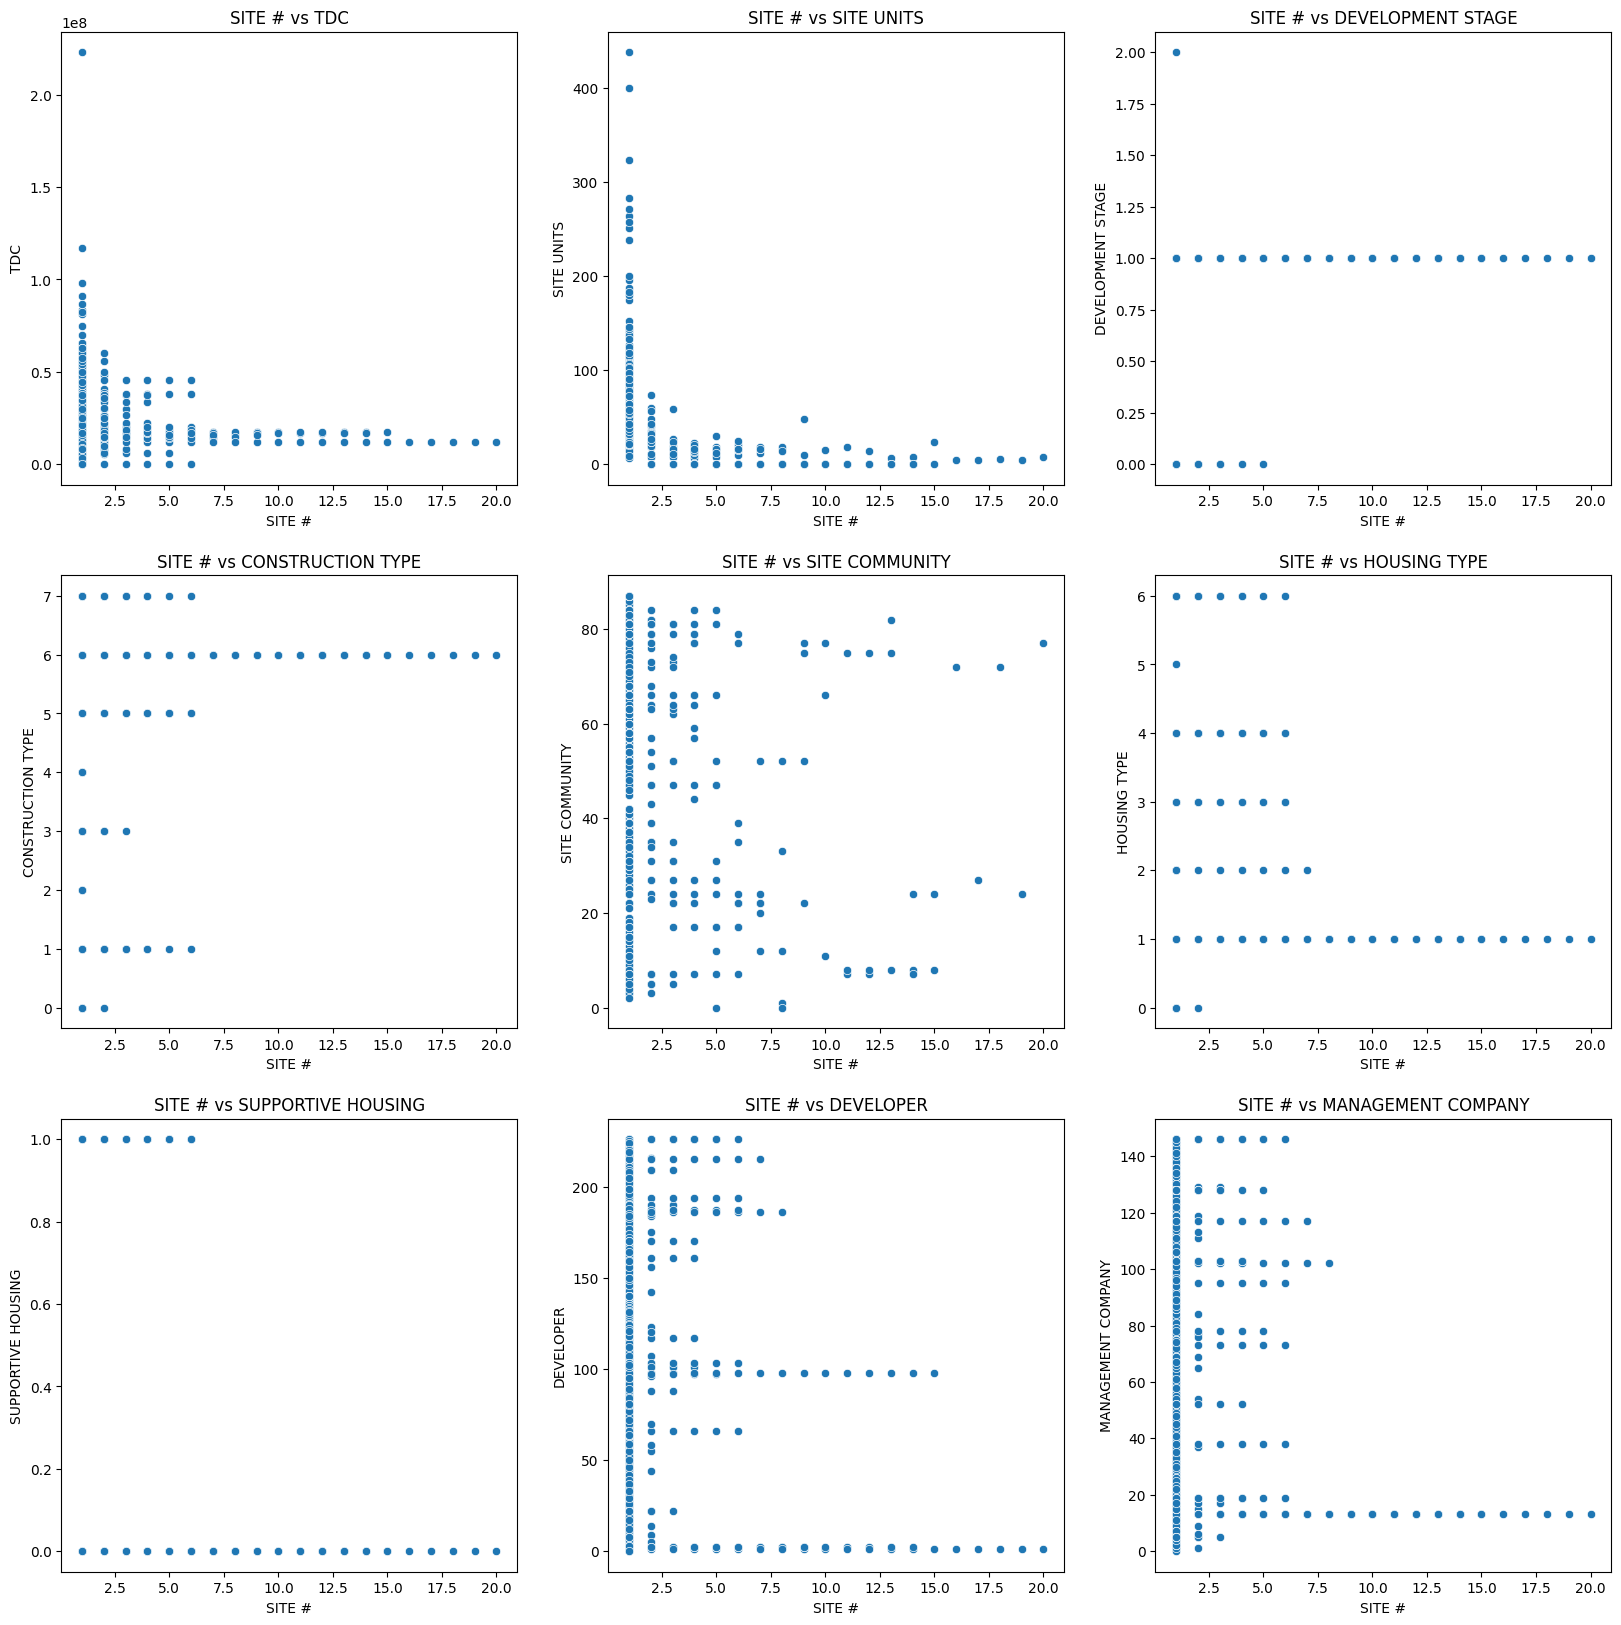

In [42]:
# Plot site # vs all the columns in the dataset plot as subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20)) # Reference (11)
sns.scatterplot(data=housing_new_df, x='SITE #', y='TDC', ax=axes[0, 0])
axes[0, 0].set_title('SITE # vs TDC')
axes[0, 0].set_xlabel('SITE #')
axes[0, 0].set_ylabel('TDC')

sns.scatterplot(data=housing_new_df, x='SITE #', y='SITE UNITS', ax=axes[0, 1])
axes[0, 1].set_title('SITE # vs SITE UNITS')
axes[0, 1].set_xlabel('SITE #')
axes[0, 1].set_ylabel('SITE UNITS')

sns.scatterplot(data=housing_new_df, x='SITE #', y='DEVELOPMENT STAGE', ax=axes[0, 2])
axes[0, 2].set_title('SITE # vs DEVELOPMENT STAGE')
axes[0, 2].set_xlabel('SITE #')
axes[0, 2].set_ylabel('DEVELOPMENT STAGE')

sns.scatterplot(data=housing_new_df, x='SITE #', y='CONSTRUCTION TYPE', ax=axes[1, 0])
axes[1, 0].set_title('SITE # vs CONSTRUCTION TYPE')
axes[1, 0].set_xlabel('SITE #')
axes[1, 0].set_ylabel('CONSTRUCTION TYPE')

sns.scatterplot(data=housing_new_df, x='SITE #', y='SITE COMMUNITY', ax=axes[1, 1])
axes[1, 1].set_title('SITE # vs SITE COMMUNITY')
axes[1, 1].set_xlabel('SITE #')
axes[1, 1].set_ylabel('SITE COMMUNITY')

sns.scatterplot(data=housing_new_df, x='SITE #', y='HOUSING TYPE', ax=axes[1, 2])
axes[1, 2].set_title('SITE # vs HOUSING TYPE')
axes[1, 2].set_xlabel('SITE #')
axes[1, 2].set_ylabel('HOUSING TYPE')

sns.scatterplot(data=housing_new_df, x='SITE #', y='SUPPORTIVE HOUSING', ax=axes[2, 0])
axes[2, 0].set_title('SITE # vs SUPPORTIVE HOUSING')
axes[2, 0].set_xlabel('SITE #')
axes[2, 0].set_ylabel('SUPPORTIVE HOUSING')

sns.scatterplot(data=housing_new_df, x='SITE #', y='DEVELOPER', ax=axes[2, 1])
axes[2, 1].set_title('SITE # vs DEVELOPER')
axes[2, 1].set_xlabel('SITE #')
axes[2, 1].set_ylabel('DEVELOPER')

sns.scatterplot(data=housing_new_df, x='SITE #', y='MANAGEMENT COMPANY', ax=axes[2, 2])
axes[2, 2].set_title('SITE # vs MANAGEMENT COMPANY')
axes[2, 2].set_xlabel('SITE #')
axes[2, 2].set_ylabel('MANAGEMENT COMPANY')

plt.show()

These graphs clarified the definition of site units, which was slughtly unclear earlier

There are some projects which are spread over multiple sites across various zipcodes and the site # specifies the site number within the project, this is the reason some sites even have 0 units per site but non-zero sites in the project

In [43]:
# This means Site # is not a good predictor of any of the columns in the dataset and we can remove it 
housing_new_df = housing_new_df.drop(columns = ['SITE #'], errors = 'ignore')
housing_new_df

DEVELOPMENT STAGE  CONSTRUCTION TYPE  SITE  COUNCIL DISTRICT  \
0                    1                  5                       1   
1                    1                  6                      10   
2                    1                  5                       9   
3                    1                  5                       8   
4                    1                  7                      13   
..                 ...                ...                     ...   
590                  1                  5                       9   
591                  1                  4                      14   
592                  1                  5                       9   
593                  1                  3                      14   
594                  1                  5                       1   

     SITE COMMUNITY  SITE UNITS  PROJECT TOTAL UNITS  HOUSING TYPE  \
0                81         196                  196             3   
1                12           0                  257             1   
2                 7           0                   74             4   
3                37          55                   55             3   
4                63          49                   49             1   
..              ...         ...                  ...           ...   
590              58          57                   57             4   
591              15         323                  323             1   
592               7           0                   74             4   
593               5           0                   42             1   
594              81          21                   21             2   

     SUPPORTIVE HOUSING  SH UNITS PER SITE  LAHD FUNDED    LEVERAGE  \
0                     0                  0         0.00         0.0   
1                     0                  0         0.00   7103994.0   
2                     1                  0   9389115.63  36081992.0   
3                     0                  0   5281147.00   8428737.0   
4                     0                  0   2846000.00  10865989.0   
..                  ...                ...          ...         ...   
590                   1                 56   8512000.00         0.0   
591                   0                  0         0.00  38757673.0   
592                   1                  0   9389115.63  36081992.0   
593                   0                  0    559761.00  14135658.0   
594                   0                  0   2334000.00   5910494.0   

     TAX EXEMPT CONDUIT BOND           TDC  DEVELOPER  MANAGEMENT COMPANY  \
0                          0  0.000000e+00        226                  59   
1                   10208936  1.731293e+07         98                  13   
2                          0  4.547111e+07        103                  19   
3                          0  1.370988e+07         25                   5   
4                          0  1.371199e+07         19                 128   
..                       ...           ...        ...                 ...   
590                        0  8.512000e+06        102                 145   
591                184260433  2.230181e+08         95                 146   
592                        0  4.547111e+07        103                  19   
593                        0  1.469542e+07         88                 128   
594                        0  8.244494e+06        140                 117   

     ZIP Code  YEAR FUNDED  
0       90017       2001.0  
1       90016       2005.0  
2       90011       2018.0  
3       90043       2007.0  
4       90026       2006.0  
..        ...          ...  
590     90037       2021.0  
591     90012       2018.0  
592     90011       2018.0  
593     90033       2010.0  
594     90017       2006.0  

[595 rows x 17 columns]

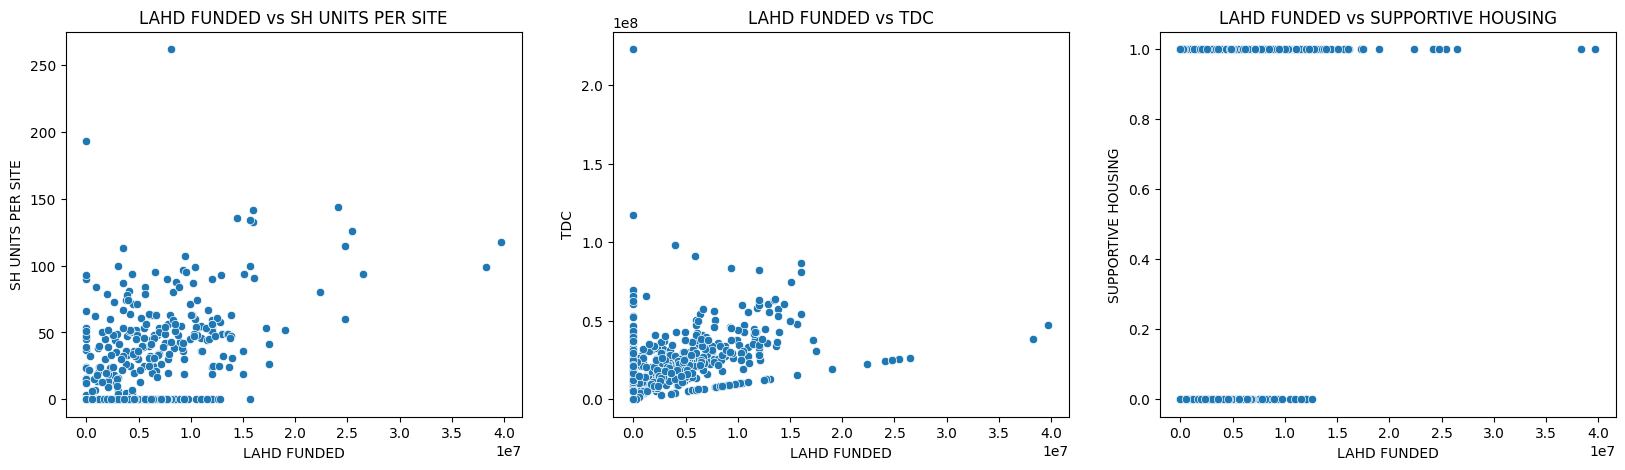

In [44]:
# Plot LAHD Funded vs SH units per site, LAHD Funded vs TDC, LAHD Funded vs Supportive Housing
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.scatterplot(data=housing_new_df, x='LAHD FUNDED', y='SH UNITS PER SITE', ax=axes[0])
axes[0].set_title('LAHD FUNDED vs SH UNITS PER SITE')
axes[0].set_xlabel('LAHD FUNDED')
axes[0].set_ylabel('SH UNITS PER SITE')

sns.scatterplot(data=housing_new_df, x='LAHD FUNDED', y='TDC', ax=axes[1])
axes[1].set_title('LAHD FUNDED vs TDC')
axes[1].set_xlabel('LAHD FUNDED')
axes[1].set_ylabel('TDC')

sns.scatterplot(data=housing_new_df, x='LAHD FUNDED', y='SUPPORTIVE HOUSING', ax=axes[2])
axes[2].set_title('LAHD FUNDED vs SUPPORTIVE HOUSING')
axes[2].set_xlabel('LAHD FUNDED')
axes[2].set_ylabel('SUPPORTIVE HOUSING')

plt.show()

These plots somewhat verify our claim of LAHD funding being related to TDC and number of supportive housing units per site 

We can also see that sites having a higher LAHD funding generally have supportive housing.

Text(0, 0.5, 'TDC')

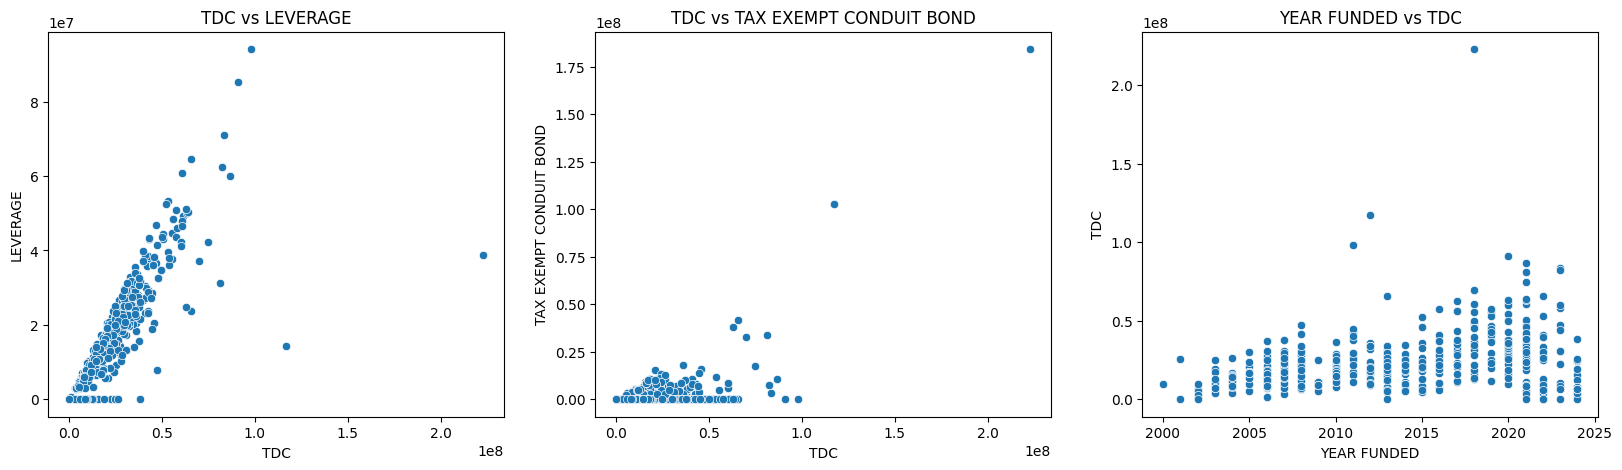

In [45]:
# Plot TDC vs Leverage, TDC vs Tax exempt conduit bonds, TDC vs Year funded
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.scatterplot(data=housing_new_df, x='TDC', y='LEVERAGE', ax=axes[0])
axes[0].set_title('TDC vs LEVERAGE')
axes[0].set_xlabel('TDC')
axes[0].set_ylabel('LEVERAGE')

sns.scatterplot(data=housing_new_df, x='TDC', y='TAX EXEMPT CONDUIT BOND', ax=axes[1])
axes[1].set_title('TDC vs TAX EXEMPT CONDUIT BOND')
axes[1].set_xlabel('TDC')
axes[1].set_ylabel('TAX EXEMPT CONDUIT BOND')

sns.scatterplot(data=housing_new_df, x='YEAR FUNDED', y='TDC', ax=axes[2])
axes[2].set_title('YEAR FUNDED vs TDC')
axes[2].set_xlabel('YEAR FUNDED')
axes[2].set_ylabel('TDC')

TDC vs Leverage shows a clear correlation

TDC vs Tax Exempt Conduit Bond isnt a very clear correlation but a weak correlation exists

The TDC is fairly constant over the years but a small rise is still seen

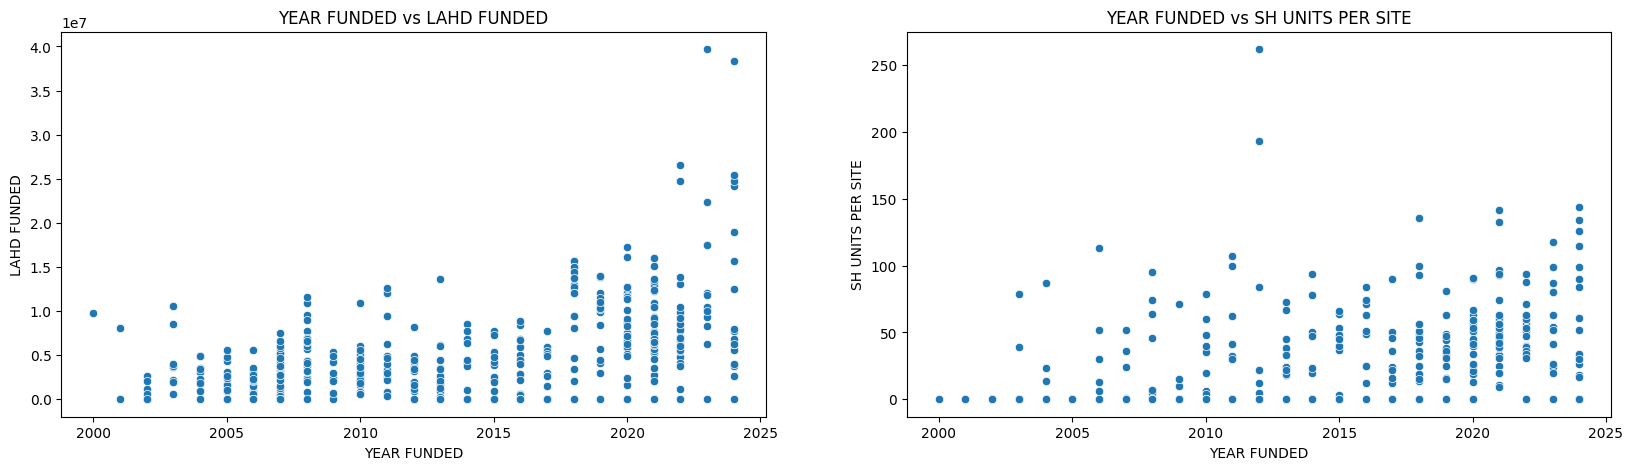

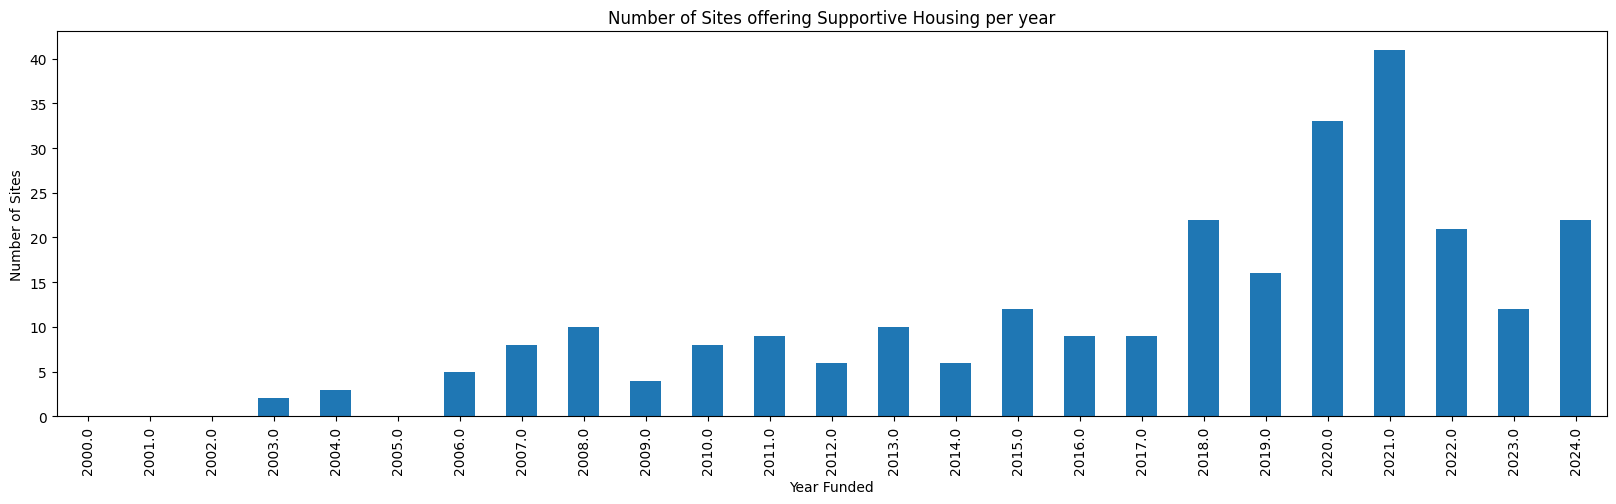

In [46]:
# Plot Year Funded vs LAHD Funded, Year Funded vs SH units per site and Year Funded vs number of sites offering supportive housing that year

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.scatterplot(data=housing_new_df, x='YEAR FUNDED', y='LAHD FUNDED', ax=axes[0])
axes[0].set_title('YEAR FUNDED vs LAHD FUNDED')
axes[0].set_xlabel('YEAR FUNDED')
axes[0].set_ylabel('LAHD FUNDED')

sns.scatterplot(data=housing_new_df, x='YEAR FUNDED', y='SH UNITS PER SITE', ax=axes[1])
axes[1].set_title('YEAR FUNDED vs SH UNITS PER SITE')
axes[1].set_xlabel('YEAR FUNDED')
axes[1].set_ylabel('SH UNITS PER SITE')
plt.show()

# To find the number of sites offering supportive housing that year, we need to group by year and then count the number of sites offering supportive housing

housing_new_df.groupby('YEAR FUNDED')['SUPPORTIVE HOUSING'].sum().plot(kind='bar', figsize=(20, 5))
plt.title('Number of Sites offering Supportive Housing per year')
plt.xlabel('Year Funded')
plt.ylabel('Number of Sites')

plt.show()

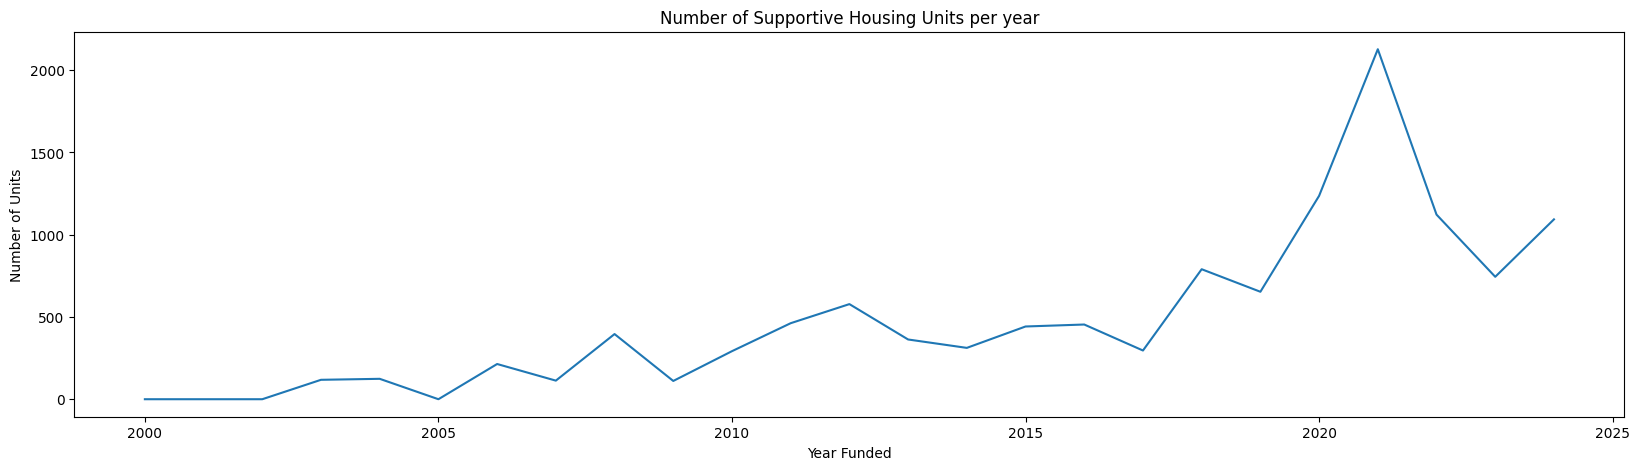

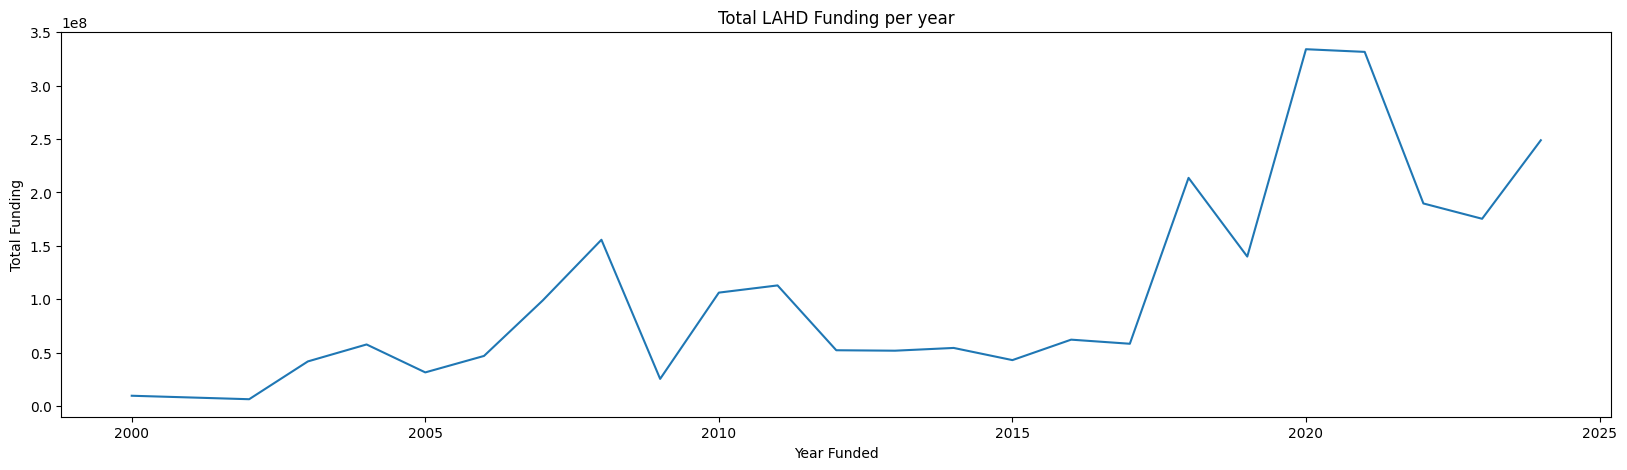

In [47]:
# Plot number of supportive housing units against year funded

housing_new_df.groupby('YEAR FUNDED')['SH UNITS PER SITE'].sum().plot(kind='line', figsize=(20, 5))
plt.title('Number of Supportive Housing Units per year')
plt.xlabel('Year Funded')
plt.ylabel('Number of Units')
plt.show()

# Plot total LAHD Funding against year funded

housing_new_df.groupby('YEAR FUNDED')['LAHD FUNDED'].sum().plot(kind='line', figsize=(20, 5))
plt.title('Total LAHD Funding per year')
plt.xlabel('Year Funded')
plt.ylabel('Total Funding')
plt.show()

There's a clear rise in number of SH units funded per year until 2020, after which there's a small drop and the upward trend starts again. The drop could be due to the Covid-19 pandemic.

In [48]:
housing_new_df

DEVELOPMENT STAGE  CONSTRUCTION TYPE  SITE  COUNCIL DISTRICT  \
0                    1                  5                       1   
1                    1                  6                      10   
2                    1                  5                       9   
3                    1                  5                       8   
4                    1                  7                      13   
..                 ...                ...                     ...   
590                  1                  5                       9   
591                  1                  4                      14   
592                  1                  5                       9   
593                  1                  3                      14   
594                  1                  5                       1   

     SITE COMMUNITY  SITE UNITS  PROJECT TOTAL UNITS  HOUSING TYPE  \
0                81         196                  196             3   
1                12           0                  257             1   
2                 7           0                   74             4   
3                37          55                   55             3   
4                63          49                   49             1   
..              ...         ...                  ...           ...   
590              58          57                   57             4   
591              15         323                  323             1   
592               7           0                   74             4   
593               5           0                   42             1   
594              81          21                   21             2   

     SUPPORTIVE HOUSING  SH UNITS PER SITE  LAHD FUNDED    LEVERAGE  \
0                     0                  0         0.00         0.0   
1                     0                  0         0.00   7103994.0   
2                     1                  0   9389115.63  36081992.0   
3                     0                  0   5281147.00   8428737.0   
4                     0                  0   2846000.00  10865989.0   
..                  ...                ...          ...         ...   
590                   1                 56   8512000.00         0.0   
591                   0                  0         0.00  38757673.0   
592                   1                  0   9389115.63  36081992.0   
593                   0                  0    559761.00  14135658.0   
594                   0                  0   2334000.00   5910494.0   

     TAX EXEMPT CONDUIT BOND           TDC  DEVELOPER  MANAGEMENT COMPANY  \
0                          0  0.000000e+00        226                  59   
1                   10208936  1.731293e+07         98                  13   
2                          0  4.547111e+07        103                  19   
3                          0  1.370988e+07         25                   5   
4                          0  1.371199e+07         19                 128   
..                       ...           ...        ...                 ...   
590                        0  8.512000e+06        102                 145   
591                184260433  2.230181e+08         95                 146   
592                        0  4.547111e+07        103                  19   
593                        0  1.469542e+07         88                 128   
594                        0  8.244494e+06        140                 117   

     ZIP Code  YEAR FUNDED  
0       90017       2001.0  
1       90016       2005.0  
2       90011       2018.0  
3       90043       2007.0  
4       90026       2006.0  
..        ...          ...  
590     90037       2021.0  
591     90012       2018.0  
592     90011       2018.0  
593     90033       2010.0  
594     90017       2006.0  

[595 rows x 17 columns]

In [49]:
# Construction type doesnt seem to be of a particular use to us and hence we drop that column. Site council district and Site community have many different categories and hence we drop those columns as well as they are less likely to be of use to us in the analysis
housing_new_df = housing_new_df.drop(columns = ['CONSTRUCTION TYPE', 'SITE  COUNCIL DISTRICT', 'SITE COMMUNITY'], errors = 'ignore')
housing_new_df

DEVELOPMENT STAGE  SITE UNITS  PROJECT TOTAL UNITS  HOUSING TYPE  \
0                    1         196                  196             3   
1                    1           0                  257             1   
2                    1           0                   74             4   
3                    1          55                   55             3   
4                    1          49                   49             1   
..                 ...         ...                  ...           ...   
590                  1          57                   57             4   
591                  1         323                  323             1   
592                  1           0                   74             4   
593                  1           0                   42             1   
594                  1          21                   21             2   

     SUPPORTIVE HOUSING  SH UNITS PER SITE  LAHD FUNDED    LEVERAGE  \
0                     0                  0         0.00         0.0   
1                     0                  0         0.00   7103994.0   
2                     1                  0   9389115.63  36081992.0   
3                     0                  0   5281147.00   8428737.0   
4                     0                  0   2846000.00  10865989.0   
..                  ...                ...          ...         ...   
590                   1                 56   8512000.00         0.0   
591                   0                  0         0.00  38757673.0   
592                   1                  0   9389115.63  36081992.0   
593                   0                  0    559761.00  14135658.0   
594                   0                  0   2334000.00   5910494.0   

     TAX EXEMPT CONDUIT BOND           TDC  DEVELOPER  MANAGEMENT COMPANY  \
0                          0  0.000000e+00        226                  59   
1                   10208936  1.731293e+07         98                  13   
2                          0  4.547111e+07        103                  19   
3                          0  1.370988e+07         25                   5   
4                          0  1.371199e+07         19                 128   
..                       ...           ...        ...                 ...   
590                        0  8.512000e+06        102                 145   
591                184260433  2.230181e+08         95                 146   
592                        0  4.547111e+07        103                  19   
593                        0  1.469542e+07         88                 128   
594                        0  8.244494e+06        140                 117   

     ZIP Code  YEAR FUNDED  
0       90017       2001.0  
1       90016       2005.0  
2       90011       2018.0  
3       90043       2007.0  
4       90026       2006.0  
..        ...          ...  
590     90037       2021.0  
591     90012       2018.0  
592     90011       2018.0  
593     90033       2010.0  
594     90017       2006.0  

[595 rows x 14 columns]

For our final dataframe, we can add values like 
1. Mean of TDC, Leverage, LAHD Funded, Tax exempt conduit bond for each zipcode
2. Total site units for each zipcode
3. TDC, leverage and so on per site unit for each zipcode
4. Number of sites in in-service and development stage in each zipcode
5. Number of different developers per zipcode
6. Total number of SH units per zipcode
7. Total number of sites providing SH per zipcode

In [50]:
# Replace column name of zip code to match the column name in the health dataset
housing_new_df = housing_new_df.rename(columns={'ZIP Code': 'facility_zip'})

In [51]:
# Execute the above task using sql one by one
conn = sql.connect(':memory:')
housing_new_df.to_sql('housing', conn, index=False)

# Mean of TDC, Leverage, LAHD Funded, Tax exempt conduit bond for each zipcode
final_housing_df = pd.read_sql_query('''
SELECT facility_zip, AVG(TDC) as mean_TDC, AVG(LEVERAGE) as mean_LEVERAGE, AVG(`LAHD FUNDED`) as mean_LAHD_FUNDED, 
                                     AVG(`TAX EXEMPT CONDUIT BOND`) as mean_TAX_EXEMPT_CONDUIT_BOND, SUM(TDC) as total_TDC, 
                                     SUM(LEVERAGE) as total_LEVERAGE, SUM(`LAHD FUNDED`) as total_LAHD_FUNDED, 
                                     SUM(`TAX EXEMPT CONDUIT BOND`) as total_TAX_EXEMPT_CONDUIT_BOND
FROM housing GROUP BY facility_zip
''', conn)

# total site units for each zipcode
final_housing_df['total_site_units'] = pd.read_sql_query('''
SELECT facility_zip, SUM(`SITE UNITS`) as total_site_units
FROM housing GROUP BY facility_zip
''', conn)['total_site_units']

final_housing_df


facility_zip      mean_TDC  mean_LEVERAGE  mean_LAHD_FUNDED  \
0          90002  2.557662e+07   1.645625e+07      2.710197e+06   
1          90003  2.586435e+07   1.863290e+07      4.562558e+06   
2          90004  2.667002e+07   2.057430e+07      5.122714e+06   
3          90005  3.568981e+07   2.854807e+07      1.875250e+06   
4          90006  2.096001e+07   1.666290e+07      3.078566e+06   
..           ...           ...            ...               ...   
73         91406  2.575954e+07   1.810952e+07      7.650020e+06   
74         91411  3.091952e+07   1.729327e+07      1.050525e+07   
75         91601  1.875712e+07   1.302192e+07      2.406640e+06   
76         91605  2.591431e+07   1.757665e+07      4.967976e+06   
77         91606  3.461095e+07   2.700499e+07      6.000000e+06   

    mean_TAX_EXEMPT_CONDUIT_BOND     total_TDC  total_LEVERAGE  \
0                   6.410172e+06  4.859559e+08    3.126688e+08   
1                   2.668902e+06  5.431515e+08    3.912908e+08   
2                   9.730051e+05  3.467103e+08    2.674659e+08   
3                   5.266484e+06  1.427592e+08    1.141923e+08   
4                   1.218551e+06  5.240004e+08    4.165724e+08   
..                           ...           ...             ...   
73                  0.000000e+00  5.151909e+07    3.621905e+07   
74                  3.121000e+06  3.091952e+07    1.729327e+07   
75                  3.328553e+06  7.502846e+07    5.208769e+07   
76                  3.369682e+06  1.036572e+08    7.030661e+07   
77                  1.605958e+06  6.922190e+07    5.400999e+07   

    total_LAHD_FUNDED  total_TAX_EXEMPT_CONDUIT_BOND  total_site_units  
0          51493751.0                      121793261               738  
1          95813715.0                       56046938               808  
2          66595284.0                       12649066               679  
3           7501000.0                       21065936               433  
4          76964153.0                       30463768              1084  
..                ...                            ...               ...  
73         15300040.0                              0               140  
74         10505254.0                        3121000                55  
75          9626560.0                       13314212               241  
76         19871904.0                       13478726               282  
77         12000000.0                        3211916               133  

[78 rows x 10 columns]

In [52]:
# tdc, leverage and so on per site unit for each zipcode
final_housing_df['TDC_per_site_unit'] = final_housing_df['total_TDC'] / final_housing_df['total_site_units'].fillna(0)          # TDC per site unit would be the total TDC for that zipcode divided by the total site units for that zipcode
final_housing_df['LEVERAGE_per_site_unit'] = final_housing_df['total_LEVERAGE'] / final_housing_df['total_site_units'].fillna(0) # Similarly for leverage
final_housing_df['LAHD_FUNDED_per_site_unit'] = final_housing_df['total_LAHD_FUNDED'] / final_housing_df['total_site_units'].fillna(0) # Similarly for LAHD funded
final_housing_df['TAX_EXEMPT_CONDUIT_BOND_per_site_unit'] = final_housing_df['total_TAX_EXEMPT_CONDUIT_BOND'] / final_housing_df['total_site_units'].fillna(0) # Similarly for tax exempt conduit bond

In [53]:
# Number of sites in in-service and development stage in each zipcode
num_sites_df = pd.read_sql_query('''
SELECT facility_zip, COUNT(`DEVELOPMENT STAGE`) as num_sites_in_service -- Creating a dummy df to store the counts and then merge it with the final df
FROM housing 
WHERE `DEVELOPMENT STAGE` = '1' 
GROUP BY facility_zip 
''', conn)

# Merge with final_housing_df to align the counts properly
final_housing_df = final_housing_df.merge(num_sites_df, on='facility_zip', how='left')      
# Merging using pandas beacuse merging using SQL was not working properly, due to some indexing issues arising due to the fact that some zipcodes have no sites in service or development
# This method is carried forward for the next merges as well

# Fill NaN values with 0
final_housing_df['num_sites_in_service'] = final_housing_df['num_sites_in_service'].fillna(0)

num_sites_df = pd.read_sql_query('''
SELECT facility_zip, COUNT(`DEVELOPMENT STAGE`) as num_sites_in_development
FROM housing 
WHERE `DEVELOPMENT STAGE` = '0' 
GROUP BY facility_zip 
''', conn)

# Merge with final_housing_df to align the counts properly
final_housing_df = final_housing_df.merge(num_sites_df, on='facility_zip', how='left')

# Fill NaN values with 0
final_housing_df['num_sites_in_development'] = final_housing_df['num_sites_in_development'].fillna(0)

final_housing_df

facility_zip      mean_TDC  mean_LEVERAGE  mean_LAHD_FUNDED  \
0          90002  2.557662e+07   1.645625e+07      2.710197e+06   
1          90003  2.586435e+07   1.863290e+07      4.562558e+06   
2          90004  2.667002e+07   2.057430e+07      5.122714e+06   
3          90005  3.568981e+07   2.854807e+07      1.875250e+06   
4          90006  2.096001e+07   1.666290e+07      3.078566e+06   
..           ...           ...            ...               ...   
73         91406  2.575954e+07   1.810952e+07      7.650020e+06   
74         91411  3.091952e+07   1.729327e+07      1.050525e+07   
75         91601  1.875712e+07   1.302192e+07      2.406640e+06   
76         91605  2.591431e+07   1.757665e+07      4.967976e+06   
77         91606  3.461095e+07   2.700499e+07      6.000000e+06   

    mean_TAX_EXEMPT_CONDUIT_BOND     total_TDC  total_LEVERAGE  \
0                   6.410172e+06  4.859559e+08    3.126688e+08   
1                   2.668902e+06  5.431515e+08    3.912908e+08   
2                   9.730051e+05  3.467103e+08    2.674659e+08   
3                   5.266484e+06  1.427592e+08    1.141923e+08   
4                   1.218551e+06  5.240004e+08    4.165724e+08   
..                           ...           ...             ...   
73                  0.000000e+00  5.151909e+07    3.621905e+07   
74                  3.121000e+06  3.091952e+07    1.729327e+07   
75                  3.328553e+06  7.502846e+07    5.208769e+07   
76                  3.369682e+06  1.036572e+08    7.030661e+07   
77                  1.605958e+06  6.922190e+07    5.400999e+07   

    total_LAHD_FUNDED  total_TAX_EXEMPT_CONDUIT_BOND  total_site_units  \
0          51493751.0                      121793261               738   
1          95813715.0                       56046938               808   
2          66595284.0                       12649066               679   
3           7501000.0                       21065936               433   
4          76964153.0                       30463768              1084   
..                ...                            ...               ...   
73         15300040.0                              0               140   
74         10505254.0                        3121000                55   
75          9626560.0                       13314212               241   
76         19871904.0                       13478726               282   
77         12000000.0                        3211916               133   

    TDC_per_site_unit  LEVERAGE_per_site_unit  LAHD_FUNDED_per_site_unit  \
0       658476.762873           423670.513550               69774.730352   
1       672217.142327           484270.789604              118581.330446   
2       510618.954345           393911.516937               98078.474227   
3       329697.969977           263723.521940               17323.325635   
4       483395.170664           384291.922509               71000.141144   
..                ...                     ...                        ...   
73      367993.471429           258707.471429              109286.000000   
74      562173.181818           314423.109091              191004.618182   
75      311321.423237           216131.497925               39944.232365   
76      367578.873972           249314.228582               70467.744681   
77      520465.428571           406090.120301               90225.563910   

    TAX_EXEMPT_CONDUIT_BOND_per_site_unit  num_sites_in_service  \
0                           165031.518970                  13.0   
1                            69365.022277                  20.0   
2                            18628.963181                  10.0   
3                            48651.122402                   3.0   
4                            28103.107011                  24.0   
..                                    ...                   ...   
73                               0.000000                   1.0   
74                           56745.454545                   1.0   
7

In [54]:
# Number of sites in in-service and development stage in each zipcode
num_sites_df = pd.read_sql_query('''
SELECT facility_zip, COUNT(DISTINCT DEVELOPER) as num_developers
FROM housing GROUP BY facility_zip 
''', conn)

# Merge with final_housing_df to align the counts properly
final_housing_df = final_housing_df.merge(num_sites_df, on='facility_zip', how='left')

# Fill NaN values with 0
final_housing_df['num_developers'] = final_housing_df['num_developers'].fillna(0)

num_sites_df = pd.read_sql_query('''
SELECT facility_zip, COUNT(DISTINCT `MANAGEMENT COMPANY`) as num_management_companies
FROM housing GROUP BY facility_zip 
''', conn)

# Merge with final_housing_df to align the counts properly
final_housing_df = final_housing_df.merge(num_sites_df, on='facility_zip', how='left')

# Fill NaN values with 0
final_housing_df['num_management_companies'] = final_housing_df['num_management_companies'].fillna(0)

In [55]:
# Number of sites in in-service and development stage in each zipcode
num_sites_df = pd.read_sql_query('''
SELECT facility_zip, SUM(`SH UNITS PER SITE`) as total_SH_units
FROM housing GROUP BY facility_zip 
''', conn)

# Merge with final_housing_df to align the counts properly
final_housing_df = final_housing_df.merge(num_sites_df, on='facility_zip', how='left')

# Fill NaN values with 0
final_housing_df['total_SH_units'] = final_housing_df['total_SH_units'].fillna(0)

num_sites_df = pd.read_sql_query('''
SELECT facility_zip, COUNT(`SUPPORTIVE HOUSING`) as num_sites_SH
FROM housing 
WHERE `SUPPORTIVE HOUSING` = '1' 
GROUP BY facility_zip 
''', conn)

# Merge with final_housing_df to align the counts properly
final_housing_df = final_housing_df.merge(num_sites_df, on='facility_zip', how='left')

# Fill NaN values with 0
final_housing_df['num_sites_SH'] = final_housing_df['num_sites_SH'].fillna(0)

In [56]:
final_housing_df

facility_zip      mean_TDC  mean_LEVERAGE  mean_LAHD_FUNDED  \
0          90002  2.557662e+07   1.645625e+07      2.710197e+06   
1          90003  2.586435e+07   1.863290e+07      4.562558e+06   
2          90004  2.667002e+07   2.057430e+07      5.122714e+06   
3          90005  3.568981e+07   2.854807e+07      1.875250e+06   
4          90006  2.096001e+07   1.666290e+07      3.078566e+06   
..           ...           ...            ...               ...   
73         91406  2.575954e+07   1.810952e+07      7.650020e+06   
74         91411  3.091952e+07   1.729327e+07      1.050525e+07   
75         91601  1.875712e+07   1.302192e+07      2.406640e+06   
76         91605  2.591431e+07   1.757665e+07      4.967976e+06   
77         91606  3.461095e+07   2.700499e+07      6.000000e+06   

    mean_TAX_EXEMPT_CONDUIT_BOND     total_TDC  total_LEVERAGE  \
0                   6.410172e+06  4.859559e+08    3.126688e+08   
1                   2.668902e+06  5.431515e+08    3.912908e+08   
2                   9.730051e+05  3.467103e+08    2.674659e+08   
3                   5.266484e+06  1.427592e+08    1.141923e+08   
4                   1.218551e+06  5.240004e+08    4.165724e+08   
..                           ...           ...             ...   
73                  0.000000e+00  5.151909e+07    3.621905e+07   
74                  3.121000e+06  3.091952e+07    1.729327e+07   
75                  3.328553e+06  7.502846e+07    5.208769e+07   
76                  3.369682e+06  1.036572e+08    7.030661e+07   
77                  1.605958e+06  6.922190e+07    5.400999e+07   

    total_LAHD_FUNDED  total_TAX_EXEMPT_CONDUIT_BOND  total_site_units  \
0          51493751.0                      121793261               738   
1          95813715.0                       56046938               808   
2          66595284.0                       12649066               679   
3           7501000.0                       21065936               433   
4          76964153.0                       30463768              1084   
..                ...                            ...               ...   
73         15300040.0                              0               140   
74         10505254.0                        3121000                55   
75          9626560.0                       13314212               241   
76         19871904.0                       13478726               282   
77         12000000.0                        3211916               133   

    TDC_per_site_unit  LEVERAGE_per_site_unit  LAHD_FUNDED_per_site_unit  \
0       658476.762873           423670.513550               69774.730352   
1       672217.142327           484270.789604              118581.330446   
2       510618.954345           393911.516937               98078.474227   
3       329697.969977           263723.521940               17323.325635   
4       483395.170664           384291.922509               71000.141144   
..                ...                     ...                        ...   
73      367993.471429           258707.471429              109286.000000   
74      562173.181818           314423.109091              191004.618182   
75      311321.423237           216131.497925               39944.232365   
76      367578.873972           249314.228582               70467.744681   
77      520465.428571           406090.120301               90225.563910   

    TAX_EXEMPT_CONDUIT_BOND_per_site_unit  num_sites_in_service  \
0                           165031.518970                  13.0   
1                            69365.022277                  20.0   
2                            18628.963181                  10.0   
3                            48651.122402                   3.0   
4                            28103.107011                  24.0   
..                                    ...                   ...   
73                               0.000000                   1.0   
74                           56745.454545                   1.0   
7

In [57]:
# Find number of null values in each column
final_housing_df.isnull().sum()

facility_zip                             0
mean_TDC                                 0
mean_LEVERAGE                            0
mean_LAHD_FUNDED                         0
mean_TAX_EXEMPT_CONDUIT_BOND             0
total_TDC                                0
total_LEVERAGE                           0
total_LAHD_FUNDED                        0
total_TAX_EXEMPT_CONDUIT_BOND            0
total_site_units                         0
TDC_per_site_unit                        0
LEVERAGE_per_site_unit                   0
LAHD_FUNDED_per_site_unit                0
TAX_EXEMPT_CONDUIT_BOND_per_site_unit    0
num_sites_in_service                     0
num_sites_in_development                 0
num_developers                           0
num_management_companies                 0
total_SH_units                           0
num_sites_SH                             0
dtype: int64

Data has no null values and can now be used for hypothesis testing

In [58]:
# Rename labels of facility_zip columns to avoid confusion in merged df

final_housing_df = final_housing_df.rename(columns={'facility_zip': 'facility_zip_housing'})
final_health_df = final_health_df.rename(columns={'facility_zip': 'facility_zip_health'})

In [59]:
# Merge the two datasets on ZIP code using SQL
conn = sql.connect(':memory:')
final_health_df.to_sql('final_health', conn, index=False)
final_housing_df.to_sql('final_housing', conn, index=False)

final_df = pd.read_sql_query('''
SELECT * FROM final_health
LEFT JOIN final_housing
ON final_health.facility_zip_health = final_housing.facility_zip_housing
''', conn)

final_df

facility_zip_health  mean_score  min_score  max_score  num_inspections  \
0                 90001   93.844974         71        100             1174   
1                 90002   94.649057         72        100              265   
2                 90003   92.693412         70        100             1184   
3                 90004   92.866573         72        100             1424   
4                 90005   91.426932         65        100             1656   
..                  ...         ...        ...        ...              ...   
94                91505   97.250000         95        100                4   
95                91601   95.000000         93         97                4   
96                91602   95.666667         95         97                3   
97                91604   93.888889         86         98               27   
98                92880   96.500000         94         99                6   

    num_facilities  num_inactive_projects  facility_zip_housing      mean_TDC  \
0              293                    159                   NaN           NaN   
1               71                     42               90002.0  2.557662e+07   
2              291                    202               90003.0  2.586435e+07   
3              291                    246               90004.0  2.667002e+07   
4              310                    291               90005.0  3.568981e+07   
..             ...                    ...                   ...           ...   
94               1                      0                   NaN           NaN   
95               1                      0               91601.0  1.875712e+07   
96               2                      0                   NaN           NaN   
97               3                      0                   NaN           NaN   
98               1                      0                   NaN           NaN   

    mean_LEVERAGE  ...  TDC_per_site_unit  LEVERAGE_per_site_unit  \
0             NaN  ...                NaN                     NaN   
1    1.645625e+07  ...      658476.762873           423670.513550   
2    1.863290e+07  ...      672217.142327           484270.789604   
3    2.057430e+07  ...      510618.954345           393911.516937   
4    2.854807e+07  ...      329697.969977           263723.521940   
..            ...  ...                ...                     ...   
94            NaN  ...                NaN                     NaN   
95   1.302192e+07  ...      311321.423237           216131.497925   
96            NaN  ...                NaN                     NaN   
97            NaN  ...                NaN                     NaN   
98            NaN  ...                NaN                     NaN   

    LAHD_FUNDED_per_site_unit  TAX_EXEMPT_CONDUIT_BOND_per_site_unit  \
0                         NaN                                    NaN   
1                69774.730352                          165031.518970   
2               118581.330446                           69365.022277   
3                98078.474227                           18628.963181   
4                17323.325635                           48651.122402   
..                        ...                                    ...   
94                        NaN                                    NaN   
95               39944.232365                           55245.692946   
96                        NaN                                    NaN   
97                        NaN                                    NaN   
98                        NaN                                    NaN   

    num_sites_in_service  num_sites_in_development  num_developers  \
0                    NaN                       NaN             NaN   
1                   13.0                       6.0             9.0   
2                   20.0                       1.0            11.0   
3                   10.0                       3.0             9.0   
4                    3.0                       1.0

In [60]:
# Count null values per column
final_df.isnull().sum()

facility_zip_health                       0
mean_score                                0
min_score                                 0
max_score                                 0
num_inspections                           0
num_facilities                            0
num_inactive_projects                     0
facility_zip_housing                     46
mean_TDC                                 46
mean_LEVERAGE                            46
mean_LAHD_FUNDED                         46
mean_TAX_EXEMPT_CONDUIT_BOND             46
total_TDC                                46
total_LEVERAGE                           46
total_LAHD_FUNDED                        46
total_TAX_EXEMPT_CONDUIT_BOND            46
total_site_units                         46
TDC_per_site_unit                        46
LEVERAGE_per_site_unit                   46
LAHD_FUNDED_per_site_unit                46
TAX_EXEMPT_CONDUIT_BOND_per_site_unit    46
num_sites_in_service                     46
num_sites_in_development        

In [61]:
# Show rows with null values
final_df[final_df.isnull().any(axis=1)]

facility_zip_health  mean_score  min_score  max_score  num_inspections  \
0                 90001   93.844974         71        100             1174   
8                 90010   92.436885         70        100             1117   
20                90022   92.471660         68        100             1482   
22                90024   92.432318         72        100             1411   
28                90030   91.400000         85         95               10   
32                90034   93.514822         70        100             1012   
34                90036   93.630567         72        100             2133   
38                90040   92.949153         83         99               59   
46                90048   92.377583         74        100             1258   
47                90049   94.968162         77        100              691   
48                90051   93.500000         92         95                2   
49                90052   84.166667         81         90                6   
50                90053  100.000000        100        100                1   
51                90054   95.173913         90         99               46   
52                90056   94.532258         90        100               62   
54                90058   93.764286         70        100              420   
62                90067   92.703436         72        100              553   
64                90069   92.145833         80        100              144   
65                90070   94.000000         92         97                5   
66                90071   94.588580         77        100              683   
67                90077   93.726562         81        100              128   
68                90079   94.208333         84         99               24   
69                90089   96.903780         87        100              291   
70                90094   94.204082         85         99               49   
71                90095   96.133333         85         99               30   
72                90103   90.285714         90         91                7   
73                90201   98.000000         98         98                1   
74                90211   91.125000         90         93                8   
75                90220   98.000000         95        100               10   
76                90222   98.500000         98         99                2   
78                90232   94.214286         90         98               14   
79                90255   93.500000         90        100                4   
80                90272   94.166667         91         98                6   
83                90293   92.285714         90         96                7   
84                90723   91.500000         90         93                8   
85                90921   92.250000         91         93                4   
86                91006   95.500000         93         98                4   
87                91307   99.000000         99         99                1   
89                91325   95.125000         94         97                8   
90                91326   98.000000         98         98                2   
91                91340   96.000000         96         96                1   
92                91367   94.428571         92         97                7   
94                91505   97.250000         95        100                4   
96                91602   95.666667         95         97                3   
97                91604   93.888889         86         98               27   
98                92880   96.500000         94         99                6   

    num_facilities  num_inactive_projects  facility_zip_housing  mean_TDC  \
0              293                    159                   NaN       NaN   
8              207                    227                   NaN       NaN   
20             313                    229                   NaN       NaN   
22             229           

In [62]:
# Merge the facility_zip columns into an array/set of both to get total unique zip codes
zip_codes = set(final_health_df['facility_zip_health'].unique()).union(set(final_housing_df['facility_zip_housing'].unique())) 
len(zip_codes)

124

In [63]:
# Find number of zip codes common to both datasets
common_zip_codes = set(final_health_df['facility_zip_health'].unique()).intersection(set(final_housing_df['facility_zip_housing'].unique()))
len(common_zip_codes)

53

So the total zipcodes turn out to 124 of which only 53 are common to both datasets

When we left join the datasets, the new dataset has 46 zipcodes for which all values in housing dataset are NaN

46 = 99 (number of zipcodes in health dataset) - 53 (number of common columns)

So now we can filter out all the columns which are part of only one dataset to get our required dataset with zipcodes contained in both datasets

In [64]:
# Extract these common zip codes from the final_df
final_df = final_df[final_df['facility_zip_health'].isin(common_zip_codes)]
final_df

facility_zip_health  mean_score  min_score  max_score  num_inspections  \
1                 90002   94.649057         72        100              265   
2                 90003   92.693412         70        100             1184   
3                 90004   92.866573         72        100             1424   
4                 90005   91.426932         65        100             1656   
5                 90006   92.740653         70        100             2113   
6                 90007   94.804917         72        100             1261   
7                 90008   94.152577         72        100              485   
9                 90011   93.328180         67        100             1423   
10                90012   93.417080         73        100             2822   
11                90013   94.505958         74        100             1091   
12                90014   94.218085         75        100             1128   
13                90015   94.128311         70        100             2190   
14                90016   93.470874         70        100              824   
15                90017   93.844706         68        100             1275   
16                90018   94.006757         76        100              592   
17                90019   92.634561         64        100             1412   
18                90020   91.225040         70        100             1853   
19                90021   94.069444         76        100              576   
21                90023   93.546748         72        100              984   
23                90025   93.396938         66        100             1829   
24                90026   93.327609         70        100             1514   
25                90027   93.784568         80        100             1931   
26                90028   93.751792         70        100             2651   
27                90029   93.022254         70        100             1393   
29                90031   93.475926         65        100              540   
30                90032   92.821181         70        100              576   
31                90033   93.203085         70        100             1167   
33                90035   92.429363         72        100             1083   
35                90037   94.289513         75        100             1354   
36                90038   93.841791         75        100             1005   
37                90039   93.406566         74        100              792   
39                90041   94.069038         71        100              956   
40                90042   93.322949         76        100              963   
41                90043   93.228000         74        100              500   
42                90044   92.938462         68        100              780   
43                90045   94.118336         71        100             2645   
44                90046   92.627468         73        100             1165   
45                90047   94.003035         80        100              659   
53                90057   92.511765         73        100             1020   
55                90059   94.810888         85        100              349   
56                90061   93.636872         65        100              358   
57                90062   94.322581         70        100              310   
58                90063   93.112617         70        100              959   
59                90064   93.405496         70        100             1492   
60                90065   93.106439         70        100              761   
61                90066   93.556186         64        100              881   
63                90068   93.628125         80        100              320   
77                90230   93.950000         85         99               40   
81                90291   92.407407         80        100               81   
82                90292   92.666667         90         95                6   
88                91324   

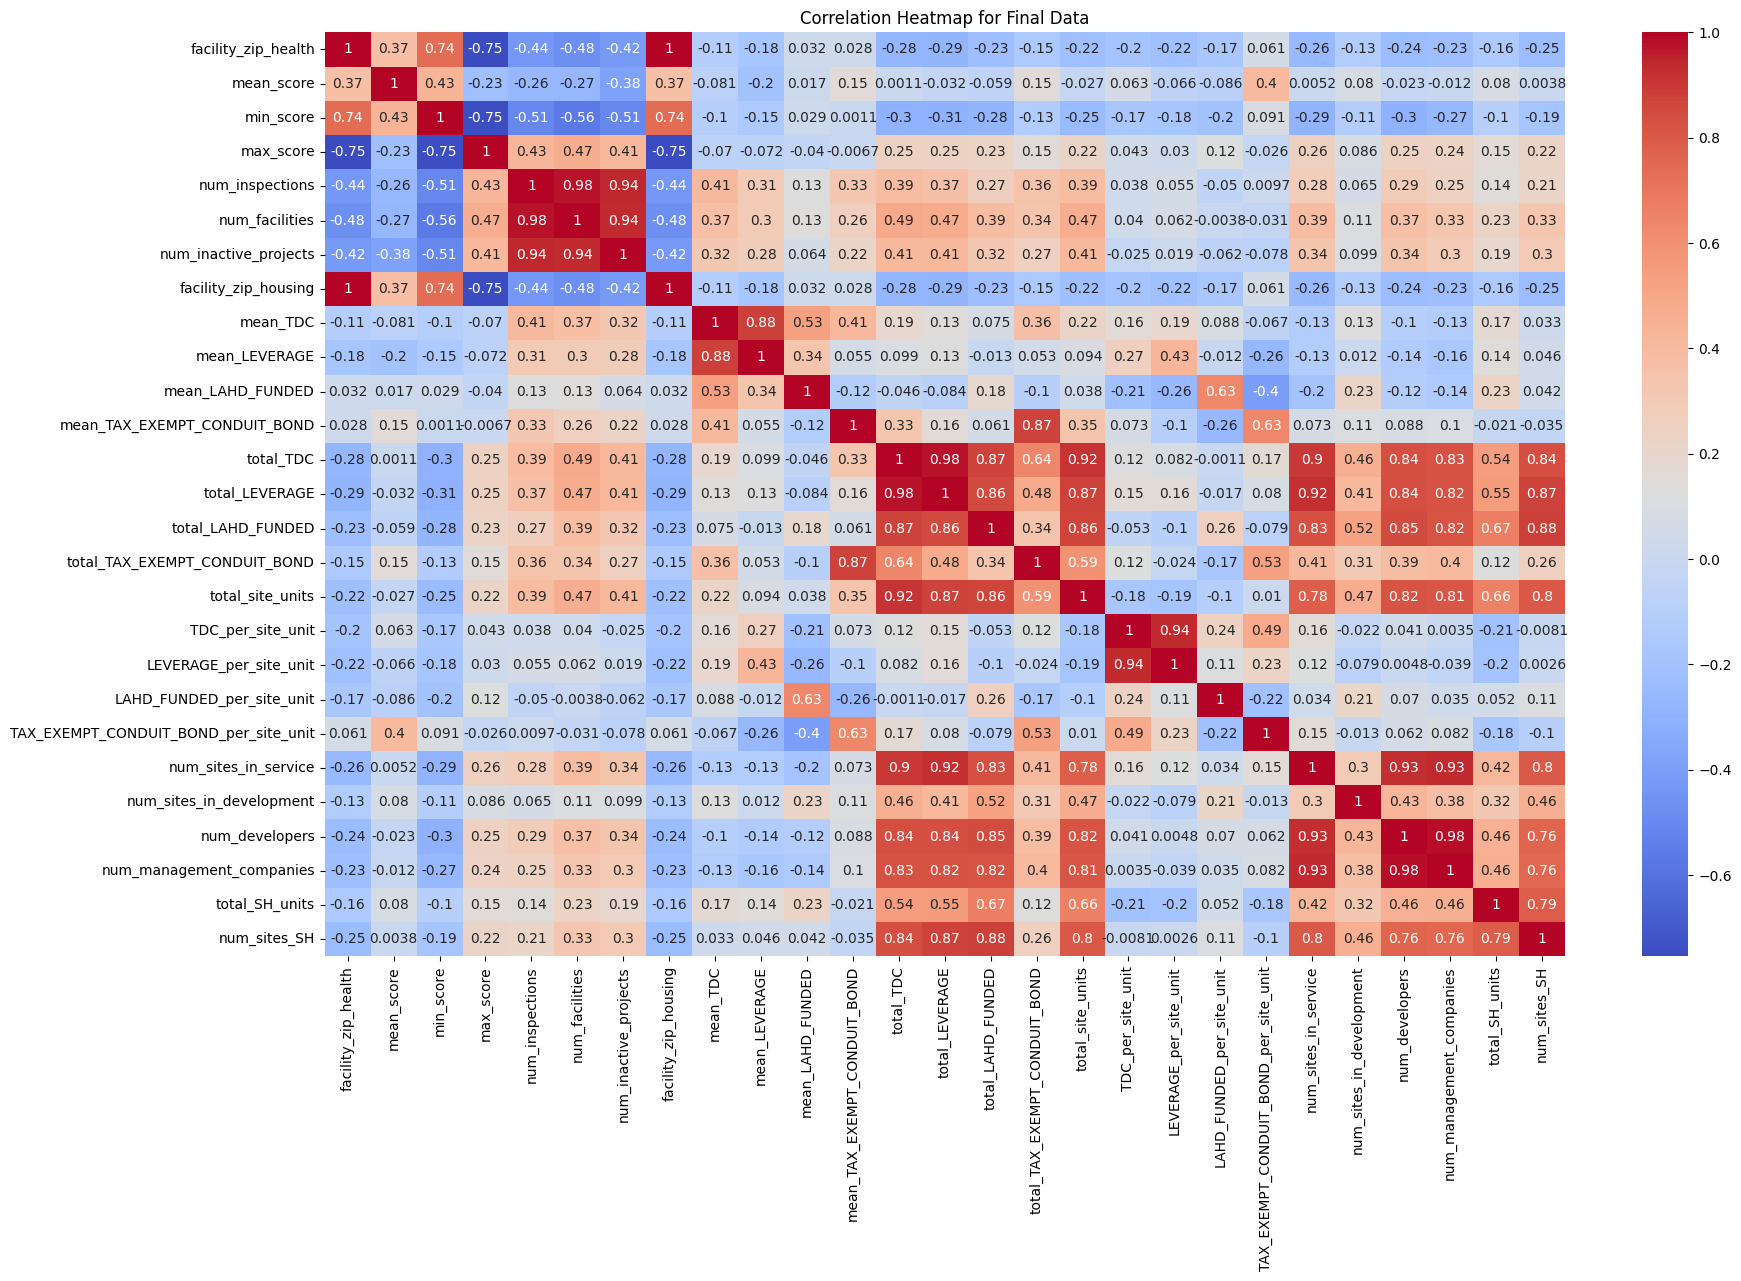

In [65]:
# Plot correlation matrix of all columns in the final_df
corr = final_df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Final Data')
plt.show()

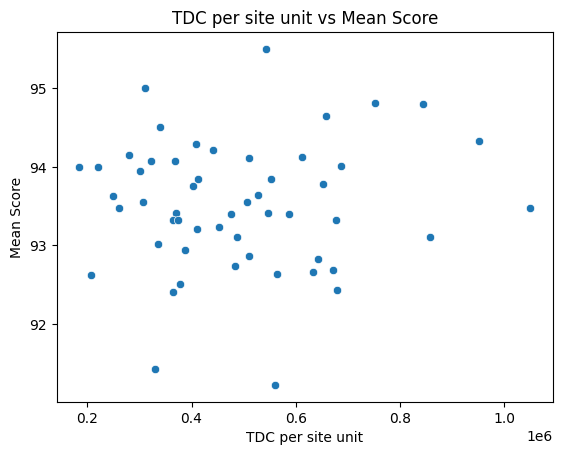

In [66]:
# Plot TDC per site vs mean score for each zip code
sns.scatterplot(data=final_df, x='TDC_per_site_unit', y='mean_score')
plt.title('TDC per site unit vs Mean Score')
plt.xlabel('TDC per site unit')
plt.ylabel('Mean Score')
plt.show()

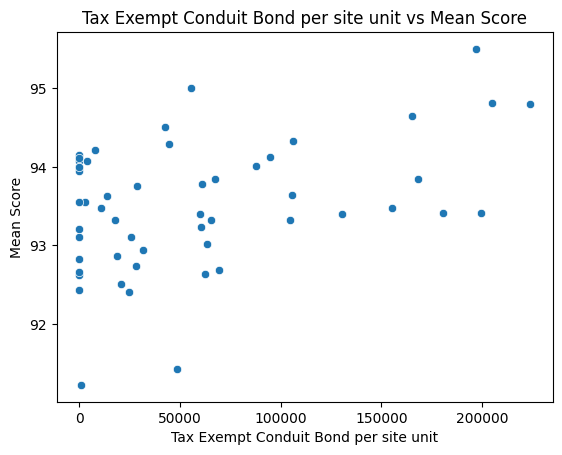

In [67]:
# Tax Exempt Conduit Bond per site unit vs mean score for each zip code
sns.scatterplot(data=final_df, x='TAX_EXEMPT_CONDUIT_BOND_per_site_unit', y='mean_score')
plt.title('Tax Exempt Conduit Bond per site unit vs Mean Score')
plt.xlabel('Tax Exempt Conduit Bond per site unit')
plt.ylabel('Mean Score')
plt.show()

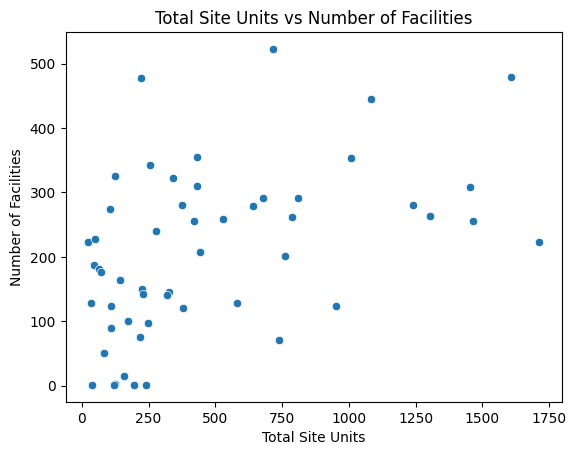

In [68]:
# Plot total site units vs num_facilities for each zip code
sns.scatterplot(data=final_df, x='total_site_units', y='num_facilities')
plt.title('Total Site Units vs Number of Facilities')
plt.xlabel('Total Site Units')
plt.ylabel('Number of Facilities')
plt.show()

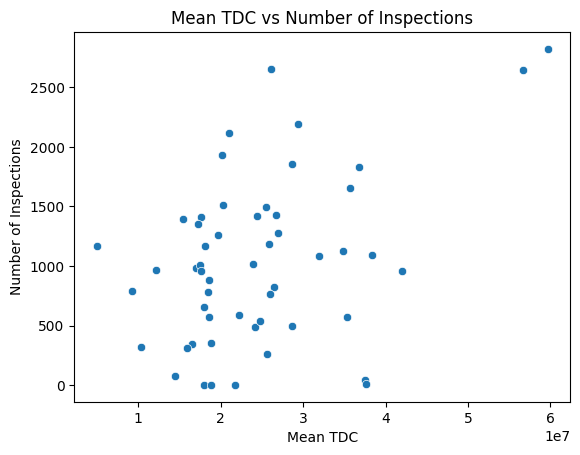

In [69]:
# Plot mean TDC vs number of inspections for each zip code
sns.scatterplot(data=final_df, x='mean_TDC', y='num_inspections')
plt.title('Mean TDC vs Number of Inspections')
plt.xlabel('Mean TDC')
plt.ylabel('Number of Inspections')
plt.show()

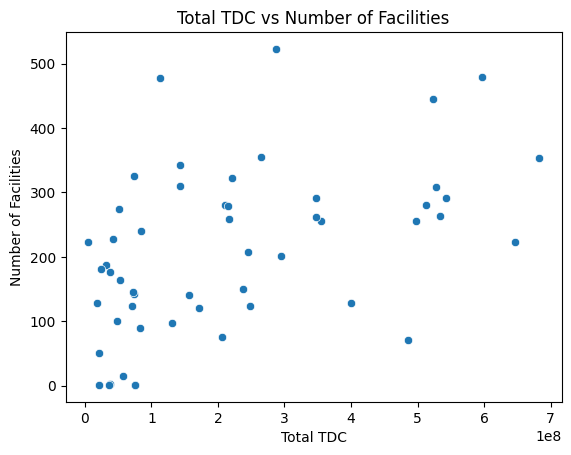

In [70]:
# Plot total TDC vs num of facilities for each zip code
sns.scatterplot(data=final_df, x='total_TDC', y='num_facilities')
plt.title('Total TDC vs Number of Facilities')
plt.xlabel('Total TDC')
plt.ylabel('Number of Facilities')
plt.show()

In [71]:
import statsmodels.api as sm    # Reference (12)

# Alternate Hypothesis

There is a relationship between the total TDC for housing in a zipcode and the number of restaurants/market facilities in that area

# Null Hypothesis

There is no relationship between the total TDC for housing in a zipcode and the number of restaurants/market facilities in that area

#### Potential predictor variable:- Total_TDC

#### Potential predicted variable:- num_facilities


#### Test to be used: 
Linear regression and associated p-value for slope

#### Significance level:
95% confidence interval

In [72]:
# Perform Linear Regression on num_facilities with predictor variable Total_TDC
X = final_df['total_TDC']   
y = final_df['num_facilities']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         num_facilities   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     15.88
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           0.000216
Time:                        22:15:33   Log-Likelihood:                -324.98
No. Observations:                  53   AIC:                             654.0
Df Residuals:                      51   BIC:                             657.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        136.1461     23.672      5.751      0.0

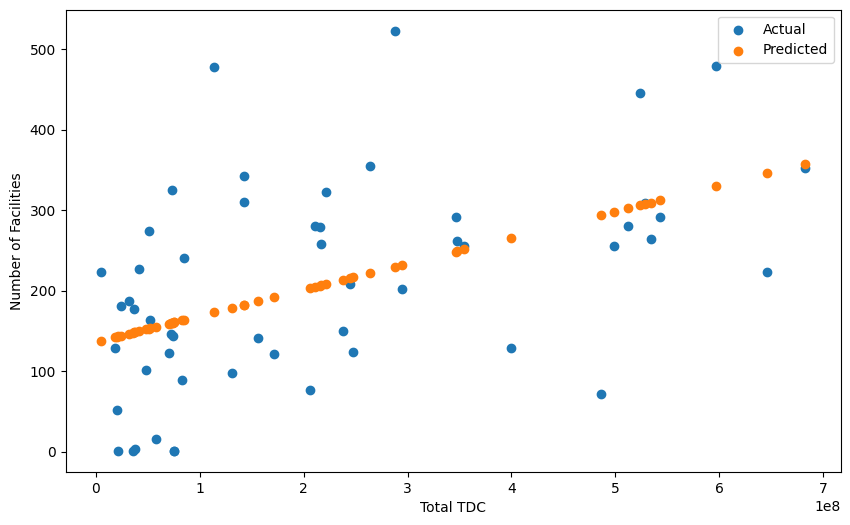

In [73]:
# Plot actual total TDC vs num_facilties and predicted total TDC vs num_facilities
plt.figure(figsize=(10, 6))
plt.scatter(final_df['total_TDC'], final_df['num_facilities'], label='Actual')
plt.scatter(final_df['total_TDC'], model.predict(X), label='Predicted')
plt.xlabel('Total TDC')
plt.ylabel('Number of Facilities')
plt.legend()
plt.show()

In [74]:
# Print pvalues of the model
print(model.pvalues)

const        5.017309e-07
total_TDC    2.155082e-04
dtype: float64


## Hypothesis Testing 
For the 95% confidence interval, the threshold for p-value is 0.05. Here we get a p-value of 2.155e-4 which is clealy less than 0.05 and hence we can reject the null hypothesis and accept the alternate hypothesis.

### Result of testing:- The num of restaurants/market facilties in a zipcode are significantly related to the total development cost for affordable housing of that zipcode

### Potential Logical Reasoning for the Hypothesis:-
As the TDC for an area increases, the development in that area increases as well as the total site units increase. These factors can heavily attract more facilities and hence result in an increase in the number of restaurants/markets.

# Part 2 of Assignment:- EDA on Interesting Piece of Data from data.gov.in

In [75]:
# Read the datasets
rainfall_df = pd.read_csv('rainfall_area-wt_India_1901-2015.csv') # Reference (13)
rainfall_df

REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0    INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1    INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2    INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3    INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4    INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   
..     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
110  INDIA  2011   7.7  26.3  21.4  41.0  51.6  182.8  243.0  284.6  190.5   
111  INDIA  2012  28.5  10.8  10.6  48.5  32.1  125.0  258.1  263.9  197.7   
112  INDIA  2013  10.0  36.9  14.5  29.4  56.5  217.9  305.4  248.4  148.4   
113  INDIA  2014  17.3  25.9  32.6  20.2  72.8   95.5  258.8  237.9  187.9   
114  INDIA  2015  17.4  21.0  62.0  69.4  53.8  192.8  242.4  205.2  131.8   

       OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0     52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1     61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2    117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3     69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4     51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  
..     ...   ...   ...     ...      ...      ...      ...      ...  
110   36.5  18.4   6.5  1110.1     34.0    113.9    900.9     61.4  
111   59.8  28.9   9.6  1073.5     39.3     91.2    844.7     98.3  
112  128.9  13.7   6.2  1216.2     46.9    100.4    920.1    148.7  
113   60.9  13.5  10.4  1033.7     43.2    125.5    780.1     84.8  
114   42.9  39.4  15.0  1093.2     38.4    185.2    772.2     97.3  

[115 rows x 19 columns]

In [76]:
# Temperature dataset
temp_df = pd.read_csv('TEMP_ANNUAL_MEAN_1901-2021.csv') # Reference (14)
temp_df

YEAR    JAN      FEB      MAR      APR      MAY      JUN      JUL  \
0    1901.0  19.32    20.89    24.95    28.22    29.76    29.85    28.24   
1    1902.0  20.17    21.58    25.73    28.15    30.00    29.47    27.99   
2    1903.0  19.28    20.71    23.92    27.67    29.47    29.53    28.32   
3    1904.0  19.19    20.32    24.41    28.11    29.17    28.80    27.36   
4    1905.0  18.34    18.37    23.15    26.26    29.73    29.87    28.13   
..      ...    ...      ...      ...      ...      ...      ...      ...   
120  2021.0  20.31    22.55    26.30    28.42    29.17    29.07    28.52   
121     NaN    JAN      FEB      MAR      APR      MAY      JUN      JUL   
122     NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
123     NaN    NaN      NaN      NaN      NaN      NaN      NaN      NaN   
124     NaN  24.99  28.0386  30.4741  33.9128  35.2268  33.4088  32.3118   

         AUG      SEP      OCT      NOV      DEC  ANNUAL  JAN-FEB  MAR-MAY  \
0      27.33    27.23    26.33    22.92    20.05   25.42    20.11    27.64   
1      27.71    26.76    25.33    22.43    19.77   25.42    20.88    27.96   
2      27.16    27.00    25.69    22.01    19.30   25.01    19.99    27.02   
3      27.26    26.84    25.67    22.16    19.86   24.93    19.76    27.23   
4      27.65    27.16    26.35    23.24    19.79   24.84    18.36    26.38   
..       ...      ...      ...      ...      ...     ...      ...      ...   
120    28.07    27.79    26.79    23.47    20.72   25.93    21.43    27.97   
121      AUG      SEP      OCT      NOV      DEC  ANNUAL  JAN-FEB  MAR-MAY   
122      NaN      NaN      NaN      NaN      NaN     NaN      NaN      NaN   
123      NaN      NaN      NaN      NaN      NaN     NaN      NaN      NaN   
124  31.5344  31.9751  32.0322  29.1711  26.5851  30.805  26.5141  33.2046   

     JUN-SEP  OCT-DEC  
0      28.16    23.10  
1      27.98    22.51  
2      28.00    22.33  
3      27.57    22.56  
4      28.20    23.13  
..       ...      ...  
120    28.36    23.66  
121  JUN-SEP  OCT-DEC  
122      NaN      NaN  
123      NaN      NaN  
124  32.3075  29.2628  

[125 rows x 18 columns]

In [77]:
# Delete last 4 rows of temp_df as they don't seem to be correct/valid
temp_df = temp_df.iloc[:-4] # Reference (15)
temp_df

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901.0  19.32  20.89  24.95  28.22  29.76  29.85  28.24  27.33  27.23   
1    1902.0  20.17  21.58  25.73  28.15  30.00  29.47  27.99  27.71  26.76   
2    1903.0  19.28  20.71  23.92  27.67  29.47  29.53  28.32  27.16  27.00   
3    1904.0  19.19  20.32  24.41  28.11  29.17  28.80  27.36  27.26  26.84   
4    1905.0  18.34  18.37  23.15  26.26  29.73  29.87  28.13  27.65  27.16   
..      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
116  2017.0  20.06  22.68  25.24  28.95  30.42  29.36  28.19  28.00  28.03   
117  2018.0  19.90  22.58  26.01  28.48  29.99  29.58  28.19  27.73  27.63   
118  2019.0  19.62  21.80  24.92  28.82  30.27  30.26  28.65  27.92  27.56   
119  2020.0  19.65  21.93  24.76  28.14  29.84  29.11  28.54  28.13  28.03   
120  2021.0  20.31  22.55  26.30  28.42  29.17  29.07  28.52  28.07  27.79   

       OCT    NOV    DEC ANNUAL JAN-FEB MAR-MAY JUN-SEP OCT-DEC  
0    26.33  22.92  20.05  25.42   20.11   27.64   28.16   23.10  
1    25.33  22.43  19.77  25.42   20.88   27.96   27.98   22.51  
2    25.69  22.01  19.30  25.01   19.99   27.02   28.00   22.33  
3    25.67  22.16  19.86  24.93   19.76   27.23   27.57   22.56  
4    26.35  23.24  19.79  24.84   18.36   26.38   28.20   23.13  
..     ...    ...    ...    ...     ...     ...     ...     ...  
116  27.04  23.52  20.95  26.04   21.37   28.20   28.39   23.84  
117  26.42  23.84  20.41  25.90   21.24   28.16   28.28   23.55  
118  26.22  23.93  20.32  25.86   20.71   28.00   28.60   23.49  
119  26.96  23.48  20.82  25.78   20.79   27.58   28.45   23.75  
120  26.79  23.47  20.72  25.93   21.43   27.97   28.36   23.66  

[121 rows x 18 columns]

# EDA for Temperature Dataset

In [78]:
# Print datatypes of the columns
temp_df.dtypes

YEAR       float64
JAN         object
FEB         object
MAR         object
APR         object
MAY         object
JUN         object
JUL         object
AUG         object
SEP         object
OCT         object
NOV         object
DEC         object
ANNUAL      object
JAN-FEB     object
MAR-MAY     object
JUN-SEP     object
OCT-DEC     object
dtype: object

In [79]:
# Convert all columns to float
temp_df = temp_df.astype(float)

# Convert the year column to integer
temp_df['YEAR'] = temp_df['YEAR'].astype(int)

temp_df

YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP  \
0    1901  19.32  20.89  24.95  28.22  29.76  29.85  28.24  27.33  27.23   
1    1902  20.17  21.58  25.73  28.15  30.00  29.47  27.99  27.71  26.76   
2    1903  19.28  20.71  23.92  27.67  29.47  29.53  28.32  27.16  27.00   
3    1904  19.19  20.32  24.41  28.11  29.17  28.80  27.36  27.26  26.84   
4    1905  18.34  18.37  23.15  26.26  29.73  29.87  28.13  27.65  27.16   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
116  2017  20.06  22.68  25.24  28.95  30.42  29.36  28.19  28.00  28.03   
117  2018  19.90  22.58  26.01  28.48  29.99  29.58  28.19  27.73  27.63   
118  2019  19.62  21.80  24.92  28.82  30.27  30.26  28.65  27.92  27.56   
119  2020  19.65  21.93  24.76  28.14  29.84  29.11  28.54  28.13  28.03   
120  2021  20.31  22.55  26.30  28.42  29.17  29.07  28.52  28.07  27.79   

       OCT    NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0    26.33  22.92  20.05   25.42    20.11    27.64    28.16    23.10  
1    25.33  22.43  19.77   25.42    20.88    27.96    27.98    22.51  
2    25.69  22.01  19.30   25.01    19.99    27.02    28.00    22.33  
3    25.67  22.16  19.86   24.93    19.76    27.23    27.57    22.56  
4    26.35  23.24  19.79   24.84    18.36    26.38    28.20    23.13  
..     ...    ...    ...     ...      ...      ...      ...      ...  
116  27.04  23.52  20.95   26.04    21.37    28.20    28.39    23.84  
117  26.42  23.84  20.41   25.90    21.24    28.16    28.28    23.55  
118  26.22  23.93  20.32   25.86    20.71    28.00    28.60    23.49  
119  26.96  23.48  20.82   25.78    20.79    27.58    28.45    23.75  
120  26.79  23.47  20.72   25.93    21.43    27.97    28.36    23.66  

[121 rows x 18 columns]

In [80]:
# Check for NaN values
temp_df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

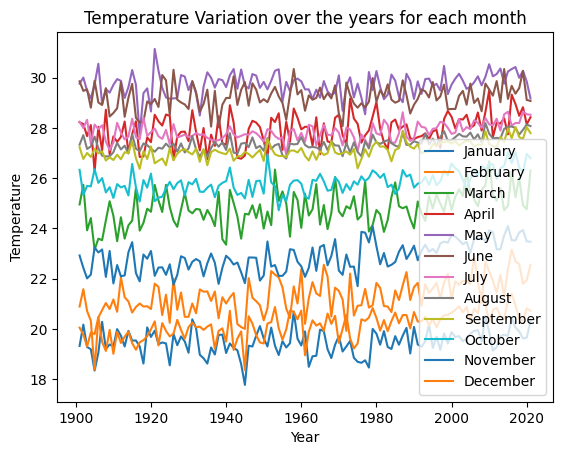

In [81]:
# No column has NaN value and hence we can proceed with the analysis

# Plot the variation of temperature over the years for each month
fig, axes = plt.subplots(1, 1)
sns.lineplot(data=temp_df, x='YEAR', y='JAN', ax=axes, label='January')
sns.lineplot(data=temp_df, x='YEAR', y='FEB', ax=axes, label='February')
sns.lineplot(data=temp_df, x='YEAR', y='MAR', ax=axes, label='March')
sns.lineplot(data=temp_df, x='YEAR', y='APR', ax=axes, label='April')
sns.lineplot(data=temp_df, x='YEAR', y='MAY', ax=axes, label='May')
sns.lineplot(data=temp_df, x='YEAR', y='JUN', ax=axes, label='June')
sns.lineplot(data=temp_df, x='YEAR', y='JUL', ax=axes, label='July')
sns.lineplot(data=temp_df, x='YEAR', y='AUG', ax=axes, label='August')
sns.lineplot(data=temp_df, x='YEAR', y='SEP', ax=axes, label='September')
sns.lineplot(data=temp_df, x='YEAR', y='OCT', ax=axes, label='October')
sns.lineplot(data=temp_df, x='YEAR', y='NOV', ax=axes, label='November')
sns.lineplot(data=temp_df, x='YEAR', y='DEC', ax=axes, label='December')
plt.title('Temperature Variation over the years for each month')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

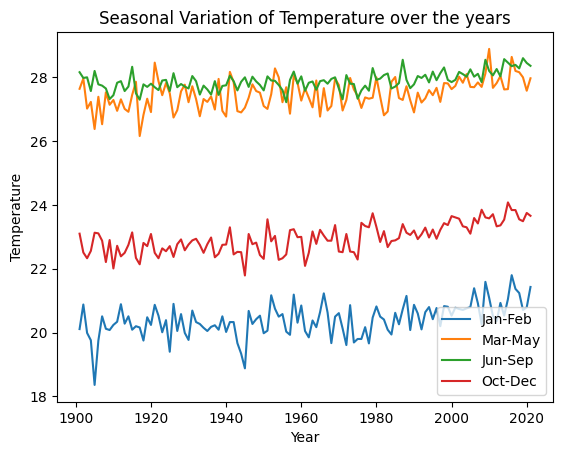

In [82]:
# Plot seasonal variation of temperature over the years
fig, axes = plt.subplots(1, 1)
sns.lineplot(data=temp_df, x='YEAR', y='JAN-FEB', ax=axes, label='Jan-Feb')
sns.lineplot(data=temp_df, x='YEAR', y='MAR-MAY', ax=axes, label='Mar-May')
sns.lineplot(data=temp_df, x='YEAR', y='JUN-SEP', ax=axes, label='Jun-Sep')
sns.lineplot(data=temp_df, x='YEAR', y='OCT-DEC', ax=axes, label='Oct-Dec')
plt.title('Seasonal Variation of Temperature over the years')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

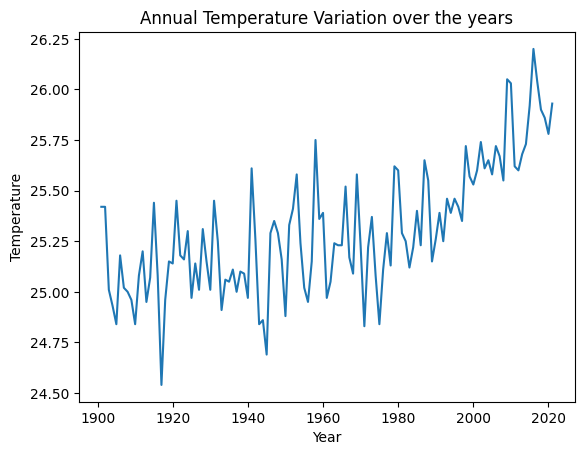

In [83]:
# Plot the variation of annual temperature over the years
sns.lineplot(data=temp_df, x='YEAR', y='ANNUAL')
plt.title('Annual Temperature Variation over the years')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

# Alternate Hypothesis:- 
Average temperature has increased over the years

# Null Hypothesis:-
Average temperature hasn't significantly risen over the years

## Confidence level:- 
95% confidence 

## Test:- 
Linear regression with year, if slope > 0 and p-value > threshold (0.05 here) then we can reject null hypothesis

In [84]:
# Apply linear regression on Annual Mean Temperature with Year as predictor variable
X = temp_df['YEAR']
y = temp_df['ANNUAL']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ANNUAL   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     111.7
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           8.11e-19
Time:                        22:15:33   Log-Likelihood:                 8.0978
No. Observations:                 121   AIC:                            -12.20
Df Residuals:                     119   BIC:                            -6.604
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9939      1.165     11.154      0.0

In [85]:
print(model.pvalues)

const    3.253342e-20
YEAR     8.111859e-19
dtype: float64


### Result of hypothesis testing
The pvalue for the slope (= 8.11e-19) is less than 0.05 (threshold for 95% confidence level) and the slope of the linear fit is >0 meaning we can reject the null hypothesis and accept the alternate hypothesis which is that
#### **The annual temperature of the country is rising at a statistically significant rate**

# EDA for rainfall data

In [86]:
rainfall_df

REGION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  \
0    INDIA  1901  34.7  37.7  18.0  39.3  50.8  113.4  242.2  272.9  124.4   
1    INDIA  1902   7.4   4.3  19.0  43.5  48.3  108.8  284.0  199.7  201.5   
2    INDIA  1903  17.0   8.3  31.3  17.1  59.5  118.3  297.0  270.4  199.1   
3    INDIA  1904  14.4   9.6  31.8  33.1  72.4  164.8  261.0  206.4  129.6   
4    INDIA  1905  25.3  20.9  42.7  33.7  55.7   93.3  252.8  200.8  178.4   
..     ...   ...   ...   ...   ...   ...   ...    ...    ...    ...    ...   
110  INDIA  2011   7.7  26.3  21.4  41.0  51.6  182.8  243.0  284.6  190.5   
111  INDIA  2012  28.5  10.8  10.6  48.5  32.1  125.0  258.1  263.9  197.7   
112  INDIA  2013  10.0  36.9  14.5  29.4  56.5  217.9  305.4  248.4  148.4   
113  INDIA  2014  17.3  25.9  32.6  20.2  72.8   95.5  258.8  237.9  187.9   
114  INDIA  2015  17.4  21.0  62.0  69.4  53.8  192.8  242.4  205.2  131.8   

       OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0     52.7  38.0   8.3  1032.3     72.4    108.1    752.8     99.0  
1     61.5  27.9  24.4  1030.2     11.7    110.8    794.0    113.8  
2    117.9  36.9  17.7  1190.5     25.3    107.9    884.8    172.5  
3     69.0  11.2  16.3  1019.8     24.0    137.4    761.8     96.6  
4     51.4   9.7  10.5   975.3     46.2    132.2    725.4     71.6  
..     ...   ...   ...     ...      ...      ...      ...      ...  
110   36.5  18.4   6.5  1110.1     34.0    113.9    900.9     61.4  
111   59.8  28.9   9.6  1073.5     39.3     91.2    844.7     98.3  
112  128.9  13.7   6.2  1216.2     46.9    100.4    920.1    148.7  
113   60.9  13.5  10.4  1033.7     43.2    125.5    780.1     84.8  
114   42.9  39.4  15.0  1093.2     38.4    185.2    772.2     97.3  

[115 rows x 19 columns]

In [87]:
# Drop the column 'REGION' 
rainfall_df = rainfall_df.drop(columns = ['REGION'], errors = 'ignore')

In [88]:
# Check for NaN values
rainfall_df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
Jan-Feb    0
Mar-May    0
Jun-Sep    0
Oct-Dec    0
dtype: int64

In [89]:
# Check for datatypes of the columns 
rainfall_df.dtypes

YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
Jan-Feb    float64
Mar-May    float64
Jun-Sep    float64
Oct-Dec    float64
dtype: object

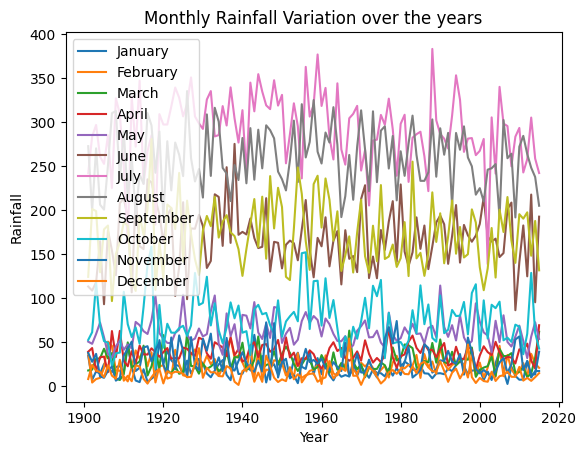

In [90]:
# Plot the monthly rainfall over the years
fig, axes = plt.subplots(1, 1)
sns.lineplot(data=rainfall_df, x='YEAR', y='JAN', ax=axes, label='January')
sns.lineplot(data=rainfall_df, x='YEAR', y='FEB', ax=axes, label='February')
sns.lineplot(data=rainfall_df, x='YEAR', y='MAR', ax=axes, label='March')
sns.lineplot(data=rainfall_df, x='YEAR', y='APR', ax=axes, label='April')
sns.lineplot(data=rainfall_df, x='YEAR', y='MAY', ax=axes, label='May')
sns.lineplot(data=rainfall_df, x='YEAR', y='JUN', ax=axes, label='June')
sns.lineplot(data=rainfall_df, x='YEAR', y='JUL', ax=axes, label='July')
sns.lineplot(data=rainfall_df, x='YEAR', y='AUG', ax=axes, label='August')
sns.lineplot(data=rainfall_df, x='YEAR', y='SEP', ax=axes, label='September')
sns.lineplot(data=rainfall_df, x='YEAR', y='OCT', ax=axes, label='October')
sns.lineplot(data=rainfall_df, x='YEAR', y='NOV', ax=axes, label='November')
sns.lineplot(data=rainfall_df, x='YEAR', y='DEC', ax=axes, label='December')
plt.title('Monthly Rainfall Variation over the years')
plt.xlabel('Year')
plt.ylabel('Rainfall')

plt.show()

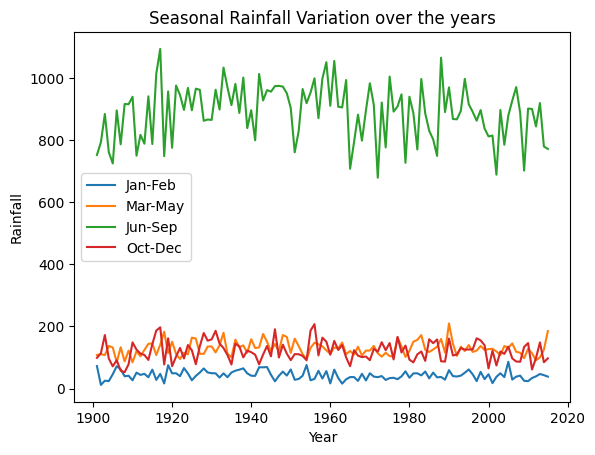

In [91]:
# Plot the seasonal rainfall over the years
fig, axes = plt.subplots(1, 1)
sns.lineplot(data=rainfall_df, x='YEAR', y='Jan-Feb', ax=axes, label='Jan-Feb')
sns.lineplot(data=rainfall_df, x='YEAR', y='Mar-May', ax=axes, label='Mar-May')
sns.lineplot(data=rainfall_df, x='YEAR', y='Jun-Sep', ax=axes, label='Jun-Sep')
sns.lineplot(data=rainfall_df, x='YEAR', y='Oct-Dec', ax=axes, label='Oct-Dec')
plt.title('Seasonal Rainfall Variation over the years')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

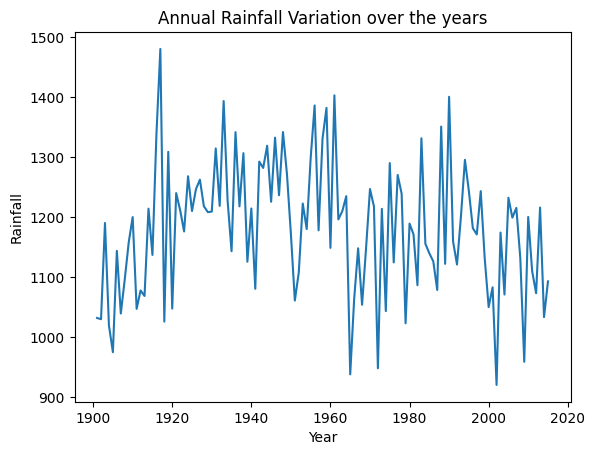

In [92]:
# Plot annual rainfall over the years

sns.lineplot(data=rainfall_df, x='YEAR', y='ANNUAL')
plt.title('Annual Rainfall Variation over the years')
plt.xlabel('Year')
plt.ylabel('Rainfall')
plt.show()

# Alternate Hypothesis:-
The annual rainfall is correlated with the annual temperatures

# Null Hypothesis:-
The annual rainfall is not correlated with the annual temperature

# Test:-
Spearman's correlation 

# Confidence level:- 
95% confidence interval

In [93]:
from scipy.stats import spearmanr # Reference (16)

In [94]:
new_final_df = pd.DataFrame()

In [95]:
new_final_df['temperature'] = temp_df['ANNUAL']
new_final_df['year'] = temp_df['YEAR']
new_final_df['rainfall'] = rainfall_df['ANNUAL']
new_final_df

temperature  year  rainfall
0          25.42  1901    1032.3
1          25.42  1902    1030.2
2          25.01  1903    1190.5
3          24.93  1904    1019.8
4          24.84  1905     975.3
..           ...   ...       ...
116        26.04  2017       NaN
117        25.90  2018       NaN
118        25.86  2019       NaN
119        25.78  2020       NaN
120        25.93  2021       NaN

[121 rows x 3 columns]

In [96]:
# Drop rows with NaN values
new_final_df = new_final_df.dropna()
new_final_df

temperature  year  rainfall
0          25.42  1901    1032.3
1          25.42  1902    1030.2
2          25.01  1903    1190.5
3          24.93  1904    1019.8
4          24.84  1905     975.3
..           ...   ...       ...
110        25.62  2011    1110.1
111        25.60  2012    1073.5
112        25.68  2013    1216.2
113        25.73  2014    1033.7
114        25.92  2015    1093.2

[115 rows x 3 columns]

In [97]:
# Calculate Spearman's correlation coefficient an pvalue
corr, pval = spearmanr(new_final_df['temperature'], new_final_df['rainfall'])

print('Spearman Correlation Coefficient:', corr)
print('P-value:', pval)

Spearman Correlation Coefficient: -0.2023333439741938
P-value: 0.030115955792327634


## Result:-
Since the p-value of the test < 0.05, the correlation between the quantities is statistically significant

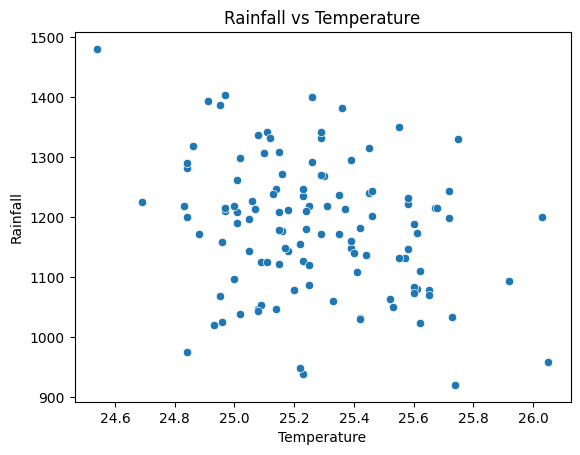

In [98]:
# Plot rainfall vs temperature
sns.scatterplot(data=new_final_df, x='temperature', y='rainfall')
plt.title('Rainfall vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.show()

# References
(1) ChatGPT - pd function to get number of unique values in each column

(2) ChatGPT - remove prefix from a string in pd.Series and then convert to int

(3) ChatGPT - convert string to date time in pd and extract year from it

(4) ChatGPT - encode string using integers

(5) ChatGPT - extract a 5 digit zipcode from an address using regex

(6) ChatGPT - plot a correlation heatmap

(7) Seaborn Documentation

(8) ChatGPT - group a column using values of another column and then count the number of times the column assumes some value 

(9) ChatGPT - how to use sqlite3 on python to do operations on pd df

(10) ChatGPT - Used for almost all SQL queries 

(11) Matplotlib Documentation

(12) DS203 course done last year

(13) Taken from data.gov.in

(14) Taken from data.gov.in

(15) ChatGPT - remove last 4 rows from a pd df

(15) ChatGPT - how to implement spearman's coefficient test